# Import Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


# Load Sales Data

In [2]:
# Load the file with all sheets
file_path = 'Sales Data.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None)  # This loads all sheets as a dictionary

# List all sheet names
print("Sheet names:", excel_data.keys())

# Access each sheet by name and inspect the first few rows
sales_data = excel_data['Sales']
distribution_data = excel_data['Distribution']
shipment_data = excel_data['Shipment']


Sheet names: dict_keys(['Sales', 'Distribution', 'Shipment'])


### Sales Raw Data

In [3]:
sales_data.head()

Unnamed: 0 Value ('000 HKD) Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0               Period            Brand         V1         V2         V3   
1  2011-07-01 00:00:00          28518.3    12706.5    12196.9     3614.4   
2  2011-08-01 00:00:00          31712.5    14190.5    13250.5     4271.6   
3  2011-09-01 00:00:00          28436.8    12422.5    11946.7     4067.6   
4  2011-10-01 00:00:00          29048.8    12652.5    12690.9     3705.5   

   Unnamed: 5 Volume (SU) Unnamed: 7 Unnamed: 8 Unnamed: 9  Unnamed: 10  \
0         NaN       Brand         V1         V2         V3          NaN   
1         NaN     85935.6    36127.4    40971.6     8835.6          NaN   
2         NaN     95135.2    40373.7    44402.1    10359.4          NaN   
3         NaN       85814    36034.5    40029.2     9750.3          NaN   
4         NaN     88047.7    36697.8    42431.3     8918.6          NaN   

  Avg Price per SU Unnamed: 12 Unnamed: 13 Unnamed: 14  Unnamed: 15  \
0            Brand          V1          V2          V3          NaN   
1       331.856646  351.713658  297.691572  409.072389          NaN   
2       333.341392  351.478809   298.42057  412.340483          NaN   
3       331.377165   344.73907  298.449632  417.176907          NaN   
4       329.921168  344.775436  299.092887  415.480008          NaN   

  Avg Price per USD Unnamed: 17 Unnamed: 18 Unnamed: 19  
0             Brand          V1          V2          V3  
1         43.141364   45.722776   38.699904   53.179411  
2         43.334381   45.692245   38.794674   53.604263  
3         43.079031   44.816079   38.798452   54.232998  
4         42.889752   44.820807   38.882075   54.012401

### Distribution Raw Data

In [4]:
distribution_data.head()

Unnamed: 0    WTD Unnamed: 2 Unnamed: 3 Unnamed: 4  Unnamed: 5  \
0               Period  Brand         V1         V2         V3         NaN   
1  2011-07-01 00:00:00    100        100         99         96         NaN   
2  2011-08-01 00:00:00    100         99         99         96         NaN   
3  2011-09-01 00:00:00    100         99         99         95         NaN   
4  2011-10-01 00:00:00     99         99         99         94         NaN   

    NUMD Unnamed: 7 Unnamed: 8 Unnamed: 9  
0  Brand         V1         V2         V3  
1     48         46         46         40  
2     48         46         46         40  
3     48         46         46         39  
4     48         46         46         38

### Shipment Raw Data

In [5]:
shipment_data.head()

Unnamed: 0  Shipment SU  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0               Period        Brand          V1          V2          V3   
1  2011-07-01 00:00:00   111110.765  43869.0272  59022.5266   8219.2112   
2  2011-08-01 00:00:00    98568.474   48970.128  40447.5286   9150.8174   
3  2011-09-01 00:00:00  122461.0034  54010.9639  58820.3602   9629.6793   
4  2011-10-01 00:00:00  134933.0212  60733.5058  63417.0106  10782.5048   

   Unnamed: 5 Volume (SU) Unnamed: 7 Unnamed: 8 Unnamed: 9  
0         NaN       Brand         V1         V2         V3  
1         NaN     85935.6    36127.4    40971.6     8835.6  
2         NaN     95135.2    40373.7    44402.1    10359.4  
3         NaN       85814    36034.5    40029.2     9750.3  
4         NaN     88047.7    36697.8    42431.3     8918.6

# Sales Data Preprocessing

### Sales Data Preparation

In [6]:
def rename_columns_sales(df):
    new_columns = []
    base_names = {
        0: 'Period',
        1: 'Sales_Value_Brand',
        2: 'Sales_Value_V1',
        3: 'Sales_Value_V2',
        4: 'Sales_Value_V3',
        6: 'Volume_Brand',
        7: 'Volume_V1',
        8: 'Volume_V2',
        9: 'Volume_V3',
        11: 'Avg_Price_Brand_SU',
        12: 'Avg_Price_V1_SU',
        13: 'Avg_Price_V2_SU',
        14: 'Avg_Price_V3_SU',
        16: 'Avg_Price_Brand_USD',
        17: 'Avg_Price_V1_USD',
        18: 'Avg_Price_V2_USD',
        19: 'Avg_Price_V3_USD'
    }
    
    # Loop through column indexes and assign names based on the base_names mapping
    for idx, col in enumerate(df.columns):
        if idx in base_names:
            new_columns.append(base_names[idx])
        else:
            new_columns.append(f'NaN_Col{idx}')  # Assign NaN column placeholders

    df.columns = new_columns
    return df

# Apply the renaming function to the sales data
sales_data_clean = rename_columns_sales(sales_data)

# Display the renamed columns
sales_data_clean.head()


Period Sales_Value_Brand Sales_Value_V1 Sales_Value_V2  \
0               Period             Brand             V1             V2   
1  2011-07-01 00:00:00           28518.3        12706.5        12196.9   
2  2011-08-01 00:00:00           31712.5        14190.5        13250.5   
3  2011-09-01 00:00:00           28436.8        12422.5        11946.7   
4  2011-10-01 00:00:00           29048.8        12652.5        12690.9   

  Sales_Value_V3  NaN_Col5 Volume_Brand Volume_V1 Volume_V2 Volume_V3  \
0             V3       NaN        Brand        V1        V2        V3   
1         3614.4       NaN      85935.6   36127.4   40971.6    8835.6   
2         4271.6       NaN      95135.2   40373.7   44402.1   10359.4   
3         4067.6       NaN        85814   36034.5   40029.2    9750.3   
4         3705.5       NaN      88047.7   36697.8   42431.3    8918.6   

   NaN_Col10 Avg_Price_Brand_SU Avg_Price_V1_SU Avg_Price_V2_SU  \
0        NaN              Brand              V1              V2   
1        NaN         331.856646      351.713658      297.691572   
2        NaN         333.341392      351.478809       298.42057   
3        NaN         331.377165       344.73907      298.449632   
4        NaN         329.921168      344.775436      299.092887   

  Avg_Price_V3_SU  NaN_Col15 Avg_Price_Brand_USD Avg_Price_V1_USD  \
0              V3        NaN               Brand               V1   
1      409.072389        NaN           43.141364        45.722776   
2      412.340483        NaN           43.334381        45.692245   
3      417.176907        NaN           43.079031        44.816079   
4      415.480008        NaN           42.889752        44.820807   

  Avg_Price_V2_USD Avg_Price_V3_USD  
0               V2               V3  
1        38.699904        53.179411  
2        38.794674        53.604263  
3        38.798452        54.232998  
4        38.882075        54.012401

In [7]:
# Drop unnecessary NaN columns 
sales_data_clean = sales_data_clean.drop(['NaN_Col5', 'NaN_Col10', 'NaN_Col15'], axis=1)

In [8]:
# Drop the first row which contains redundant headers
sales_data_clean = sales_data_clean.drop(0).reset_index(drop=True)

In [9]:
# Convert the 'Period' column to datetime
sales_data_clean['Period'] = pd.to_datetime(sales_data_clean['Period'])


In [10]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Check the cleaned data
sales_data_clean.head()

Period Sales_Value_Brand Sales_Value_V1 Sales_Value_V2 Sales_Value_V3  \
0 2011-07-01           28518.3        12706.5        12196.9         3614.4   
1 2011-08-01           31712.5        14190.5        13250.5         4271.6   
2 2011-09-01           28436.8        12422.5        11946.7         4067.6   
3 2011-10-01           29048.8        12652.5        12690.9         3705.5   
4 2011-11-01          30463.54       13737.66       12723.97         4001.9   

  Volume_Brand Volume_V1 Volume_V2 Volume_V3 Avg_Price_Brand_SU  \
0      85935.6   36127.4   40971.6    8835.6         331.856646   
1      95135.2   40373.7   44402.1   10359.4         333.341392   
2        85814   36034.5   40029.2    9750.3         331.377165   
3      88047.7   36697.8   42431.3    8918.6         329.921168   
4     92028.93   39742.8     42395   9891.13         331.021343   

  Avg_Price_V1_SU Avg_Price_V2_SU Avg_Price_V3_SU Avg_Price_Brand_USD  \
0      351.713658      297.691572      409.072389           43.141364   
1      351.478809       298.42057      412.340483           43.334381   
2       344.73907      298.449632      417.176907           43.079031   
3      344.775436      299.092887      415.480008           42.889752   
4       345.66412      300.129025      404.594824           43.032775   

  Avg_Price_V1_USD Avg_Price_V2_USD Avg_Price_V3_USD  
0        45.722776        38.699904        53.179411  
1        45.692245        38.794674        53.604263  
2        44.816079        38.798452        54.232998  
3        44.820807        38.882075        54.012401  
4        44.936336        39.016773        52.597327

### Distribution Data Preparation

In [11]:
def rename_columns_distribution(df):
    new_columns = []
    base_names = {
        0: 'Period',
        1: 'WTD_Brand',
        2: 'WTD_V1',
        3: 'WTD_V2',
        4: 'WTD_V3',
        6: 'NUMD_Brand',
        7: 'NUMD_V1',
        8: 'NUMD_V2',
        9: 'NUMD_V3'
    }
    
    # Loop through column indexes and assign names based on the base_names mapping
    for idx, col in enumerate(df.columns):
        if idx in base_names:
            new_columns.append(base_names[idx])
        else:
            new_columns.append(f'NaN_Col{idx}')  # Assign NaN column placeholders

    df.columns = new_columns
    return df

# Apply the renaming function to the distribution data
distribution_data_clean = rename_columns_distribution(distribution_data)

# Display the renamed columns
distribution_data_clean.head()


Period WTD_Brand WTD_V1 WTD_V2 WTD_V3  NaN_Col5 NUMD_Brand  \
0               Period     Brand     V1     V2     V3       NaN      Brand   
1  2011-07-01 00:00:00       100    100     99     96       NaN         48   
2  2011-08-01 00:00:00       100     99     99     96       NaN         48   
3  2011-09-01 00:00:00       100     99     99     95       NaN         48   
4  2011-10-01 00:00:00        99     99     99     94       NaN         48   

  NUMD_V1 NUMD_V2 NUMD_V3  
0      V1      V2      V3  
1      46      46      40  
2      46      46      40  
3      46      46      39  
4      46      46      38

In [12]:
# Drop unnecessary NaN columns 
distribution_data_clean = distribution_data_clean.drop(['NaN_Col5'], axis=1)

In [13]:
# Drop the first row which contains redundant headers
distribution_data_clean = distribution_data_clean.drop(0).reset_index(drop=True)

In [14]:
# Convert the 'Period' column to datetime
distribution_data_clean['Period'] = pd.to_datetime(distribution_data_clean['Period'])

In [15]:
# Check the cleaned data
distribution_data_clean.head()

Period WTD_Brand WTD_V1 WTD_V2 WTD_V3 NUMD_Brand NUMD_V1 NUMD_V2 NUMD_V3
0 2011-07-01       100    100     99     96         48      46      46      40
1 2011-08-01       100     99     99     96         48      46      46      40
2 2011-09-01       100     99     99     95         48      46      46      39
3 2011-10-01        99     99     99     94         48      46      46      38
4 2011-11-01       100    100     99     93         48      46      45      39

### Shipment Data Preparation

In [16]:
def rename_columns_shipment(df):
    new_columns = []
    base_names = {
        0: 'Period',
        1: 'Shipment_SU_Brand',
        2: 'Shipment_SU_V1',
        3: 'Shipment_SU_V2',
        4: 'Shipment_SU_V3',
        6: 'Volume_SU_Brand',
        7: 'Volume_SU_V1',
        8: 'Volume_SU_V2',
        9: 'Volume_SU_V3'
    }
    
    # Loop through column indexes and assign names based on the base_names mapping
    for idx, col in enumerate(df.columns):
        if idx in base_names:
            new_columns.append(base_names[idx])
        else:
            new_columns.append(f'NaN_Col{idx}')  # Assign NaN column placeholders

    df.columns = new_columns
    return df

# Apply the renaming function to the shipment data
shipment_data_clean = rename_columns_shipment(shipment_data)

# Display the renamed columns
shipment_data_clean.head()


Period Shipment_SU_Brand Shipment_SU_V1 Shipment_SU_V2  \
0               Period             Brand             V1             V2   
1  2011-07-01 00:00:00        111110.765     43869.0272     59022.5266   
2  2011-08-01 00:00:00         98568.474      48970.128     40447.5286   
3  2011-09-01 00:00:00       122461.0034     54010.9639     58820.3602   
4  2011-10-01 00:00:00       134933.0212     60733.5058     63417.0106   

  Shipment_SU_V3  NaN_Col5 Volume_SU_Brand Volume_SU_V1 Volume_SU_V2  \
0             V3       NaN           Brand           V1           V2   
1      8219.2112       NaN         85935.6      36127.4      40971.6   
2      9150.8174       NaN         95135.2      40373.7      44402.1   
3      9629.6793       NaN           85814      36034.5      40029.2   
4     10782.5048       NaN         88047.7      36697.8      42431.3   

  Volume_SU_V3  
0           V3  
1       8835.6  
2      10359.4  
3       9750.3  
4       8918.6

In [17]:
# Drop unnecessary NaN columns 
shipment_data_clean = shipment_data_clean.drop(['NaN_Col5'], axis=1)

In [18]:
# Drop the first row which contains redundant headers
shipment_data_clean = shipment_data_clean.drop(0).reset_index(drop=True)

In [19]:
# Convert the 'Period' column to datetime
shipment_data_clean['Period'] = pd.to_datetime(shipment_data_clean['Period'])

In [20]:
# Drop the specified columns
columns_to_drop = ['Volume_SU_Brand', 'Volume_SU_V1', 'Volume_SU_V2', 'Volume_SU_V3']
shipment_data_clean = shipment_data_clean.drop(columns=columns_to_drop, axis=1)


In [21]:
# Check the cleaned data
shipment_data_clean.head()

Period Shipment_SU_Brand Shipment_SU_V1 Shipment_SU_V2 Shipment_SU_V3
0 2011-07-01        111110.765     43869.0272     59022.5266      8219.2112
1 2011-08-01         98568.474      48970.128     40447.5286      9150.8174
2 2011-09-01       122461.0034     54010.9639     58820.3602      9629.6793
3 2011-10-01       134933.0212     60733.5058     63417.0106     10782.5048
4 2011-11-01       122066.2618     52525.5475     60432.8513       9107.863

# Merge Sales Data, Distribution Data & Shipment Data

In [22]:
# Merge sales_data_clean and distribution_data_clean on 'Period'
merged_data = pd.merge(sales_data_clean, distribution_data_clean, on='Period', how='left')

# Merge the result with shipment_data_clean on 'Period'
sales_merged_data = pd.merge(merged_data, shipment_data_clean, on='Period', how='left')



In [23]:
# convert each column to numeric, ignoring errors
for col in sales_merged_data.columns:
    if col != 'Period':  # Skip the 'Period' column since it's now datetime
        sales_merged_data[col] = pd.to_numeric(sales_merged_data[col], errors='coerce')

In [24]:
# Display the first few rows of the merged data
sales_merged_data.head()

Period  Sales_Value_Brand  Sales_Value_V1  Sales_Value_V2  \
0 2011-07-01           28518.30        12706.50        12196.90   
1 2011-08-01           31712.50        14190.50        13250.50   
2 2011-09-01           28436.80        12422.50        11946.70   
3 2011-10-01           29048.80        12652.50        12690.90   
4 2011-11-01           30463.54        13737.66        12723.97   

   Sales_Value_V3  Volume_Brand  Volume_V1  Volume_V2  Volume_V3  \
0          3614.4      85935.60    36127.4    40971.6    8835.60   
1          4271.6      95135.20    40373.7    44402.1   10359.40   
2          4067.6      85814.00    36034.5    40029.2    9750.30   
3          3705.5      88047.70    36697.8    42431.3    8918.60   
4          4001.9      92028.93    39742.8    42395.0    9891.13   

   Avg_Price_Brand_SU  Avg_Price_V1_SU  Avg_Price_V2_SU  Avg_Price_V3_SU  \
0          331.856646       351.713658       297.691572       409.072389   
1          333.341392       351.478809       298.420570       412.340483   
2          331.377165       344.739070       298.449632       417.176907   
3          329.921168       344.775436       299.092887       415.480008   
4          331.021343       345.664120       300.129025       404.594824   

   Avg_Price_Brand_USD  Avg_Price_V1_USD  Avg_Price_V2_USD  Avg_Price_V3_USD  \
0            43.141364         45.722776         38.699904         53.179411   
1            43.334381         45.692245         38.794674         53.604263   
2            43.079031         44.816079         38.798452         54.232998   
3            42.889752         44.820807         38.882075         54.012401   
4            43.032775         44.936336         39.016773         52.597327   

   WTD_Brand  WTD_V1  WTD_V2  WTD_V3  NUMD_Brand  NUMD_V1  NUMD_V2  NUMD_V3  \
0        100     100      99      96          48       46       46       40   
1        100      99      99      96          48       46       46       40   
2        100      99      99      95          48       46       46       39   
3         99      99      99      94          48       46       46       38   
4        100     100      99      93          48       46       45       39   

   Shipment_SU_Brand  Shipment_SU_V1  Shipment_SU_V2  Shipment_SU_V3  
0        111110.7650      43869.0272      59022.5266       8219.2112  
1         98568.4740      48970.1280      40447.5286       9150.8174  
2        122461.0034      54010.9639      58820.3602       9629.6793  
3        134933.0212      60733.5058      63417.0106      10782.5048  
4        122066.2618      52525.5475      60432.8513       9107.8630

In [25]:
print("Shape of sales_merged_data:", sales_merged_data.shape)

Shape of sales_merged_data: (41, 29)


# Load Media Data

In [26]:
# Load the file with all sheets
file_path = 'Media_Data.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None)  # This loads all sheets as a dictionary

# List all sheet names
print("Sheet names:", excel_data.keys())

# Access each sheet by name and inspect the first few rows
Brand_data = excel_data['Brand']
V1_data = excel_data['V1']
V2_data = excel_data['V2']
V3_data = excel_data['V3']

Sheet names: dict_keys(['Brand', 'V1', 'V2', 'V3'])


### Brand Raw Data

In [27]:
Brand_data.head()  #There are 4 multilevel columns

Unnamed: 0 TV including ISP (GRPs) - F30-39    Unnamed: 2  \
0                  NaN          TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                              GRP           GRP   
2       Responsibility                              AOR           AOR   
3  2010-01-01 00:00:00                              NaN           NaN   
4  2010-02-02 00:00:00                              NaN           NaN   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                NaN          NaN           NaN           NaN           NaN   
4                NaN          NaN           NaN           NaN           NaN   

     Unnamed: 8    Unnamed: 9   Unnamed: 10 Unnamed: 11  \
0  25 Seconder   30 Seconder   35 Seconder    TV Co-op    
1           GRP           GRP           GRP         GRP   
2           AOR           AOR           AOR         AOR   
3           NaN           NaN           NaN         NaN   
4           NaN           NaN           NaN         NaN   

  TV ISP Ivideo Impression        Unnamed: 13        Unnamed: 14  \
0        ISP Digital Total        5 Seconder        10 Seconder    
1        No of impressions  No of impressions  No of impressions   
2                      AOR                AOR                AOR   
3                      NaN                NaN                NaN   
4                      NaN                NaN                NaN   

         Unnamed: 15        Unnamed: 16        Unnamed: 17        Unnamed: 18  \
0       15 Seconder        20 Seconder        25 Seconder        30 Seconder    
1  No of impressions  No of impressions  No of impressions  No of impressions   
2                AOR                AOR                AOR                AOR   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

         Unnamed: 19 TV ISP Ivideo Click    Unnamed: 21   Unnamed: 22  \
0       35 Seconder     ISP Digital Total   5 Seconder   10 Seconder    
1  No of impressions         No of Clicks  No of Clicks  No of Clicks   
2                AOR                  AOR           AOR           AOR   
3                NaN                  NaN           NaN           NaN   
4                NaN                  NaN           NaN           NaN   

    Unnamed: 23   Unnamed: 24   Unnamed: 25   Unnamed: 26   Unnamed: 27  \
0  15 Seconder   20 Seconder   25 Seconder   30 Seconder   35 Seconder    
1  No of Clicks  No of Clicks  No of Clicks  No of Clicks  No of Clicks   
2           AOR           AOR           AOR           AOR           AOR   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

   TV including ISP (Spends)    Unnamed: 29         Unnamed: 30  Unnamed: 31  \
0  TOTAL Spends - (ISP + TV)  ISP TV Spends  ISP Digital Spends  5 Seconder    
1                       USM            USM                 USM          USM    
2                        AOR            AOR                 AOR          AOR   
3                        NaN            NaN                 NaN          NaN   
4                        NaN            NaN                 NaN          NaN   

    Unnamed: 32   Unnamed: 33   Unnamed: 34   Unnamed: 35   Unnamed: 36  \
0  10 Seconder   15 Seconder   20 Seconder   25 Seconder   30 Seconder    
1          USM           USM           USM           USM           USM    
2           AOR           AOR           AOR           AOR           AOR   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

    Unnamed: 37      Unna

### V1 Raw Data

In [28]:
V1_data.head()

Unnamed: 0       TV (GRPs) - F30-39    Unnamed: 2  \
0                  NaN  TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                      GRP           GRP   
2       Responsibility                      AOR           AOR   
3  2010-01-01 00:00:00                        0             0   
4  2010-02-02 00:00:00                        0             0   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                  0            0             0             0             0   
4                  0            0             0             0             0   

     Unnamed: 8    Unnamed: 9   Unnamed: 10 Unnamed: 11  \
0  25 Seconder   30 Seconder   35 Seconder    TV Co-op    
1           GRP           GRP           GRP         GRP   
2           AOR           AOR           AOR         AOR   
3             0             0             0           0   
4             0             0             0           0   

  TV ISP Ivideo Impression        Unnamed: 13        Unnamed: 14  \
0        ISP Digital Total        5 Seconder        10 Seconder    
1        No of impressions  No of impressions  No of impressions   
2                      AOR                AOR                AOR   
3                        0                  0                  0   
4                        0                  0                  0   

         Unnamed: 15        Unnamed: 16        Unnamed: 17        Unnamed: 18  \
0       15 Seconder        20 Seconder        25 Seconder        30 Seconder    
1  No of impressions  No of impressions  No of impressions  No of impressions   
2                AOR                AOR                AOR                AOR   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

         Unnamed: 19 TV ISP Ivideo Click    Unnamed: 21   Unnamed: 22  \
0       35 Seconder     ISP Digital Total   5 Seconder   10 Seconder    
1  No of impressions         No of Clicks  No of Clicks  No of Clicks   
2                AOR                  AOR           AOR           AOR   
3                  0                    0             0             0   
4                  0                    0             0             0   

    Unnamed: 23   Unnamed: 24   Unnamed: 25   Unnamed: 26   Unnamed: 27  \
0  15 Seconder   20 Seconder   25 Seconder   30 Seconder   35 Seconder    
1  No of Clicks  No of Clicks  No of Clicks  No of Clicks  No of Clicks   
2           AOR           AOR           AOR           AOR           AOR   
3             0             0             0             0             0   
4             0             0             0             0             0   

                 TV (Spends)    Unnamed: 29         Unnamed: 30  Unnamed: 31  \
0  TOTAL Spends - (ISP + TV)  ISP TV Spends  ISP Digital Spends  5 Seconder    
1                       USM            USM                 USM          USM    
2                        AOR            AOR                 AOR          AOR   
3                          0              0                   0            0   
4                          0              0                   0            0   

    Unnamed: 32   Unnamed: 33   Unnamed: 34   Unnamed: 35   Unnamed: 36  \
0  10 Seconder   15 Seconder   20 Seconder   25 Seconder   30 Seconder    
1          USM           USM           USM           USM           USM    
2           AOR           AOR           AOR           AOR           AOR   
3             0             0             0             0             0   
4             0             0             0             0             0   

    Unnamed: 37      Unnamed: 38 Print  \n(Insertion) Unnamed: 40 Unnamed

### V2 Raw Data

In [29]:
V2_data.head()

Unnamed: 0       TV (GRPs) - F30-39    Unnamed: 2  \
0                  NaN  TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                      GRP           GRP   
2       Responsibility                      AOR           AOR   
3  2010-01-01 00:00:00                      975           975   
4  2010-02-02 00:00:00                      835           835   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                  0            0             0             0             0   
4                  0            0             0             0             0   

     Unnamed: 8    Unnamed: 9   Unnamed: 10 Unnamed: 11  \
0  25 Seconder   30 Seconder   35 Seconder    TV Co-op    
1           GRP           GRP           GRP         GRP   
2           AOR           AOR           AOR         AOR   
3             0           975             0           0   
4             0           835             0           0   

  TV ISP Ivideo Impression        Unnamed: 13        Unnamed: 14  \
0        ISP Digital Total        5 Seconder        10 Seconder    
1        No of impressions  No of impressions  No of impressions   
2                      AOR                AOR                AOR   
3                        0                  0                  0   
4                        0                  0                  0   

         Unnamed: 15        Unnamed: 16        Unnamed: 17        Unnamed: 18  \
0       15 Seconder        20 Seconder        25 Seconder        30 Seconder    
1  No of impressions  No of impressions  No of impressions  No of impressions   
2                AOR                AOR                AOR                AOR   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

         Unnamed: 19 TV ISP Ivideo Click    Unnamed: 21   Unnamed: 22  \
0       35 Seconder     ISP Digital Total   5 Seconder   10 Seconder    
1  No of impressions         No of Clicks  No of Clicks  No of Clicks   
2                AOR                  AOR           AOR           AOR   
3                  0                    0             0             0   
4                  0                    0             0             0   

    Unnamed: 23   Unnamed: 24   Unnamed: 25   Unnamed: 26   Unnamed: 27  \
0  15 Seconder   20 Seconder   25 Seconder   30 Seconder   35 Seconder    
1  No of Clicks  No of Clicks  No of Clicks  No of Clicks  No of Clicks   
2           AOR           AOR           AOR           AOR           AOR   
3             0             0             0             0             0   
4             0             0             0             0             0   

                 TV (Spends)    Unnamed: 29         Unnamed: 30  Unnamed: 31  \
0  TOTAL Spends - (ISP + TV)  ISP TV Spends  ISP Digital Spends  5 Seconder    
1                       USM            USM                 USM          USM    
2                        AOR            AOR                 AOR          AOR   
3                  58.976328      58.976328                   0            0   
4                  50.247652      50.247652                   0            0   

    Unnamed: 32   Unnamed: 33   Unnamed: 34   Unnamed: 35   Unnamed: 36  \
0  10 Seconder   15 Seconder   20 Seconder   25 Seconder   30 Seconder    
1          USM           USM           USM           USM           USM    
2           AOR           AOR           AOR           AOR           AOR   
3             0             0             0             0     58.976328   
4             0             0             0             0     50.247652   

    Unnamed: 37      Unnamed: 38 Print  \n(Insertion) Unnamed: 40 Unnamed

### V3 Raw Data

In [30]:
V3_data.head()

Unnamed: 0       TV (GRPs) - F30-39    Unnamed: 2  \
0                  NaN  TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                      GRP           GRP   
2       Responsibility                      AOR           AOR   
3  2010-01-01 00:00:00                        0             0   
4  2010-02-02 00:00:00                        0             0   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                  0            0             0             0             0   
4                  0            0             0             0             0   

     Unnamed: 8    Unnamed: 9   Unnamed: 10 Unnamed: 11  \
0  25 Seconder   30 Seconder   35 Seconder    TV Co-op    
1           GRP           GRP           GRP         GRP   
2           AOR           AOR           AOR         AOR   
3             0             0             0           0   
4             0             0             0           0   

  TV ISP Ivideo Impression        Unnamed: 13        Unnamed: 14  \
0        ISP Digital Total        5 Seconder        10 Seconder    
1        No of impressions  No of impressions  No of impressions   
2                      AOR                AOR                AOR   
3                        0                  0                  0   
4                        0                  0                  0   

         Unnamed: 15        Unnamed: 16        Unnamed: 17        Unnamed: 18  \
0       15 Seconder        20 Seconder        25 Seconder        30 Seconder    
1  No of impressions  No of impressions  No of impressions  No of impressions   
2                AOR                AOR                AOR                AOR   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

         Unnamed: 19 TV ISP Ivideo Click    Unnamed: 21   Unnamed: 22  \
0       35 Seconder     ISP Digital Total   5 Seconder   10 Seconder    
1  No of impressions         No of Clicks  No of Clicks  No of Clicks   
2                AOR                  AOR           AOR           AOR   
3                  0                    0             0             0   
4                  0                    0             0             0   

    Unnamed: 23   Unnamed: 24   Unnamed: 25   Unnamed: 26   Unnamed: 27  \
0  15 Seconder   20 Seconder   25 Seconder   30 Seconder   35 Seconder    
1  No of Clicks  No of Clicks  No of Clicks  No of Clicks  No of Clicks   
2           AOR           AOR           AOR           AOR           AOR   
3             0             0             0             0             0   
4             0             0             0             0             0   

                 TV (Spends)    Unnamed: 29         Unnamed: 30  Unnamed: 31  \
0  TOTAL Spends - (ISP + TV)  ISP TV Spends  ISP Digital Spends  5 Seconder    
1                       USM            USM                 USM          USM    
2                        AOR            AOR                 AOR          AOR   
3                          0              0                   0            0   
4                          0              0                   0            0   

    Unnamed: 32   Unnamed: 33   Unnamed: 34   Unnamed: 35   Unnamed: 36  \
0  10 Seconder   15 Seconder   20 Seconder   25 Seconder   30 Seconder    
1          USM           USM           USM           USM           USM    
2           AOR           AOR           AOR           AOR           AOR   
3             0             0             0             0             0   
4             0             0             0             0             0   

    Unnamed: 37      Unnamed: 38 Print  \n(Insertion) Unnamed: 40 Unnamed

shape of v1, v2, v3 are same

# Media Data Preprocessing

### Brand data Preparation

In [31]:
# Load the file, specifying the first few rows as headers to capture multi-level headers.
Brand_data = pd.read_excel(file_path, sheet_name="Brand", header=[0, 1, 2, 3])

# Combine multi-level headers into a single row of descriptive names.
# This will combine each level into a single column name separated by an underscore.
Brand_data.columns = ['_'.join([str(i) for i in col if str(i) != 'nan']).strip() for col in Brand_data.columns]
Brand_data.head()

Unnamed: 0_level_0_Unnamed: 0_level_1_Unit_Responsibility  \
0                                2010-01-01 00:00:00          
1                                2010-02-02 00:00:00          
2                                2010-03-06 00:00:00          
3                                2010-04-07 00:00:00          
4                                2010-05-09 00:00:00          

   TV including ISP (GRPs) - F30-39_TOTAL GRPs - (ISP + TV)_GRP_AOR  \
0                                                NaN                  
1                                                NaN                  
2                                                NaN                  
3                                                NaN                  
4                                                NaN                  

   TV including ISP (GRPs) - F30-39_ISP TV Total_GRP_AOR  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   TV including ISP (GRPs) - F30-39_ISP Digital Total_GRP_AOR  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

   TV including ISP (GRPs) - F30-39_5 Seconder _GRP_AOR  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   TV including ISP (GRPs) - F30-39_10 Seconder _GRP_AOR  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   TV including ISP (GRPs) - F30-39_15 Seconder _GRP_AOR  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   TV including ISP (GRPs) - F30-39_20 Seconder _GRP_AOR  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   TV including ISP (GRPs) - F30-39_25 Seconder _GRP_AOR  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   TV including ISP (GRPs) - F30-39_30 Seconder _GRP_AOR  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   TV including ISP (GRPs) - F30-39_35 Seconder _GRP_AOR  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                           

In [32]:
# Rename the first specified column to "Period"
Brand_data_cleaned = Brand_data.rename(columns={"Unnamed: 0_level_0_Unnamed: 0_level_1_Unit_Responsibility": "Period"})
# Convert 'Period' column to datetime
Brand_data_cleaned['Period'] = pd.to_datetime(Brand_data_cleaned['Period'], errors='coerce')

In [33]:
# Define start and end date range
start_date = '2011-07-01' #July 2011
end_date = '2014-06-30' #June 2014

# Filter rows based on the date range
Brand_data_cleaned = Brand_data_cleaned[(Brand_data_cleaned['Period'] >= start_date) & (Brand_data_cleaned['Period'] <= end_date)]

# Reset the index of the filtered data
Brand_data_cleaned = Brand_data_cleaned.reset_index(drop=True)


In [34]:
# Replace hyphens with NaN
Brand_data_cleaned = Brand_data_cleaned.replace(0.00, np.nan)
# Drop columns with all NaN values
Brand_data_cleaned = Brand_data_cleaned.dropna(axis=1, how='all')
# Drop columns with less than 60% non-NaN values
threshold = 0.6 * len(Brand_data_cleaned)
Brand_data_cleaned = Brand_data_cleaned.dropna(axis=1, thresh=threshold)


In [35]:
def rename_columns_brand(df):
    new_columns = []
    base_names = {
        0: 'Period',
        1: 'Brand_Search_SEM_Yahoo_Impressions_Digital',
        2: 'Brand_Search_SEM_Yahoo_Clicks_Digital',
        3: 'Brand_Search_SEM_Yahoo_USM_Digital_AOR',
        4: 'Brand_Social_Facebook_Likes_Digital',
        5: 'Brand_Social_Facebook_PTAT_Digital',
        6: 'Brand_Birth_Rate_No_of_Births_CPA',
        7: 'Brand_Youtube_Channel_Views_P&G/Digital',
        8: 'Brand_CRM_Pampers_Baby_Club_Elements_P&G'
    }
    
    # Loop through column indexes and assign names based on the base_names mapping
    for idx, col in enumerate(df.columns):
        if idx in base_names:
            new_columns.append(base_names[idx])
        else:
            new_columns.append(f'NaN_Col{idx}')  # Assign NaN column placeholders

    df.columns = new_columns
    return df

# Apply the renaming function to the Brand data
Brand_data_cleaned = rename_columns_brand(Brand_data_cleaned)

# Display the renamed columns
Brand_data_cleaned.head()


Period  Brand_Search_SEM_Yahoo_Impressions_Digital  \
0 2011-07-31                                  66442189.0   
1 2011-08-01                                  74218274.0   
2 2011-09-01                                  62093623.0   
3 2011-10-03                                  55363384.0   
4 2011-11-04                                  58743642.0   

   Brand_Search_SEM_Yahoo_Clicks_Digital  \
0                                24418.0   
1                                23888.0   
2                                22417.0   
3                                18600.0   
4                                21662.0   

   Brand_Search_SEM_Yahoo_USM_Digital_AOR  \
0                                5.037171   
1                                4.619848   
2                                4.624386   
3                                3.597169   
4                                4.457098   

   Brand_Social_Facebook_Likes_Digital  Brand_Social_Facebook_PTAT_Digital  \
0                              74109.0                          172.133333   
1                              75408.0                        76277.064516   
2                              77106.0                        77099.533333   
3                              77227.0                        77205.258065   
4                              77366.0                        77464.533333   

   Brand_Birth_Rate_No_of_Births_CPA Brand_Youtube_Channel_Views_P&G/Digital  \
0                             8128.0                                     NaN   
1                             8531.0                                     NaN   
2                             8099.0                                     NaN   
3                             8352.0                                     NaN   
4                             7816.0                                     NaN   

  Brand_CRM_Pampers_Baby_Club_Elements_P&G  
0                                40.458478  
1                                22.657005  
2                                22.240559  
3                                26.985212  
4                                41.319185

In [36]:
Brand_data_cleaned.shape

(36, 9)

### V1 Data Preparation

In [37]:
# Load the file, specifying the first few rows as headers to capture multi-level headers.
V1_data = pd.read_excel(file_path, sheet_name="V1", header=[0, 1, 2, 3])

# Combine multi-level headers into a single row of descriptive names.
# This will combine each level into a single column name separated by an underscore.
V1_data.columns = ['_'.join([str(i) for i in col if str(i) != 'nan']).strip() for col in V1_data.columns]
V1_data.head()

Unnamed: 0_level_0_Unnamed: 0_level_1_Unit_Responsibility  \
0                                2010-01-01 00:00:00          
1                                2010-02-02 00:00:00          
2                                2010-03-06 00:00:00          
3                                2010-04-07 00:00:00          
4                                2010-05-09 00:00:00          

   TV (GRPs) - F30-39_TOTAL GRPs - (ISP + TV)_GRP_AOR  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   TV (GRPs) - F30-39_ISP TV Total_GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_ISP Digital Total_GRP_AOR  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   TV (GRPs) - F30-39_5 Seconder _GRP_AOR  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   TV (GRPs) - F30-39_10 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_15 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_20 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_25 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_30 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_35 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_TV Co-op _GRP_AOR  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   TV ISP Ivideo Impression_ISP Digital Total_No of impressions_AOR  \
0                                                0.0                  
1                                                0.0                  
2                                                0.0                  
3                                                0.0                  
4                                                0.0                  

   TV ISP Ivideo Impression_5 Seconder _No of impressions_AOR  \
0           

In [38]:
# Rename the first specified column to "Period"
V1_data_cleaned = V1_data.rename(columns={"Unnamed: 0_level_0_Unnamed: 0_level_1_Unit_Responsibility": "Period"})

# Convert 'Period' column to datetime
V1_data_cleaned['Period'] = pd.to_datetime(V1_data_cleaned['Period'], errors='coerce')

In [39]:
# Define start and end date range
start_date = '2011-07-01' #July 2011
end_date = '2014-06-30' #June 2014

# Filter rows based on the date range
V1_data_cleaned = V1_data_cleaned[(V1_data_cleaned['Period'] >= start_date) & (V1_data_cleaned['Period'] <= end_date)]

# Reset the index of the filtered data
V1_data_cleaned = V1_data_cleaned.reset_index(drop=True)


In [40]:
# Replace hyphens with NaN
V1_data_cleaned = V1_data_cleaned.replace(0.00, np.nan)
# Drop columns with all NaN values
V1_data_cleaned = V1_data_cleaned.dropna(axis=1, how='all')
# Drop columns with less than 60% non-NaN values
threshold = 0.6 * len(V1_data_cleaned)
V1_data_cleaned = V1_data_cleaned.dropna(axis=1, thresh=threshold)

In [41]:
def rename_columns_v1(df):
    base_names = {
        0: "Period",
        1: "V1_TV_Total_GRP_AOR",
        2: "V1_TV_ISP_GRP_AOR",
        3: "V1_TV_Total_Spends_AOR",
        4: "V1_TV_ISP_Spends_AOR",
        5: "V1_iMedia_Total_Impressions_Digital",
        6: "V1_iMedia_Total_Clicks_Digital",
        7: "V1_iMedia_Parenting_Impressions_Digital",
        8: "V1_iMedia_Parenting_Clicks_Digital",
        9: "V1_iMedia_BBK_Impressions_Digital",
        10: "V1_iMedia_BBK_Clicks_Digital",
        11: "V1_iMedia_Total_Spends_Digital_AOR",
        12: "V1_iMedia_Parenting_Spends_Digital_AOR",
        13: "V1_iMedia_BBK_Spends_Digital_AOR"
    }
    
    # Apply base names for each column index, fallback to NaN column placeholders
    new_columns = [base_names.get(idx, f'NaN_Col{idx}') for idx in range(len(df.columns))]
    df.columns = new_columns
    return df

# Apply the renaming function to V1_data_cleaned
V1_data_cleaned = rename_columns_v1(V1_data_cleaned)
V1_data_cleaned.head()


Period  V1_TV_Total_GRP_AOR  V1_TV_ISP_GRP_AOR  V1_TV_Total_Spends_AOR  \
0 2011-07-31                200.0              200.0                9.178440   
1 2011-08-01                100.0              100.0                3.856487   
2 2011-09-01                100.0              100.0                5.321952   
3 2011-10-03                 91.0               91.0                3.856487   
4 2011-11-04                686.0              686.0               47.161647   

   V1_TV_ISP_Spends_AOR  V1_iMedia_Total_Impressions_Digital  \
0              9.178440                            2108173.0   
1              3.856487                             507787.0   
2              5.321952                            3076266.0   
3              3.856487                            3250974.0   
4             47.161647                             867203.0   

   V1_iMedia_Total_Clicks_Digital  V1_iMedia_Parenting_Impressions_Digital  \
0                          2549.0                                2108173.0   
1                           357.0                                 507787.0   
2                          2077.0                                3076266.0   
3                          2130.0                                3250974.0   
4                          1743.0                                 867203.0   

   V1_iMedia_Parenting_Clicks_Digital  V1_iMedia_BBK_Impressions_Digital  \
0                              2549.0                          2108173.0   
1                               357.0                           507787.0   
2                              2077.0                          3076266.0   
3                              2130.0                          3250974.0   
4                              1743.0                           867203.0   

   V1_iMedia_BBK_Clicks_Digital  V1_iMedia_Total_Spends_Digital_AOR  \
0                        2549.0                           14.182385   
1                         357.0                            0.703259   
2                        2077.0                            7.032588   
3                        2130.0                           10.314462   
4                        1743.0                            5.127854   

   V1_iMedia_Parenting_Spends_Digital_AOR  V1_iMedia_BBK_Spends_Digital_AOR  
0                               14.182385                         14.182385  
1                                0.703259                          0.703259  
2                                7.032588                          7.032588  
3                               10.314462                         10.314462  
4                                5.127854                          5.127854

In [42]:
V1_data_cleaned.shape

(36, 14)

V2 & V3 sheet has no columns which has minimum 60% of non NaN values. SO, V2 & V3 are completely dropped.

# Merge Brand Data & V1 Data

In [43]:
# Merge Brand_data_cleaned and V1_data_cleaned on 'Period'
media_merged_data = pd.merge(Brand_data_cleaned, V1_data_cleaned, on='Period', how='left')

In [44]:
# Set all dates to the 1st of the month
media_merged_data['Period'] = media_merged_data['Period'].dt.to_period('M').dt.to_timestamp()

media_merged_data.head()

Period  Brand_Search_SEM_Yahoo_Impressions_Digital  \
0 2011-07-01                                  66442189.0   
1 2011-08-01                                  74218274.0   
2 2011-09-01                                  62093623.0   
3 2011-10-01                                  55363384.0   
4 2011-11-01                                  58743642.0   

   Brand_Search_SEM_Yahoo_Clicks_Digital  \
0                                24418.0   
1                                23888.0   
2                                22417.0   
3                                18600.0   
4                                21662.0   

   Brand_Search_SEM_Yahoo_USM_Digital_AOR  \
0                                5.037171   
1                                4.619848   
2                                4.624386   
3                                3.597169   
4                                4.457098   

   Brand_Social_Facebook_Likes_Digital  Brand_Social_Facebook_PTAT_Digital  \
0                              74109.0                          172.133333   
1                              75408.0                        76277.064516   
2                              77106.0                        77099.533333   
3                              77227.0                        77205.258065   
4                              77366.0                        77464.533333   

   Brand_Birth_Rate_No_of_Births_CPA Brand_Youtube_Channel_Views_P&G/Digital  \
0                             8128.0                                     NaN   
1                             8531.0                                     NaN   
2                             8099.0                                     NaN   
3                             8352.0                                     NaN   
4                             7816.0                                     NaN   

  Brand_CRM_Pampers_Baby_Club_Elements_P&G  V1_TV_Total_GRP_AOR  \
0                                40.458478                200.0   
1                                22.657005                100.0   
2                                22.240559                100.0   
3                                26.985212                 91.0   
4                                41.319185                686.0   

   V1_TV_ISP_GRP_AOR  V1_TV_Total_Spends_AOR  V1_TV_ISP_Spends_AOR  \
0              200.0                9.178440              9.178440   
1              100.0                3.856487              3.856487   
2              100.0                5.321952              5.321952   
3               91.0                3.856487              3.856487   
4              686.0               47.161647             47.161647   

   V1_iMedia_Total_Impressions_Digital  V1_iMedia_Total_Clicks_Digital  \
0                            2108173.0                          2549.0   
1                             507787.0                           357.0   
2                            3076266.0                          2077.0   
3                            3250974.0                          2130.0   
4                             867203.0                          1743.0   

   V1_iMedia_Parenting_Impressions_Digital  \
0                                2108173.0   
1                                 507787.0   
2                                3076266.0   
3                                3250974.0   
4                                 867203.0   

   V1_iMedia_Parenting_Clicks_Digital  V1_iMedia_BBK_Impressions_Digital  \
0                              2549.0                          2108173.0   
1                               357.0                           507787.0   
2                              2077.0                          3076266.0   
3                              2130.0                          3250974.0   
4                              1743.0                           867203.0   

   V1_iMedia_BBK_Clicks_Digital  V1_iMedia_Total_Spends_Digital_AOR  \
0                        2549.0                           14.182385   
1             

In [45]:
media_merged_data.shape

(36, 22)

# Merge Cleaned Sales Data & Cleaned Media Data

In [46]:
# Merge Brand_data_cleaned and V1_data_cleaned on 'Period'
final_merged_data = pd.merge(sales_merged_data, media_merged_data, on='Period', how='left')

In [47]:
final_merged_data.head()

Period  Sales_Value_Brand  Sales_Value_V1  Sales_Value_V2  \
0 2011-07-01           28518.30        12706.50        12196.90   
1 2011-08-01           31712.50        14190.50        13250.50   
2 2011-09-01           28436.80        12422.50        11946.70   
3 2011-10-01           29048.80        12652.50        12690.90   
4 2011-11-01           30463.54        13737.66        12723.97   

   Sales_Value_V3  Volume_Brand  Volume_V1  Volume_V2  Volume_V3  \
0          3614.4      85935.60    36127.4    40971.6    8835.60   
1          4271.6      95135.20    40373.7    44402.1   10359.40   
2          4067.6      85814.00    36034.5    40029.2    9750.30   
3          3705.5      88047.70    36697.8    42431.3    8918.60   
4          4001.9      92028.93    39742.8    42395.0    9891.13   

   Avg_Price_Brand_SU  Avg_Price_V1_SU  Avg_Price_V2_SU  Avg_Price_V3_SU  \
0          331.856646       351.713658       297.691572       409.072389   
1          333.341392       351.478809       298.420570       412.340483   
2          331.377165       344.739070       298.449632       417.176907   
3          329.921168       344.775436       299.092887       415.480008   
4          331.021343       345.664120       300.129025       404.594824   

   Avg_Price_Brand_USD  Avg_Price_V1_USD  Avg_Price_V2_USD  Avg_Price_V3_USD  \
0            43.141364         45.722776         38.699904         53.179411   
1            43.334381         45.692245         38.794674         53.604263   
2            43.079031         44.816079         38.798452         54.232998   
3            42.889752         44.820807         38.882075         54.012401   
4            43.032775         44.936336         39.016773         52.597327   

   WTD_Brand  WTD_V1  WTD_V2  WTD_V3  NUMD_Brand  NUMD_V1  NUMD_V2  NUMD_V3  \
0        100     100      99      96          48       46       46       40   
1        100      99      99      96          48       46       46       40   
2        100      99      99      95          48       46       46       39   
3         99      99      99      94          48       46       46       38   
4        100     100      99      93          48       46       45       39   

   Shipment_SU_Brand  Shipment_SU_V1  Shipment_SU_V2  Shipment_SU_V3  \
0        111110.7650      43869.0272      59022.5266       8219.2112   
1         98568.4740      48970.1280      40447.5286       9150.8174   
2        122461.0034      54010.9639      58820.3602       9629.6793   
3        134933.0212      60733.5058      63417.0106      10782.5048   
4        122066.2618      52525.5475      60432.8513       9107.8630   

   Brand_Search_SEM_Yahoo_Impressions_Digital  \
0                                  66442189.0   
1                                  74218274.0   
2                                  62093623.0   
3                                  55363384.0   
4                                  58743642.0   

   Brand_Search_SEM_Yahoo_Clicks_Digital  \
0                                24418.0   
1                                23888.0   
2                                22417.0   
3                                18600.0   
4                                21662.0   

   Brand_Search_SEM_Yahoo_USM_Digital_AOR  \
0                                5.037171   
1                                4.619848   
2                                4.624386   
3                                3.597169   
4                                4.457098   

   Brand_Social_Facebook_Likes_Digital  Brand_Social_Facebook_PTAT_Digital  \
0                              74109.0                          172.133333   
1                              75408.0                        76277.064516   
2                              77106.0                        77099.533333   
3                              77227.0                        77205.258065   
4                              77366.0                        77464.533333   

   Brand_Birth_Rate_No_of_Births_CPA Brand_Youtu

# EDA (Exploratory Data Analysis)

### Shape of final_merged_data

In [48]:
print("The shape of final_merged_data: ",final_merged_data.shape)

The shape of final_merged_data:  (41, 50)


### Initial missing values 

In [49]:
print(final_merged_data.isnull().sum())

Period                                         0
Sales_Value_Brand                              0
Sales_Value_V1                                 0
Sales_Value_V2                                 0
Sales_Value_V3                                 0
Volume_Brand                                   0
Volume_V1                                      0
Volume_V2                                      0
Volume_V3                                      0
Avg_Price_Brand_SU                             0
Avg_Price_V1_SU                                0
Avg_Price_V2_SU                                0
Avg_Price_V3_SU                                0
Avg_Price_Brand_USD                            0
Avg_Price_V1_USD                               0
Avg_Price_V2_USD                               0
Avg_Price_V3_USD                               0
WTD_Brand                                      0
WTD_V1                                         0
WTD_V2                                         0
WTD_V3              

In [50]:
# First, apply forward fill to fill most missing values
final_merged_data.fillna(method='ffill', inplace=True)

# Then, apply backward fill to handle any remaining missing values
final_merged_data.fillna(method='bfill', inplace=True)

# Check for any remaining missing values
print("Remaining missing values after forward and backward fill:\n", final_merged_data.isnull().sum())


Remaining missing values after forward and backward fill:
 Period                                        0
Sales_Value_Brand                             0
Sales_Value_V1                                0
Sales_Value_V2                                0
Sales_Value_V3                                0
Volume_Brand                                  0
Volume_V1                                     0
Volume_V2                                     0
Volume_V3                                     0
Avg_Price_Brand_SU                            0
Avg_Price_V1_SU                               0
Avg_Price_V2_SU                               0
Avg_Price_V3_SU                               0
Avg_Price_Brand_USD                           0
Avg_Price_V1_USD                              0
Avg_Price_V2_USD                              0
Avg_Price_V3_USD                              0
WTD_Brand                                     0
WTD_V1                                        0
WTD_V2                       

**Filled the missing values using Forward Fill & Backward Fill**

### Descriptive Statistics:

In [51]:
final_merged_data.describe()

Sales_Value_Brand  Sales_Value_V1  Sales_Value_V2  Sales_Value_V3  \
count          41.000000       41.000000       41.000000       41.000000   
mean        38379.313902    17890.832683    15149.017073     5339.454878   
std          4741.210138     2649.936210     1449.530193     1090.575979   
min         28436.800000    12422.500000    11946.700000     3614.400000   
25%         35746.670000    16154.000000    14246.370000     4455.510000   
50%         38711.490000    18054.970000    15504.090000     5247.830000   
75%         41766.940000    19764.630000    16205.310000     6272.480000   
max         46926.170000    22749.220000    17594.810000     7515.340000   

        Volume_Brand     Volume_V1     Volume_V2     Volume_V3  \
count      41.000000     41.000000     41.000000     41.000000   
mean   107378.072439  49329.040732  46256.017073  11792.987561   
std     11222.528686   7196.255873   3558.156471   2130.397844   
min     85814.000000  36034.500000  40029.200000   8574.870000   
25%     99598.590000  44838.660000  43191.570000  10076.510000   
50%    108255.480000  48281.830000  46735.730000  11537.200000   
75%    115667.680000  55182.760000  48933.140000  13328.580000   
max    128288.770000  63628.410000  52747.340000  16314.090000   

       Avg_Price_Brand_SU  Avg_Price_V1_SU  Avg_Price_V2_SU  Avg_Price_V3_SU  \
count           41.000000        41.000000        41.000000        41.000000   
mean           356.788095       362.614407       327.189796       451.126671   
std             12.476360        11.701563        12.637650        19.788307   
min            329.921168       326.380061       297.691572       401.172856   
25%            354.305695       355.857250       326.365954       451.692190   
50%            360.673267       363.338309       332.206514       456.627326   
75%            364.059630       372.081005       335.035373       463.330924   
max            374.603470       382.634452       339.735607       475.202338   

       Avg_Price_Brand_USD  Avg_Price_V1_USD  Avg_Price_V2_USD  \
count            41.000000         41.000000         41.000000   
mean             46.382452         47.139873         42.534674   
std               1.621927          1.521203          1.642894   
min              42.889752         42.429408         38.699904   
25%              46.059740         46.261442         42.427574   
50%              46.887525         47.233980         43.186847   
75%              47.327752         48.370531         43.554598   
max              48.698451         49.742479         44.165629   

       Avg_Price_V3_USD   WTD_Brand      WTD_V1      WTD_V2     WTD_V3  \
count         41.000000   41.000000   41.000000   41.000000  41.000000   
mean          58.646467   99.682927   99.268293   98.829268  91.000000   
std            2.572480    0.819726    0.866729    0.587471   3.801316   
min           52.152471   96.000000   96.000000   96.000000  84.000000   
25%           58.719985  100.000000   99.000000   99.000000  88.000000   
50%           59.361552  100.000000   99.000000   99.000000  90.000000   
75%           60.233020  100.000000  100.000000   99.000000  95.000000   
max           61.776304  100.000000  100.000000  100.000000  96.000000   

       NUMD_Brand    NUMD_V1    NUMD_V2    NUMD_V3  Shipment_SU_Brand  \
count   41.000000  41.000000  41.000000  41.000000          41.000000   
mean    49.292683  47.707317  47.975610  40.414634      132997.959612   
std      1.616229   1.913686   1.767594   1.448717       24970.813928   
min     47.000000  45.000000  45.000000  38.000000       83149.972700   
25%     48.000000  46.000000  46.000000  39.000000      112582.005600   
50%     49.000000  47.000000  48.000000  40.000000      136980.205300   
75%     51.000000  49.000000  49.000000  41.000000      147194.828100   
max     53.000000  52.000000  52.000000  44.000000      183097.632300   

       Shipment_SU_V1  Shipment_SU_V2  Shipment_SU_V3  \
count       41.000000       4

### Time Series Trends Comparison: (Sales Value,Avg Price, WTD, NUMD, Shipment)

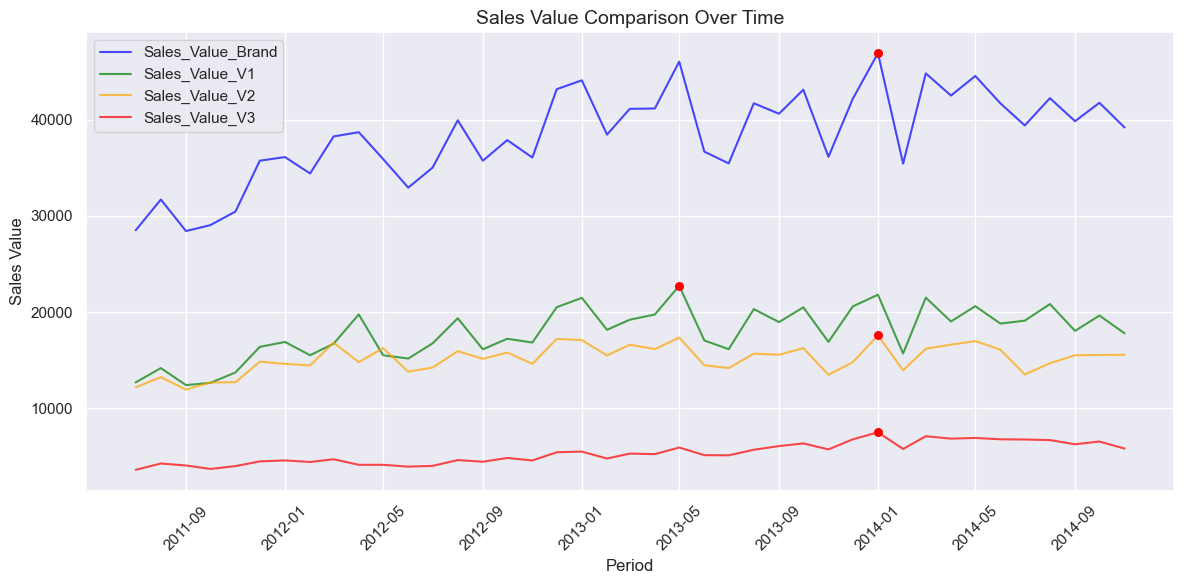

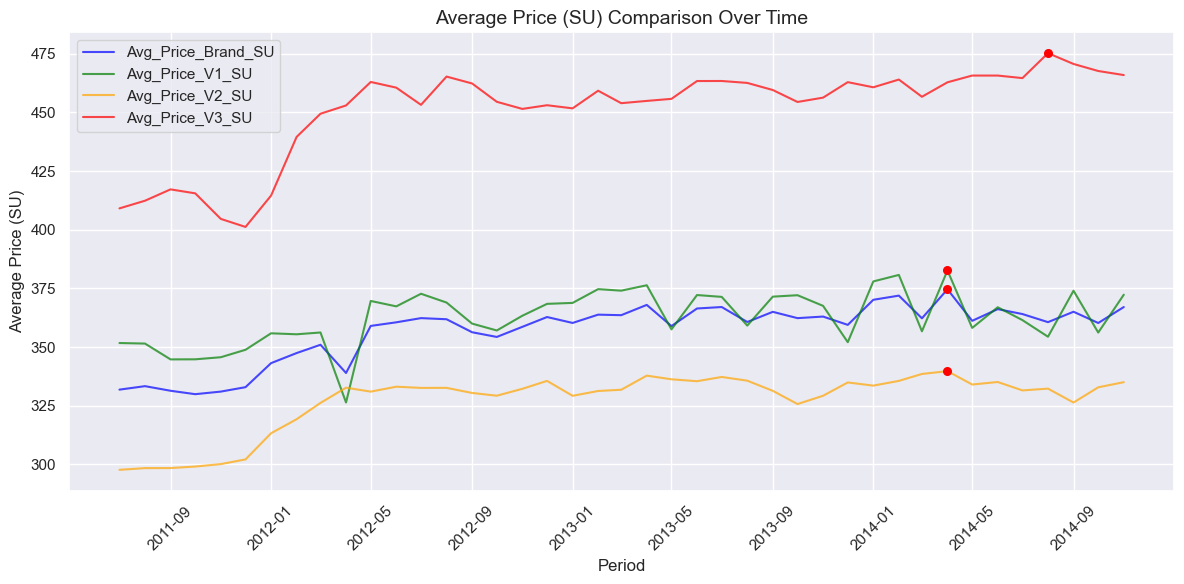

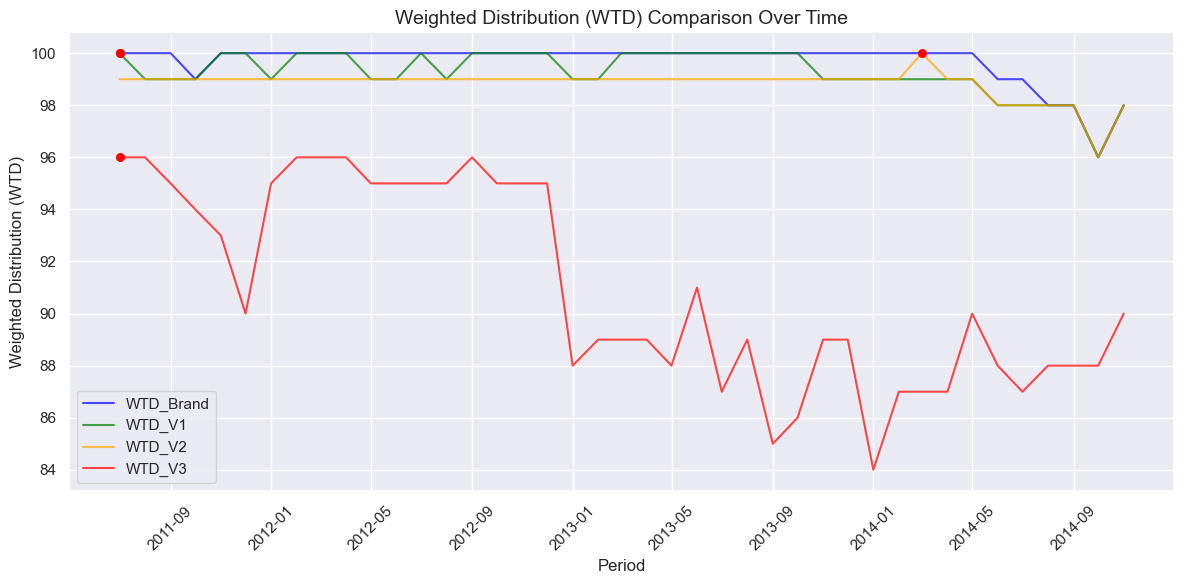

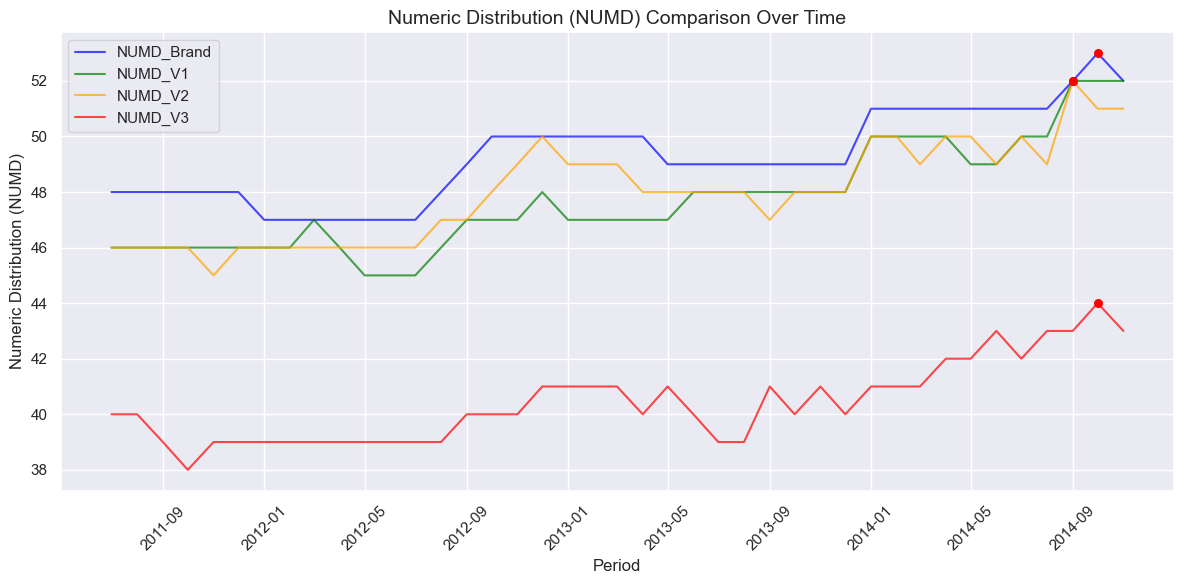

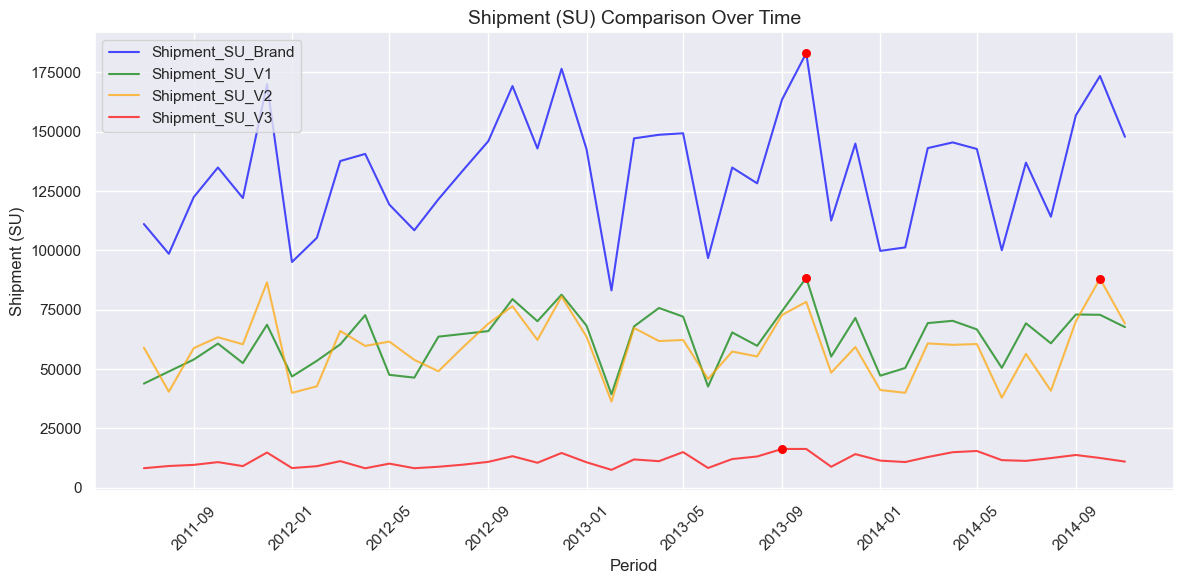

In [52]:
# Ensure 'Period' is in datetime format and set as index
final_merged_data['Period'] = pd.to_datetime(final_merged_data['Period'], errors='coerce')

# Function to plot time series with peak annotation using a small red dot
def plot_with_peaks(data, columns, title, ylabel, colors):
    plt.figure(figsize=(12, 6))
    sns.set(style="darkgrid")
    
    for col, color in zip(columns, colors):
        sns.lineplot(data=data, x='Period', y=col, label=col, color=color, alpha=0.7)
        
        # Annotate the peak point with a small red dot
        highest = data[col].idxmax()
        peak_value = data.loc[highest, col]
        peak_time = data.loc[highest, 'Period']
        plt.scatter(peak_time, peak_value, color='red', s=30, zorder=5)

    plt.title(title, fontsize=14)
    plt.xlabel('Period', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot Sales Value
plot_with_peaks(
    final_merged_data,
    ['Sales_Value_Brand', 'Sales_Value_V1', 'Sales_Value_V2', 'Sales_Value_V3'],
    'Sales Value Comparison Over Time',
    'Sales Value',
    ['blue', 'green', 'orange', 'red']
)

# Plot Average Price (Including Avg_Price_Brand_SU)
plot_with_peaks(
    final_merged_data,
    ['Avg_Price_Brand_SU', 'Avg_Price_V1_SU', 'Avg_Price_V2_SU', 'Avg_Price_V3_SU'],
    'Average Price (SU) Comparison Over Time',
    'Average Price (SU)',
    ['blue', 'green', 'orange', 'red']
)

# Plot Weighted Distribution (WTD)
plot_with_peaks(
    final_merged_data,
    ['WTD_Brand', 'WTD_V1', 'WTD_V2', 'WTD_V3'],
    'Weighted Distribution (WTD) Comparison Over Time',
    'Weighted Distribution (WTD)',
    ['blue', 'green', 'orange', 'red']
)

# Plot Numeric Distribution (NUMD)
plot_with_peaks(
    final_merged_data,
    ['NUMD_Brand', 'NUMD_V1', 'NUMD_V2', 'NUMD_V3'],
    'Numeric Distribution (NUMD) Comparison Over Time',
    'Numeric Distribution (NUMD)',
    ['blue', 'green', 'orange', 'red']
)

# Plot Shipment Comparison
plot_with_peaks(
    final_merged_data,
    ['Shipment_SU_Brand', 'Shipment_SU_V1', 'Shipment_SU_V2', 'Shipment_SU_V3'],
    'Shipment (SU) Comparison Over Time',
    'Shipment (SU)',
    ['blue', 'green', 'orange', 'red']
)


**Observations from Time Series Comparisons**

1. **Sales Value Comparison Over Time:**
   - Sales_Value_Brand dominates with significant fluctuations, peaking in 2013-05 and 2013-12.

2. **Average Price (SU) Comparison Over Time:**
   - Avg_Price_V3_SU remains the highest, with a notable peak in early 2014, while others show stable trends.

3. **Weighted Distribution (WTD) Comparison Over Time:** 
   - WTD_Brand leads with stability, while WTD_V3 shows significant variability and the lowest performance.  
3. **Numeric Distribution (NUMD) Comparison Over Time:** 
   - NUMD_Brand steadily improves, with NUMD_V3 showing the lowest but gradual growth over time.  
4. **Shipment (SU) Comparison Over Time:** 
   - Shipment_SU_Brand dominates with high volatility, while Shipment_SU_V3 remains the lowest but consistently grows.  



### Correlation Analysis

Brand

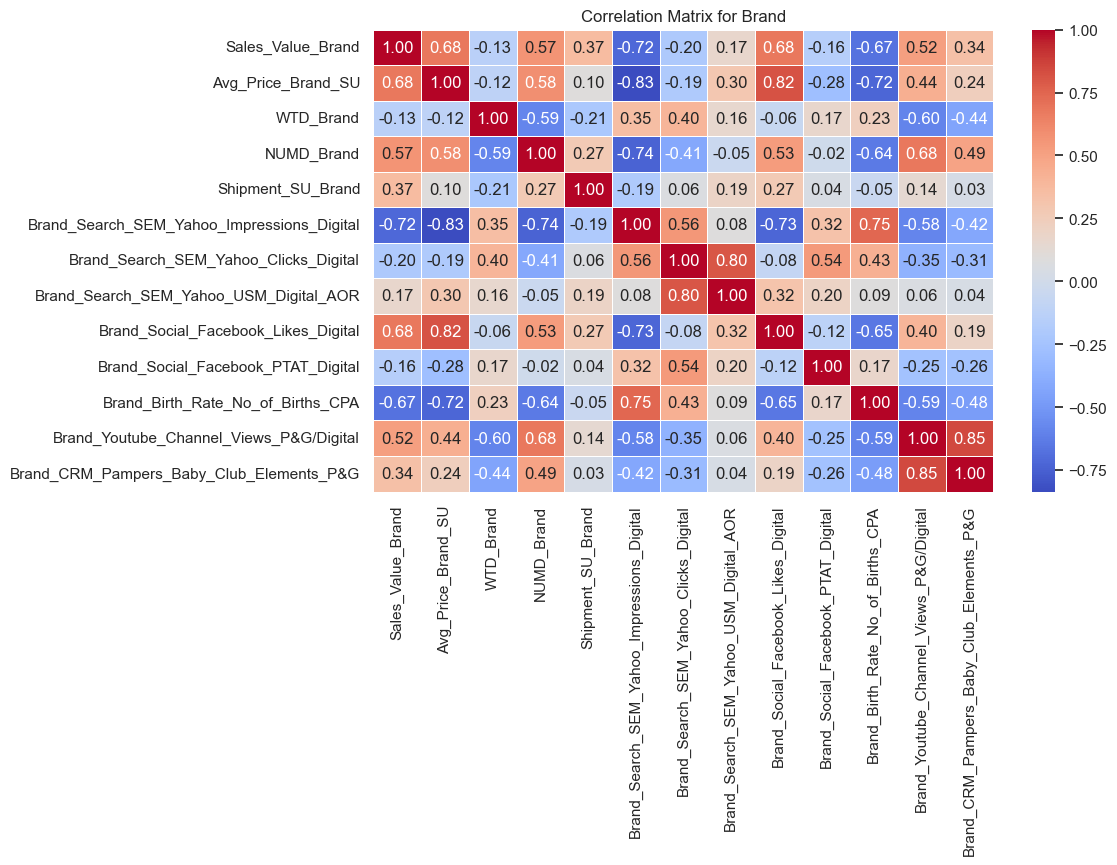

In [53]:
metrics = [
    'Sales_Value_Brand','Avg_Price_Brand_SU', 'WTD_Brand', 'NUMD_Brand', 'Shipment_SU_Brand',
    'Brand_Search_SEM_Yahoo_Impressions_Digital', 'Brand_Search_SEM_Yahoo_Clicks_Digital',
    'Brand_Search_SEM_Yahoo_USM_Digital_AOR', 'Brand_Social_Facebook_Likes_Digital',
    'Brand_Social_Facebook_PTAT_Digital', 'Brand_Birth_Rate_No_of_Births_CPA',
    'Brand_Youtube_Channel_Views_P&G/Digital', 'Brand_CRM_Pampers_Baby_Club_Elements_P&G'
]

# Filter the data to include only the selected metrics
selected_data = final_merged_data[metrics]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and show plot
plt.title('Correlation Matrix for Brand')
plt.show()


**Correlation Matrix for Brand**
- **Sales Value Brand**: 
  - Strong correlation with **Average Price Brand** (0.68) and **Brand Social Facebook Likes Digital** (0.68).
- **Avg Price Brand SU**: 
  - High correlation with **Brand Social Facebook Likes Digital** (0.82).
- **Brand Search SEM Yahoo Metrics**: 
  - Strong negative correlation with **Sales Value Brand** (up to -0.83).
- **Brand Social Facebook PTAT Digital**: 
  - Weak correlations with most metrics.

V1

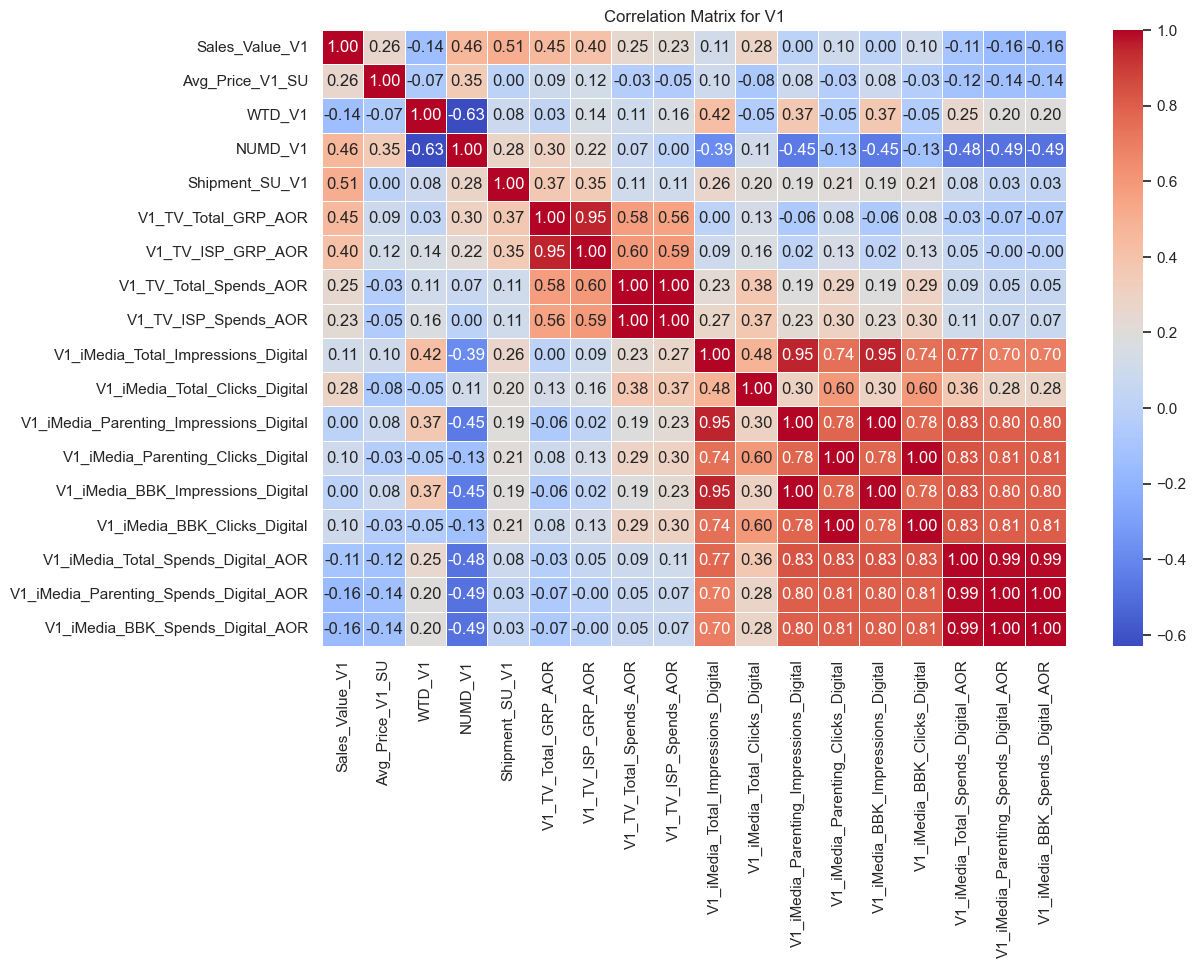

In [54]:
metrics = [
    'Sales_Value_V1','Avg_Price_V1_SU', 'WTD_V1', 'NUMD_V1', 'Shipment_SU_V1',
    'V1_TV_Total_GRP_AOR', 'V1_TV_ISP_GRP_AOR', 'V1_TV_Total_Spends_AOR', 'V1_TV_ISP_Spends_AOR',
    'V1_iMedia_Total_Impressions_Digital', 'V1_iMedia_Total_Clicks_Digital',
    'V1_iMedia_Parenting_Impressions_Digital', 'V1_iMedia_Parenting_Clicks_Digital',
    'V1_iMedia_BBK_Impressions_Digital', 'V1_iMedia_BBK_Clicks_Digital',
    'V1_iMedia_Total_Spends_Digital_AOR', 'V1_iMedia_Parenting_Spends_Digital_AOR',
    'V1_iMedia_BBK_Spends_Digital_AOR'
]

# Filter the data to include only the selected metrics
selected_data = final_merged_data[metrics]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and show plot
plt.title('Correlation Matrix for V1')
plt.show()


**Correlation Matrix for V1**
- **Sales Value V1**: 
  - Moderate correlations with **V1_TV_Total_GRP_AOR** (0.45) and **Shipment_SU_V1** (0.51).
- **V1_TV Total GRP AOR**: 
  - Strong internal correlations (up to 0.95).
- **iMedia Metrics**: 
  - Strong interdependence, especially for **Parenting and BBK metrics** (0.74 to 0.99).
- **Shipment_SU_V1**: 
  - Weak correlation with most digital and media spends metrics.

V2

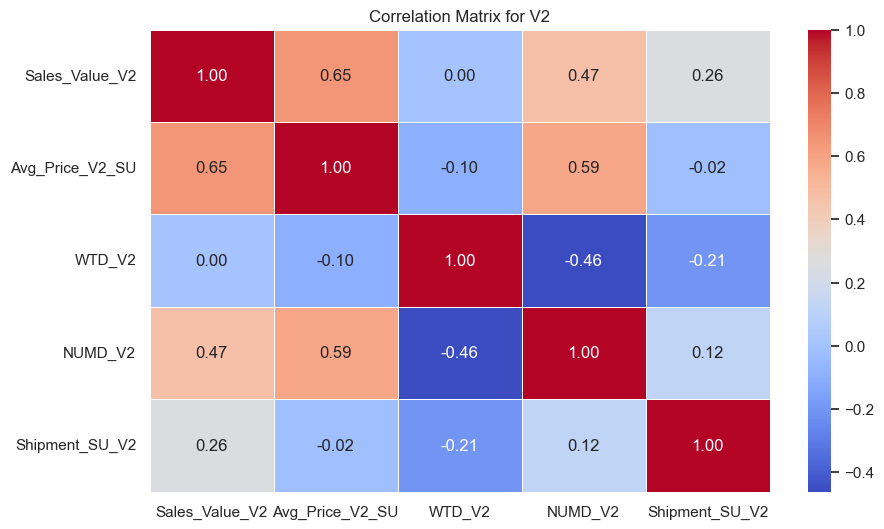

In [55]:
metrics = [
    'Sales_Value_V2','Avg_Price_V2_SU', 'WTD_V2', 'NUMD_V2', 'Shipment_SU_V2'
]

# Filter the data to include only the selected metrics
selected_data = final_merged_data[metrics]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and show plot
plt.title('Correlation Matrix for V2')
plt.show()


**Correlation Matrix for V2**
- **Sales Value V2**: 
  - Moderate correlation with **Average Price V2 SU** (0.65) and **NUMD V2** (0.47).
- **NUMD V2**: 
  - Moderate positive correlation with **Sales Value V2** (0.47).
- **WTD V2**: 
  - No significant correlations.

V3

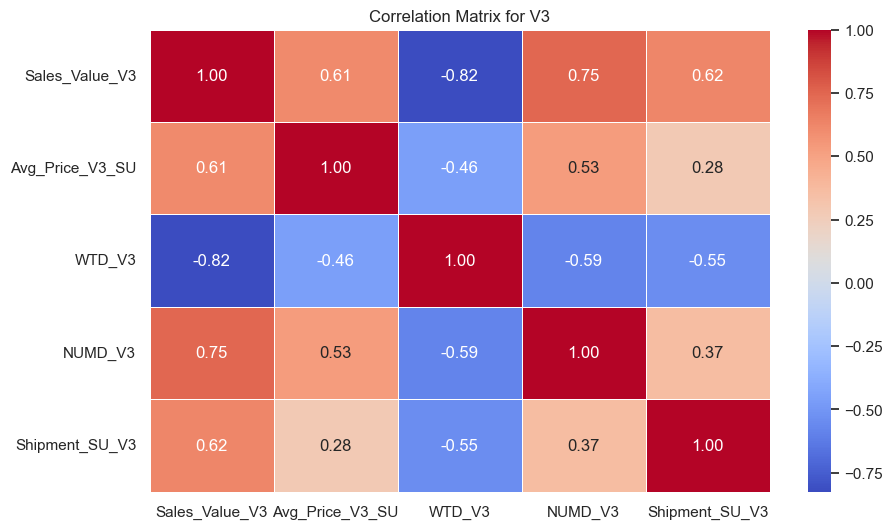

In [56]:
metrics = [
    'Sales_Value_V3','Avg_Price_V3_SU', 'WTD_V3', 'NUMD_V3', 'Shipment_SU_V3'
]

# Filter the data to include only the selected metrics
selected_data = final_merged_data[metrics]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and show plot
plt.title('Correlation Matrix for V3')
plt.show()


**Correlation Matrix for V3**
- **Sales Value V3**: 
  - Strong negative correlation with **WTD V3** (-0.82), positive correlation with **NUMD V3** (0.75).
- **Avg Price V3 SU**: 
  - Correlates moderately with **NUMD V3** (0.53).
- **Shipment_SU_V3**: 
  - Moderate correlation with **Sales Value V3** (0.62) and weak with others.

### Outlier Detection 

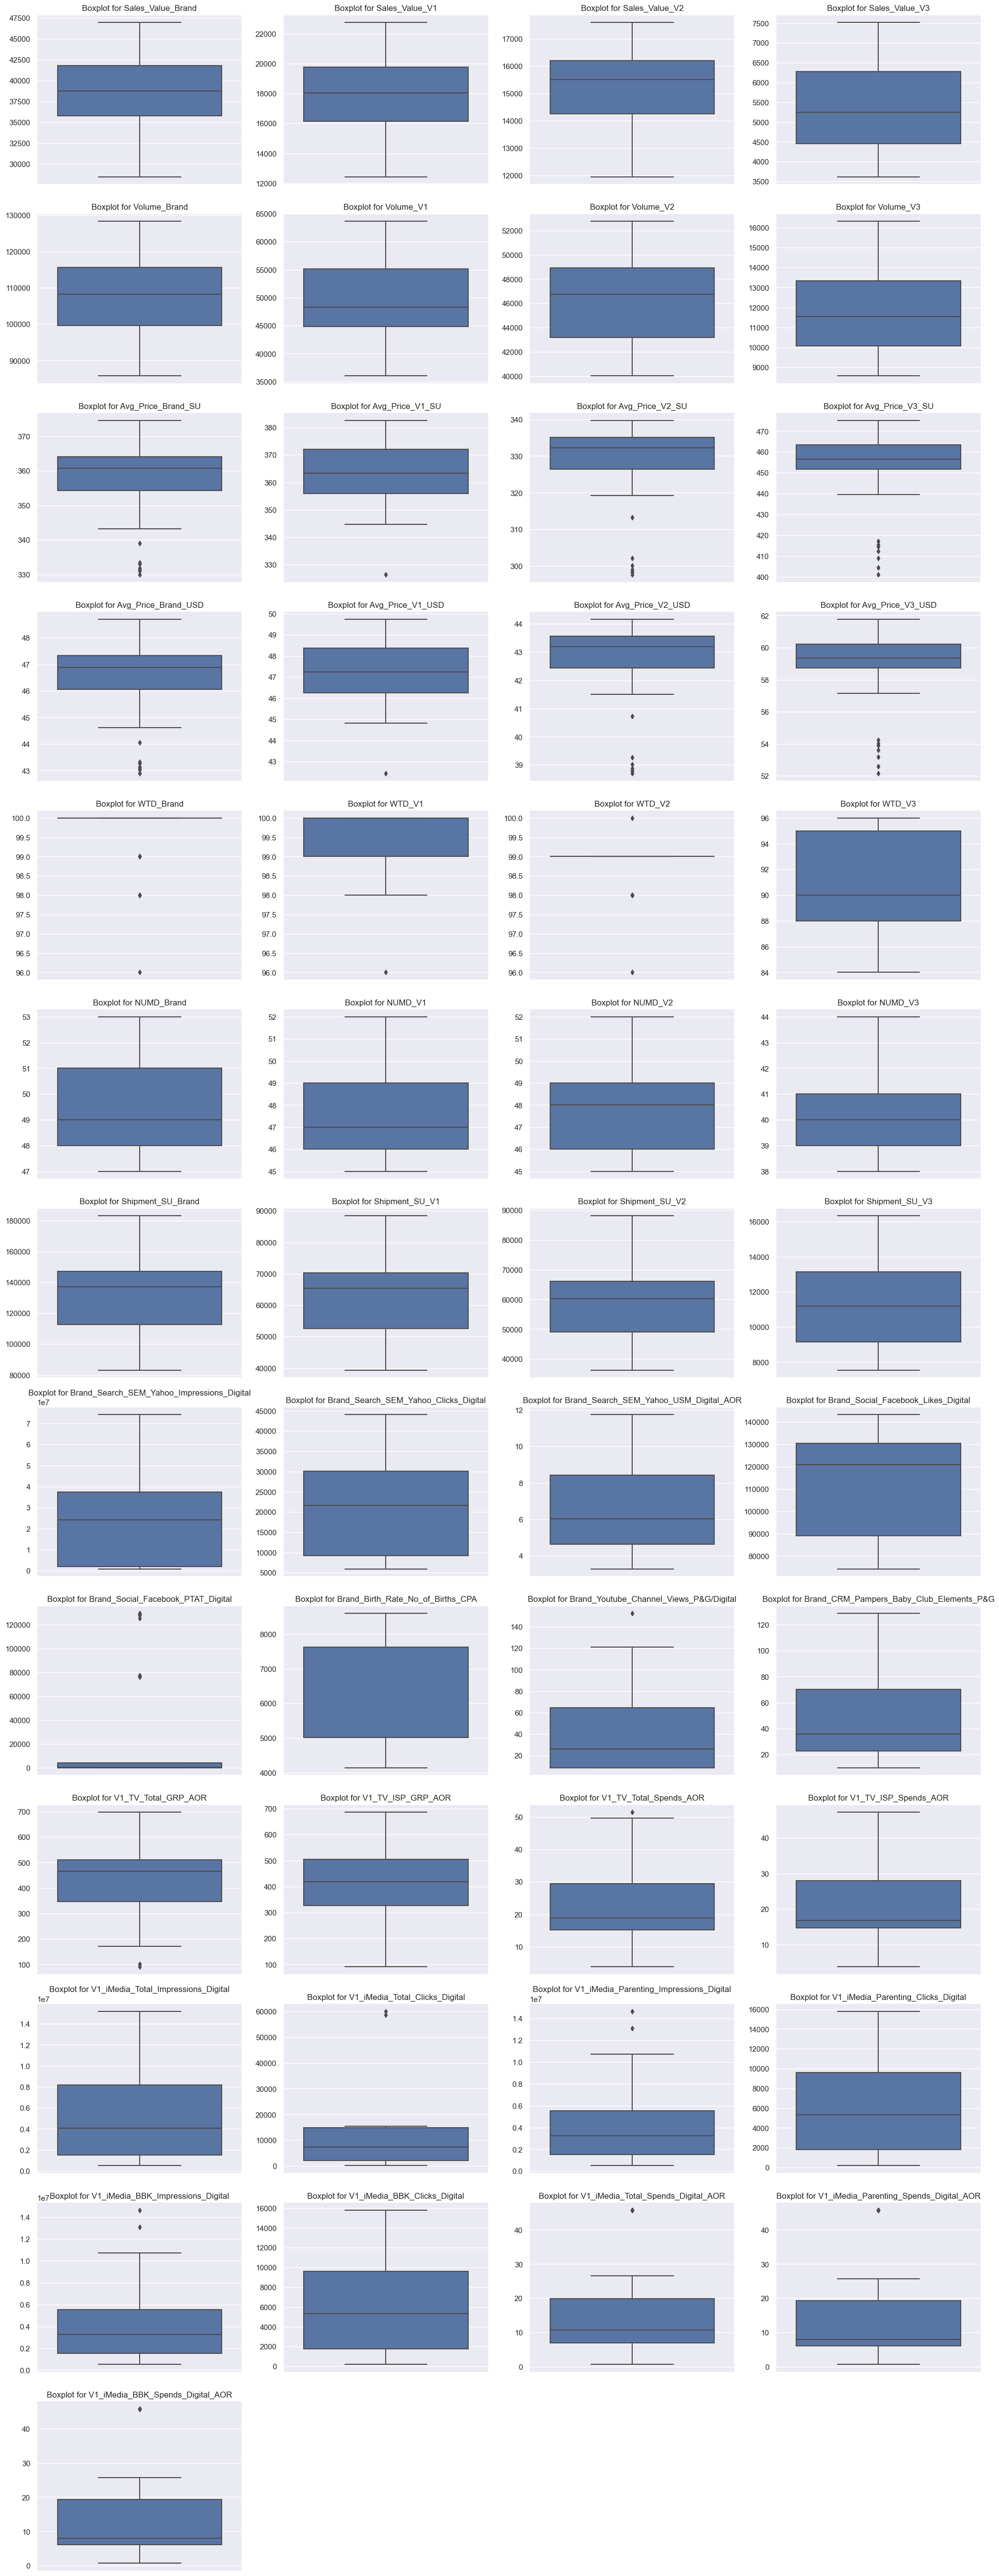

In [57]:
# Filter out non-numeric columns
numeric_cols = final_merged_data.select_dtypes(include=['number']).columns

# Calculate number of rows and columns needed for the subplot grid
n_cols = 4  
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Set up the figure size
plt.figure(figsize=(20, n_rows * 4))

# Loop through each numeric column in the dataset
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1) 
    sns.boxplot(y=final_merged_data[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

 Outlier Detection Summary

1. **Sales & Volume**: No significant outliers across `Sales_Value` and `Volume` metrics (`Brand`, `V1`, `V2`, `V3`).

2. **Average Price**: Outliers in `Avg_Price` variables (e.g., `Avg_Price_Brand_SU`, `Avg_Price_V1_SU`) on the lower side.

3. **WTD Variables**: Outliers detected in `WTD_Brand`, `WTD_V1`, `WTD_V2`, `WTD_V3`.

4. **NUMD**: No significant outliers across all `NUMD` variables.

5. **Shipment**: Few outliers in `Shipment_SU_Brand`, `Shipment_SU_V1`, `Shipment_SU_V2`, `Shipment_SU_V3`.

6. **Media Metrics (Digital)**: Prominent outliers in metrics like `Brand_Social_Facebook_Likes`, `V1_Media_Total_Impressions_Digital`, and similar media variables.

7. **CRM & YouTube**: Outliers detected in `Brand_YouTube_Channel_Views` and `CRM_Pampers_Baby_Club_Elements`.


### Distribution Analysis

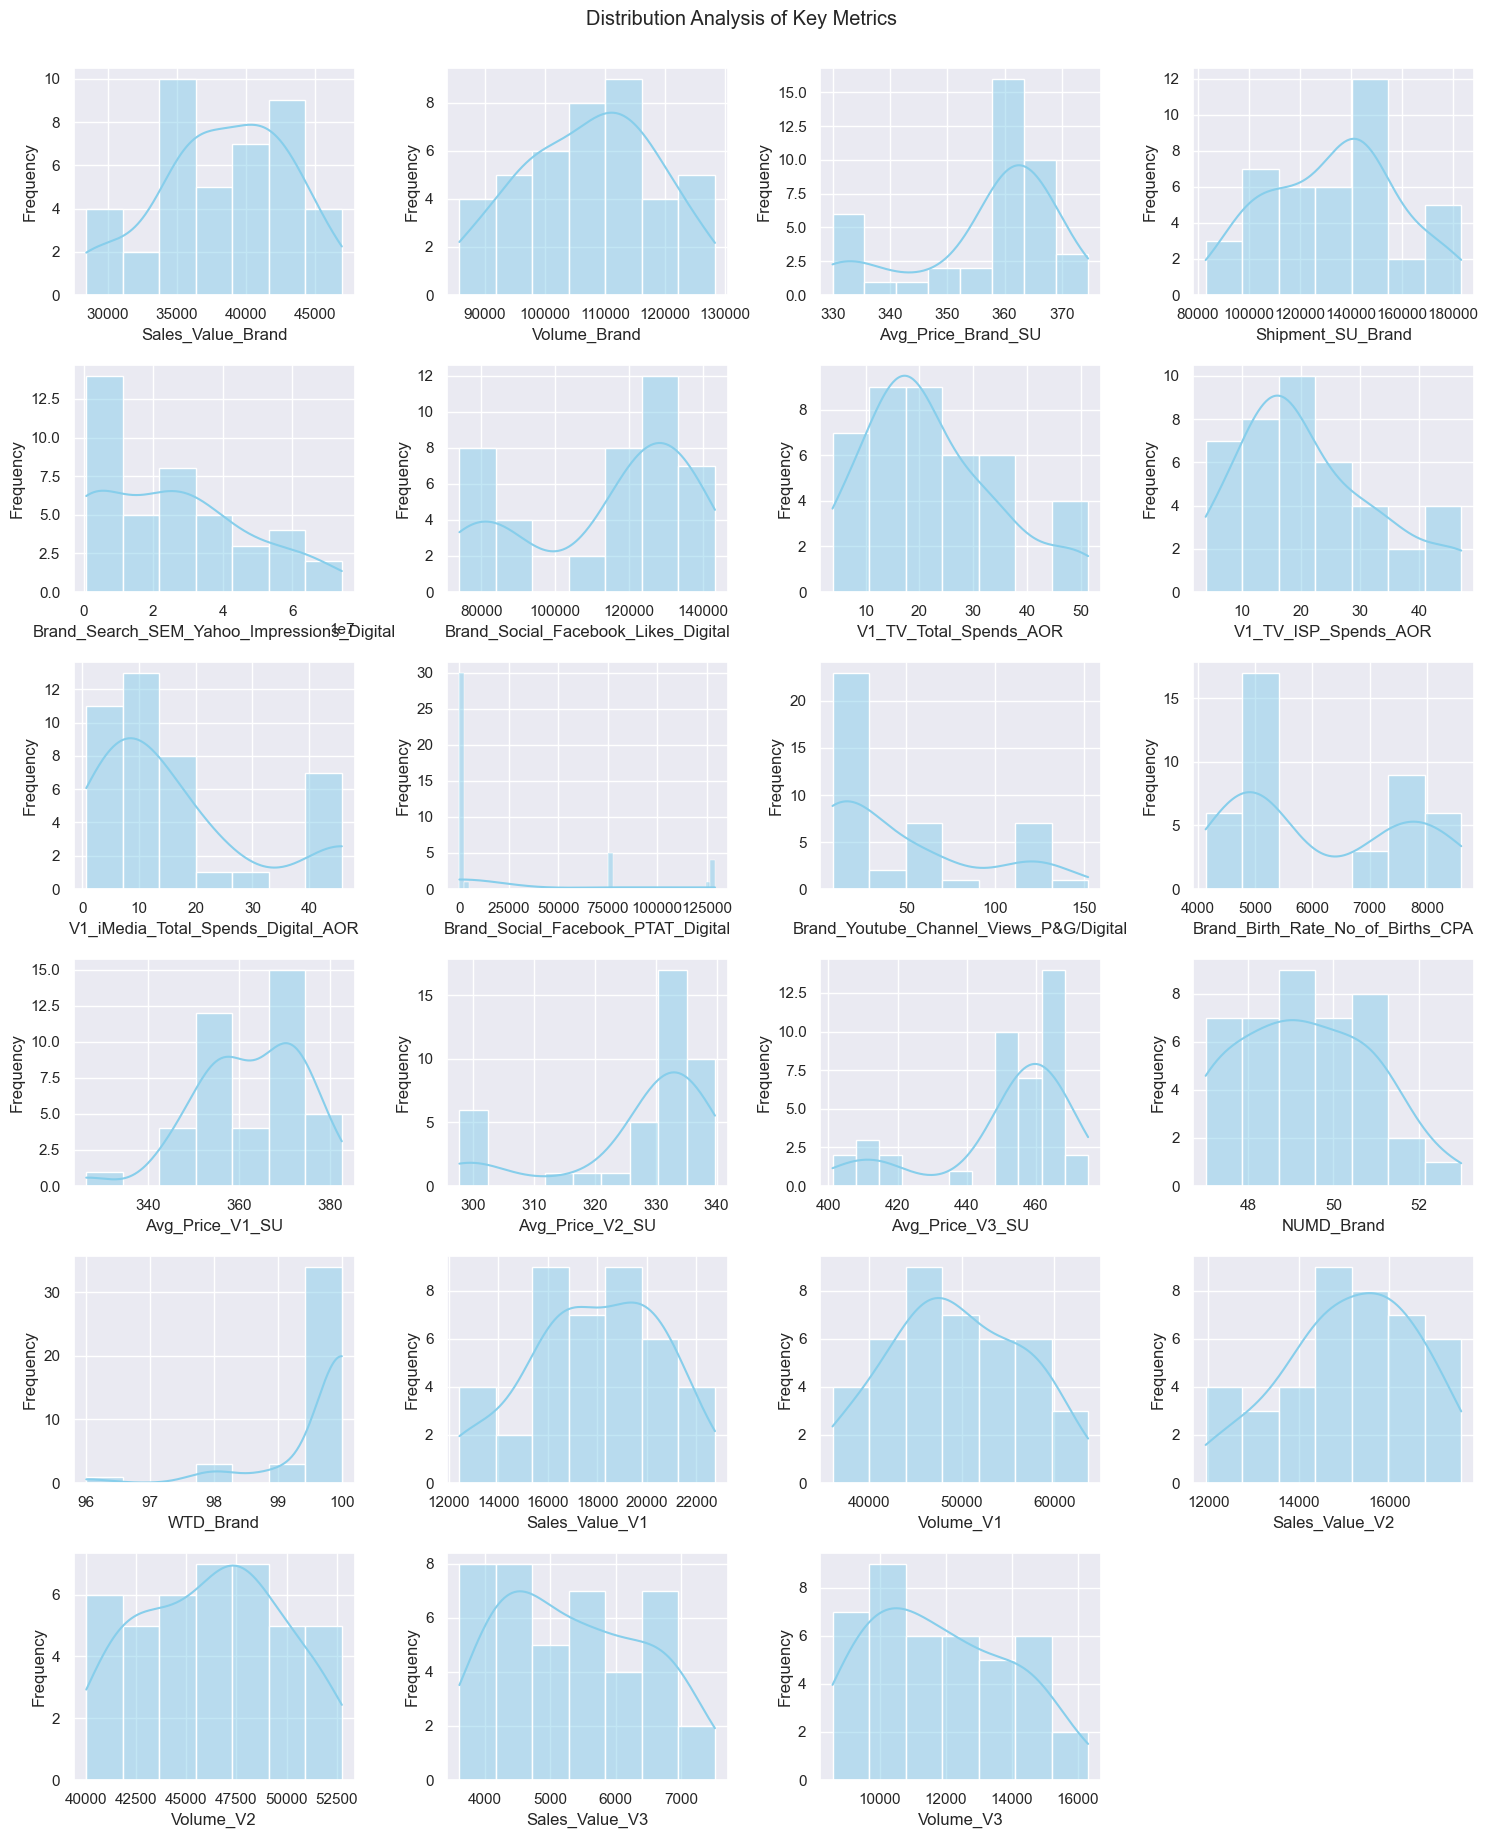

In [58]:
# Define the columns of interest for distribution analysis, including the additional ones
columns_of_interest = [
    'Sales_Value_Brand', 'Volume_Brand', 'Avg_Price_Brand_SU',
    'Shipment_SU_Brand', 'Brand_Search_SEM_Yahoo_Impressions_Digital', 
    'Brand_Social_Facebook_Likes_Digital', 'V1_TV_Total_Spends_AOR',
    'V1_TV_ISP_Spends_AOR', 'V1_iMedia_Total_Spends_Digital_AOR',
    'Brand_Social_Facebook_PTAT_Digital', 'Brand_Youtube_Channel_Views_P&G/Digital',
    'Brand_Birth_Rate_No_of_Births_CPA', 'Avg_Price_V1_SU', 'Avg_Price_V2_SU', 
    'Avg_Price_V3_SU', 'NUMD_Brand', 'WTD_Brand', 
    'Sales_Value_V1', 'Volume_V1', 'Sales_Value_V2', 'Volume_V2', 
    'Sales_Value_V3', 'Volume_V3'
]

# Set up the plot grid
plt.figure(figsize=(15, 18))  # Adjusted size for more plots
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(6, 4, i)  # 6 rows, 4 columns for better organization
    sns.histplot(final_merged_data[col].dropna(), kde=True, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle("Distribution Analysis of Key Metrics", y=1.02)
plt.show()



- **Sales_Value_Brand & Volume_Brand**: Right-skewed, indicating most data points are clustered at lower values with a few large sales/volumes.
- **Avg_Price_Brand_SU**: Nearly normal, suggesting a balanced range of pricing.
- **Shipment_SU_Brand**: Right-skewed, with a few months having much higher shipment volumes.
- **Brand_Search_SEM_Yahoo_Impressions_Digital**: Right-skewed, with most impressions concentrated at lower values.
- **Brand_Social_Facebook_Likes_Digital**: Right-skewed, indicating low likes in most cases with occasional spikes.
- **V1_TV_Total_Spends_AOR**: Right-skewed, with a few large spending months.
- **V1_TV_ISP_Spends_AOR**: Right-skewed, showing a few months of high TV spends.
- **V1_iMedia_Total_Spends_Digital_AOR**: Right-skewed, indicating occasional high spending months.
- **Brand_Youtube_Channel_Views_P&G/Digital**: Right-skewed, with most views on the lower end.
- **Avg_Price_V1_SU, V2_SU, V3_SU**: Nearly normal distribution, indicating consistent pricing.
- **NUMD_Brand & WTD_Brand**: Normal distribution, indicating consistency over time.
- **Sales_Value_V1, V2, V3 & Volume_V1, V2, V3**: Right-skewed, with several months showing low values and some high spikes.


### Monthly Analysis of Sales Data (Histograms)

C:\Users\rajka\AppData\Local\Temp\ipykernel_920\3311602105.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg_data = final_merged_data.groupby('Month').mean().reindex(month_order)


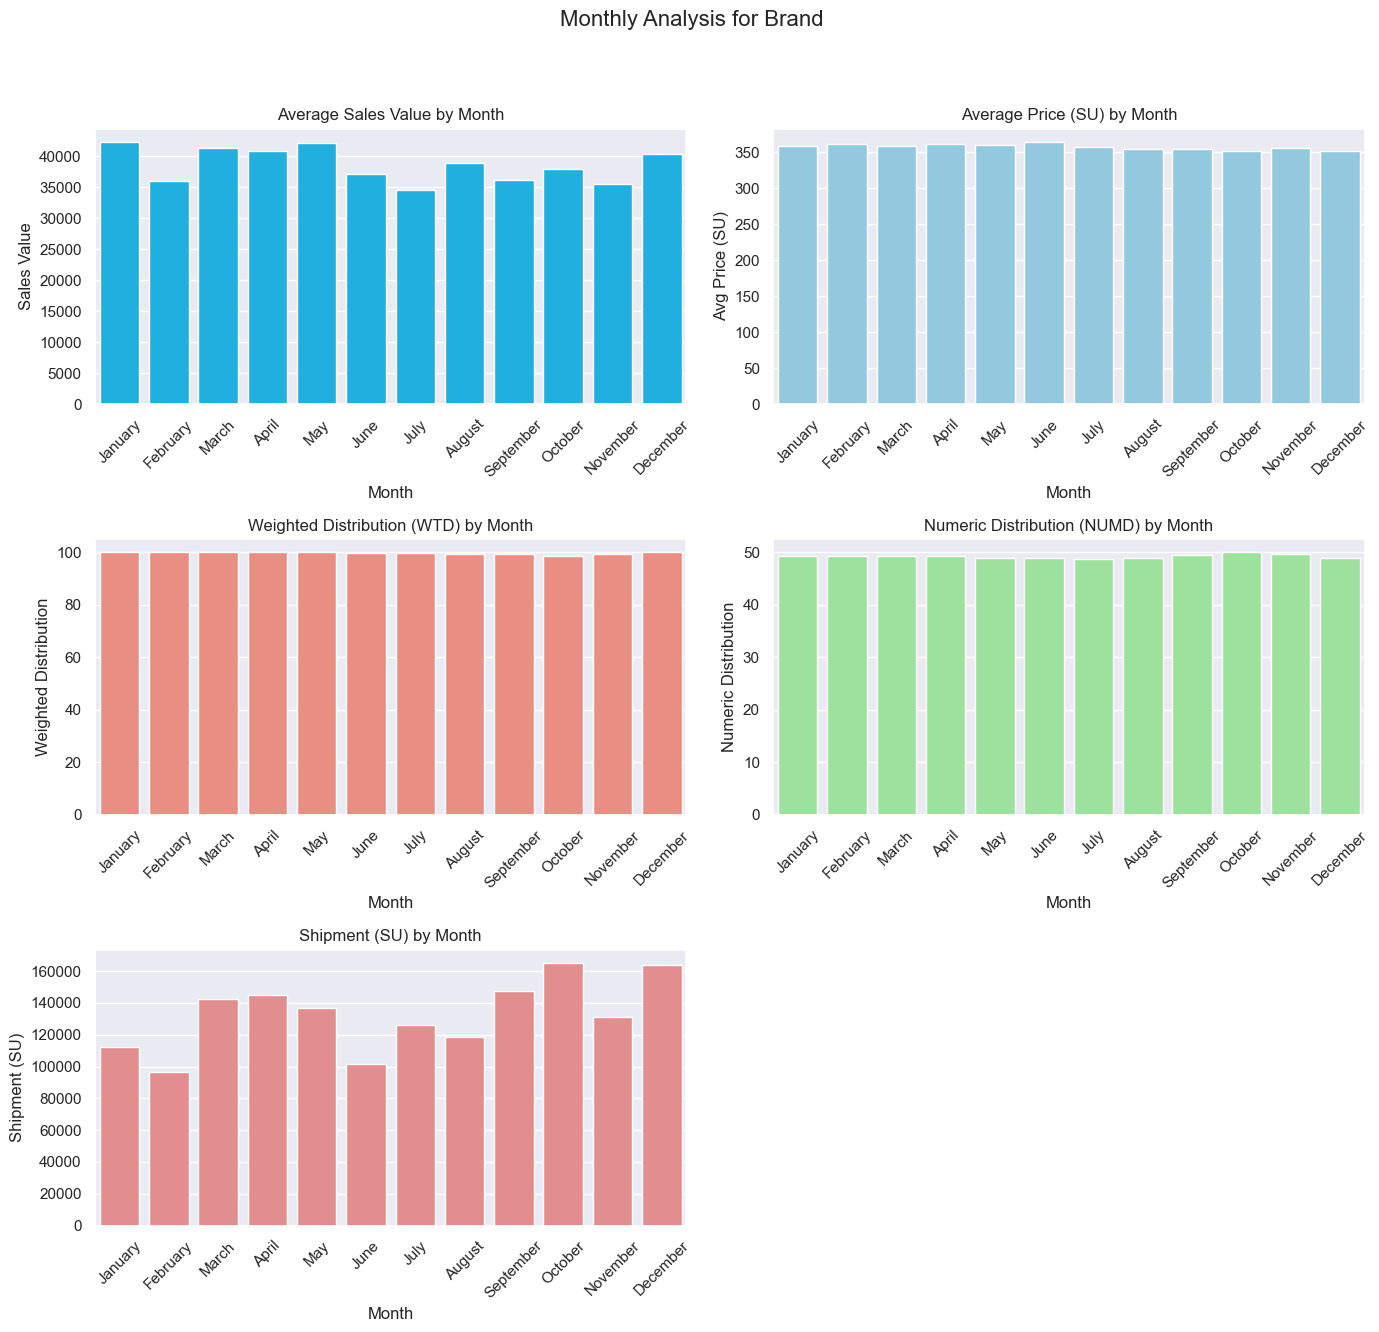

C:\Users\rajka\AppData\Local\Temp\ipykernel_920\3311602105.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg_data = final_merged_data.groupby('Month').mean().reindex(month_order)


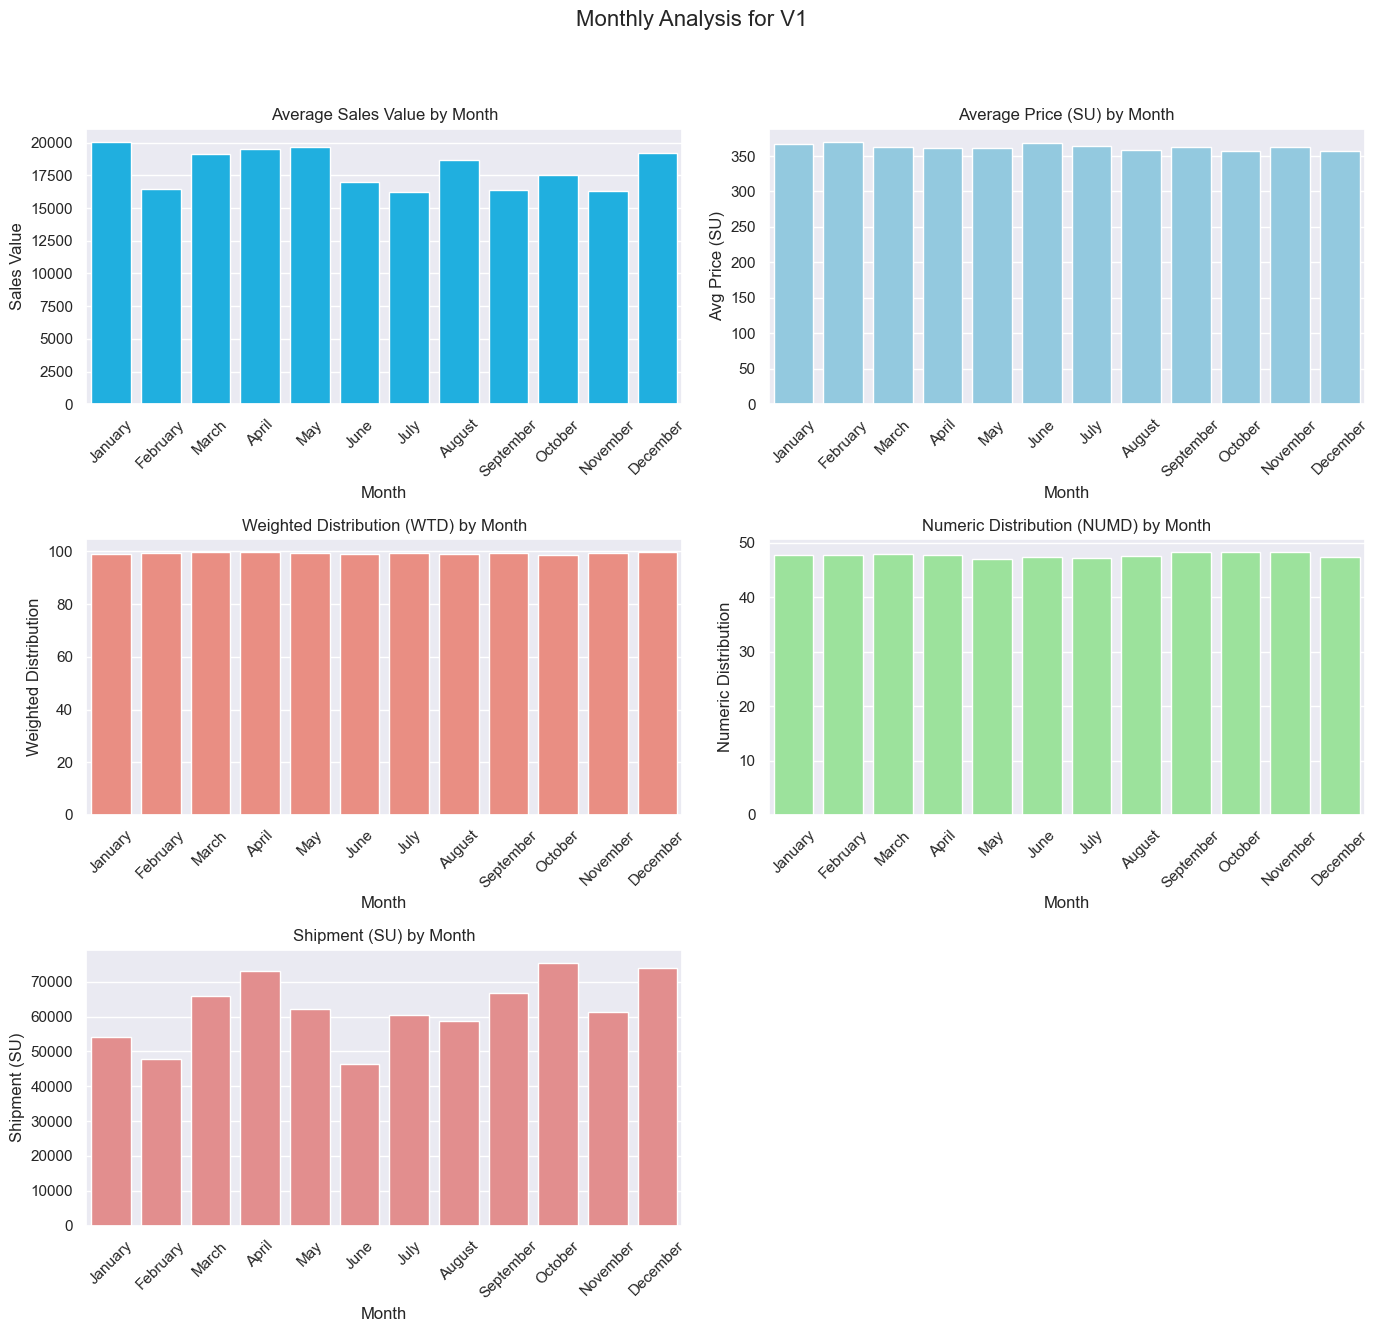

C:\Users\rajka\AppData\Local\Temp\ipykernel_920\3311602105.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg_data = final_merged_data.groupby('Month').mean().reindex(month_order)


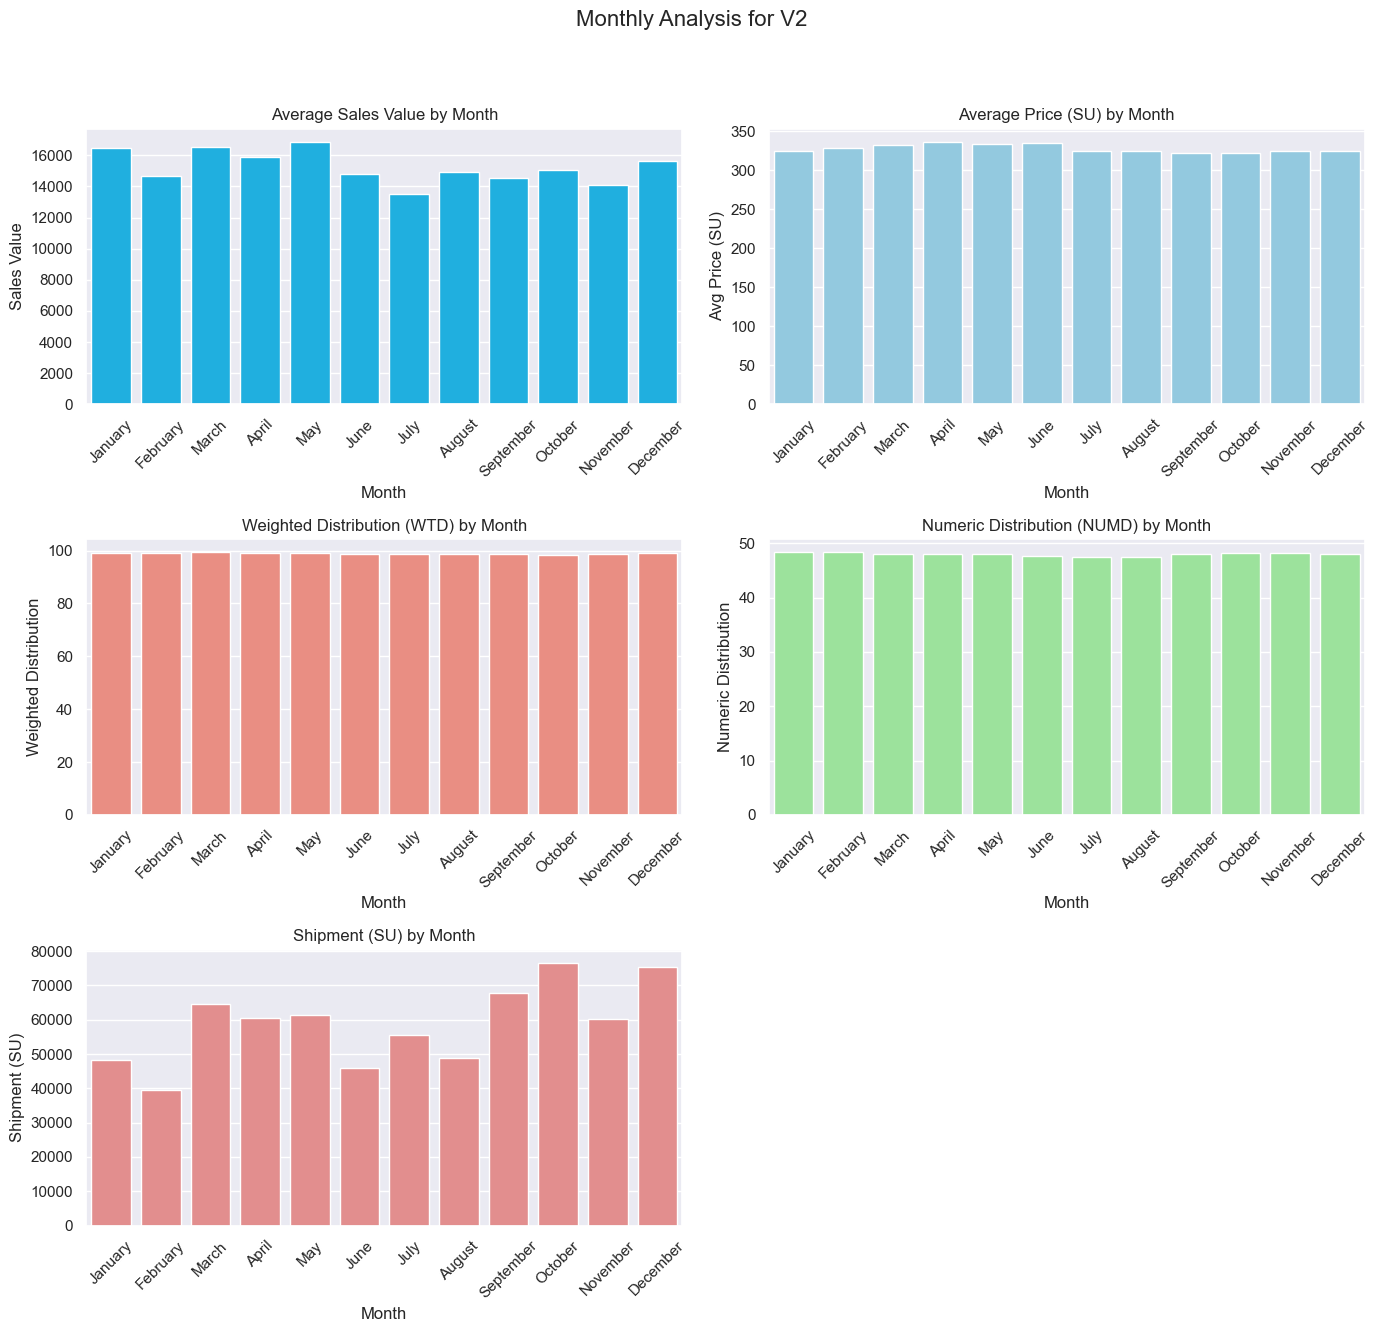

C:\Users\rajka\AppData\Local\Temp\ipykernel_920\3311602105.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg_data = final_merged_data.groupby('Month').mean().reindex(month_order)


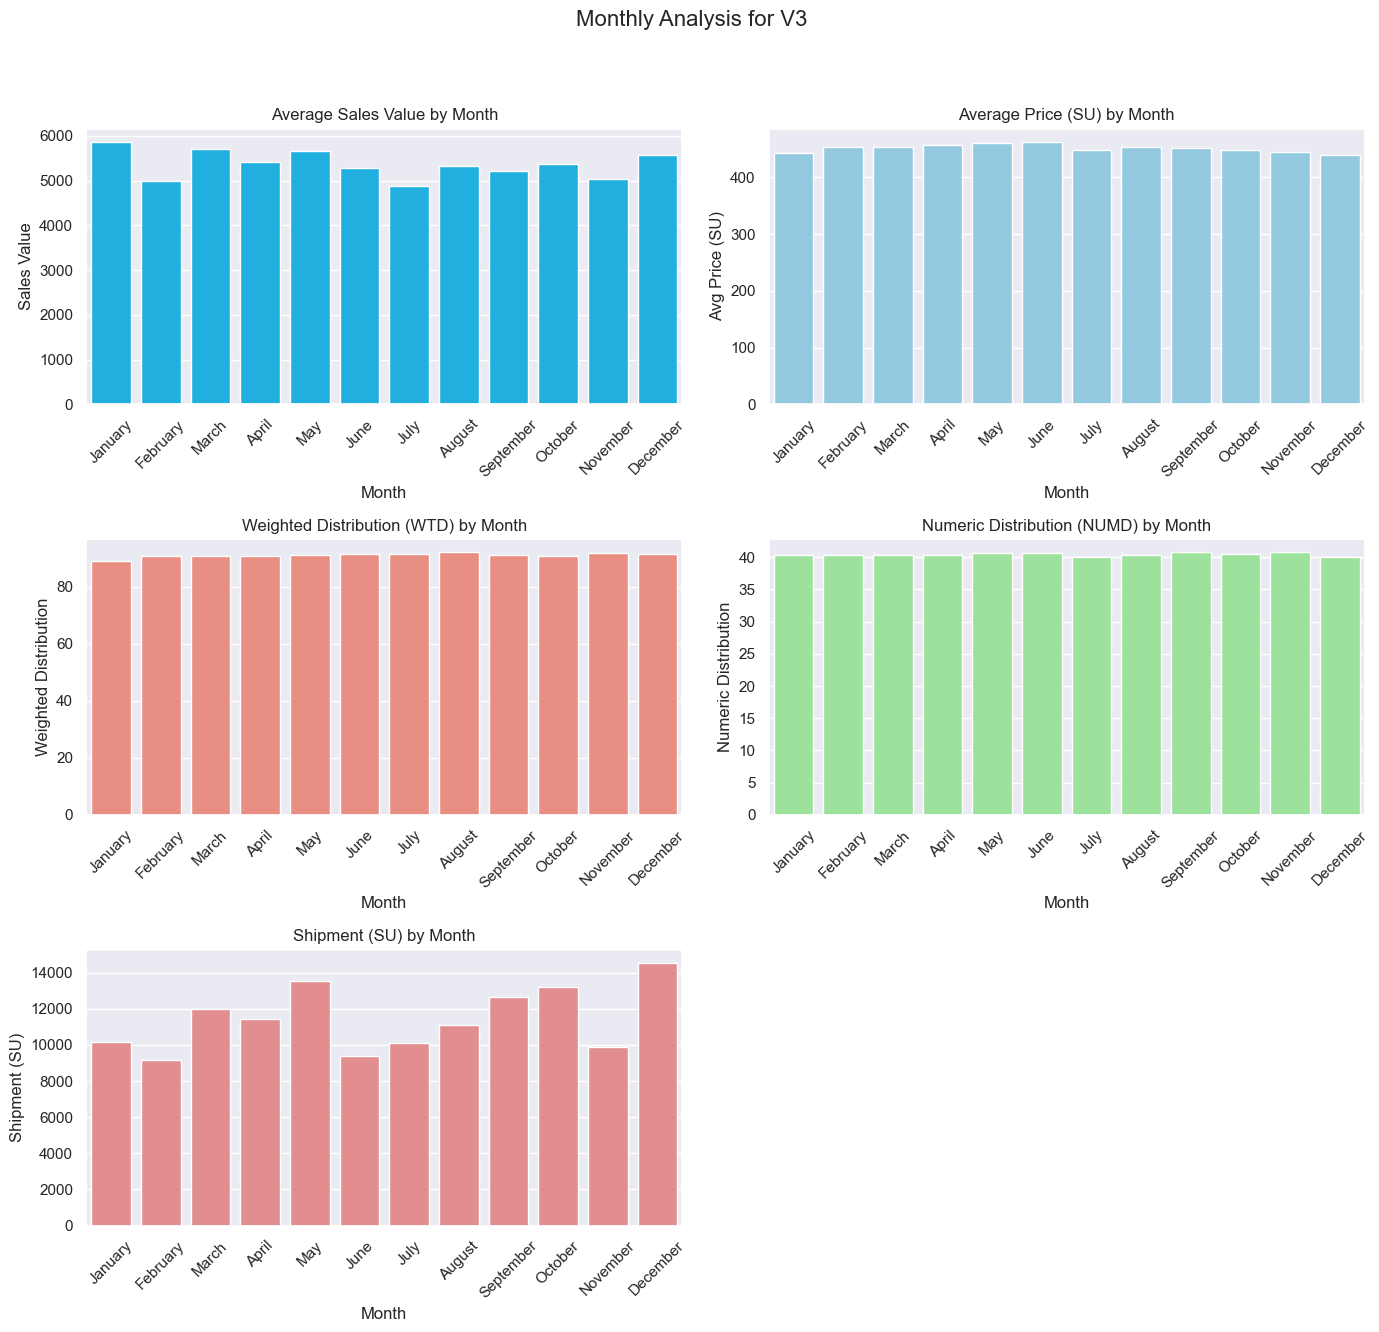

In [59]:
# List of metrics to plot
metrics = {
    "Sales Value": ["Sales_Value_Brand", "Sales_Value_V1", "Sales_Value_V2", "Sales_Value_V3"],
    "Avg Price (SU)": ["Avg_Price_Brand_SU", "Avg_Price_V1_SU", "Avg_Price_V2_SU", "Avg_Price_V3_SU"],
    "Weighted Distribution (WTD)": ["WTD_Brand", "WTD_V1", "WTD_V2", "WTD_V3"],
    "Numeric Distribution (NUMD)": ["NUMD_Brand", "NUMD_V1", "NUMD_V2", "NUMD_V3"],
    "Shipment (SU)": ["Shipment_SU_Brand", "Shipment_SU_V1", "Shipment_SU_V2", "Shipment_SU_V3"]
}

# Extract the month name to group by month across all years
final_merged_data['Month'] = final_merged_data['Period'].dt.month_name()



# Reindex by calendar month order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Loop through each variant and plot metrics
for i, variant in enumerate(["Brand", "V1", "V2", "V3"]):
    # Group data by 'Month' and calculate mean for each metric
    monthly_avg_data = final_merged_data.groupby('Month').mean().reindex(month_order)

    # Set up the figure for the current variant
    fig, axes = plt.subplots(3, 2, figsize=(14, 14))
    fig.suptitle(f"Monthly Analysis for {variant}", fontsize=16)

    # Plot each metric in the corresponding subplot
    sns.barplot(x=monthly_avg_data.index, y=monthly_avg_data[metrics["Sales Value"][i]], ax=axes[0, 0], color='deepskyblue')
    axes[0, 0].set_title("Average Sales Value by Month")
    axes[0, 0].set_xlabel("Month")
    axes[0, 0].set_ylabel("Sales Value")
    axes[0, 0].tick_params(axis='x', rotation=45)

    sns.barplot(x=monthly_avg_data.index, y=monthly_avg_data[metrics["Avg Price (SU)"][i]], ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title("Average Price (SU) by Month")
    axes[0, 1].set_xlabel("Month")
    axes[0, 1].set_ylabel("Avg Price (SU)")
    axes[0, 1].tick_params(axis='x', rotation=45)

    sns.barplot(x=monthly_avg_data.index, y=monthly_avg_data[metrics["Weighted Distribution (WTD)"][i]], ax=axes[1, 0], color='salmon')
    axes[1, 0].set_title("Weighted Distribution (WTD) by Month")
    axes[1, 0].set_xlabel("Month")
    axes[1, 0].set_ylabel("Weighted Distribution")
    axes[1, 0].tick_params(axis='x', rotation=45)

    sns.barplot(x=monthly_avg_data.index, y=monthly_avg_data[metrics["Numeric Distribution (NUMD)"][i]], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title("Numeric Distribution (NUMD) by Month")
    axes[1, 1].set_xlabel("Month")
    axes[1, 1].set_ylabel("Numeric Distribution")
    axes[1, 1].tick_params(axis='x', rotation=45)

    sns.barplot(x=monthly_avg_data.index, y=monthly_avg_data[metrics["Shipment (SU)"][i]], ax=axes[2, 0], color='lightcoral')
    axes[2, 0].set_title("Shipment (SU) by Month")
    axes[2, 0].set_xlabel("Month")
    axes[2, 0].set_ylabel("Shipment (SU)")
    axes[2, 0].tick_params(axis='x', rotation=45)

    # Hide any empty subplots
    axes[2, 1].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
    plt.show()


### Sales value vs avg price (month wise)

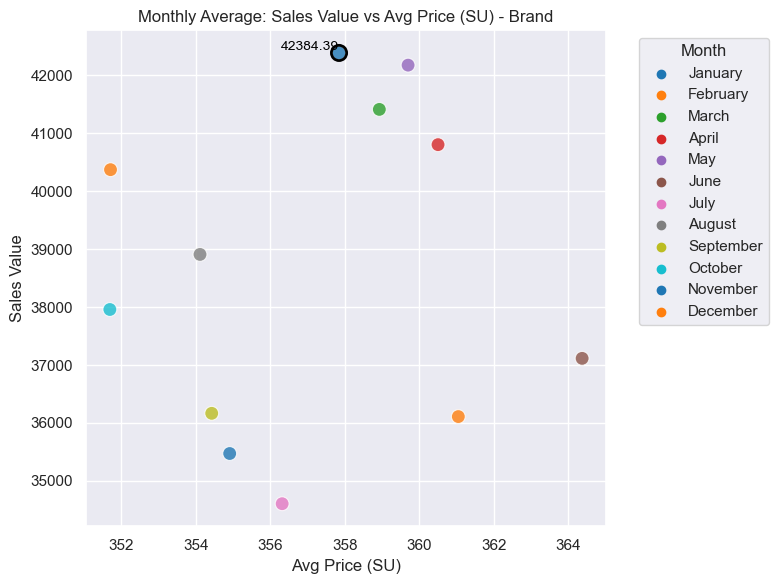

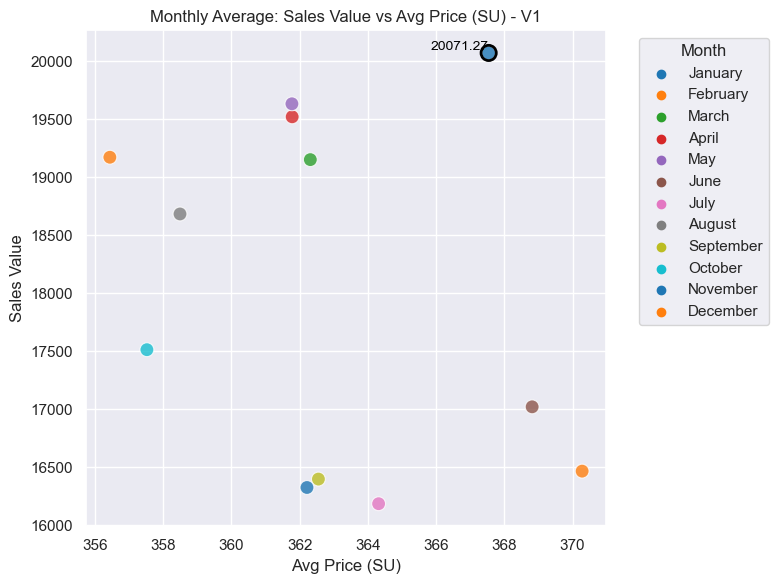

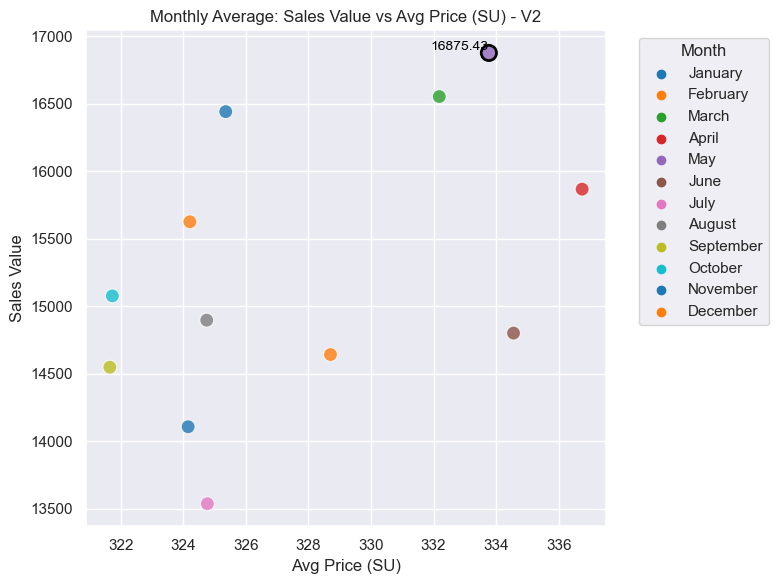

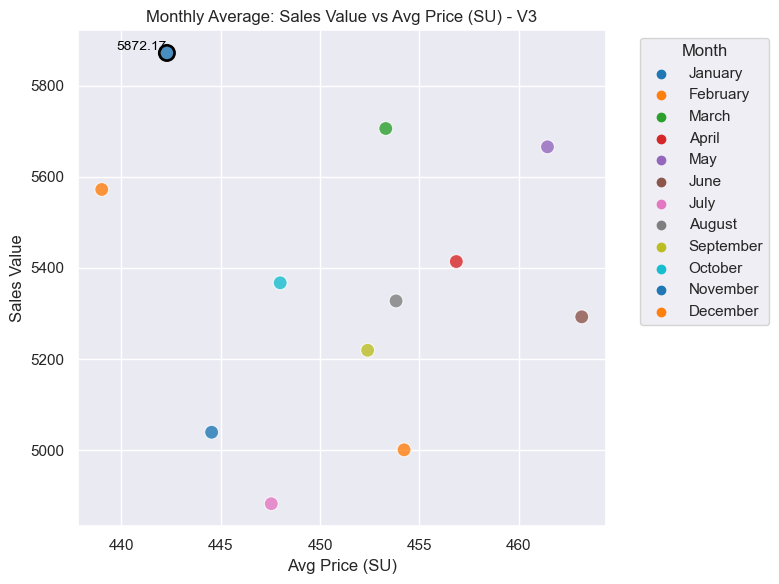

In [60]:
final_merged_data['Month'] = final_merged_data['Period'].dt.month_name()

# Define metrics for each product line
product_lines = {
    "Brand": ("Sales_Value_Brand", "Avg_Price_Brand_SU"),
    "V1": ("Sales_Value_V1", "Avg_Price_V1_SU"),
    "V2": ("Sales_Value_V2", "Avg_Price_V2_SU"),
    "V3": ("Sales_Value_V3", "Avg_Price_V3_SU")
}

# Plot each product line separately
for label, (sales_col, price_col) in product_lines.items():
    # Calculate monthly averages across all years for the product line
    monthly_avg_data = final_merged_data.groupby('Month')[[sales_col, price_col]].mean().reindex([
        "January", "February", "March", "April", "May", "June", 
        "July", "August", "September", "October", "November", "December"
    ])
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=monthly_avg_data, x=price_col, y=sales_col, hue=monthly_avg_data.index, 
        palette='tab10', s=100, edgecolor='w', alpha=0.8
    )
    
    # Customize plot details
    plt.title(f"Monthly Average: Sales Value vs Avg Price (SU) - {label}")
    plt.xlabel("Avg Price (SU)")
    plt.ylabel("Sales Value")
    plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Highlight the highest sales point with only black outline (no red fill)
    max_idx = monthly_avg_data[sales_col].idxmax()
    max_price = monthly_avg_data[price_col].loc[max_idx]
    max_sales = monthly_avg_data[sales_col].max()
    plt.scatter(max_price, max_sales, color='none', edgecolor='black', linewidth=2, s=120, zorder=5)
    plt.text(max_price, max_sales, f'{max_sales:.2f}', color='black', ha='right', va='bottom', fontsize=10)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


### Yearly Comparison of V1, V2, V3 Percentage Change(Pie Chart)

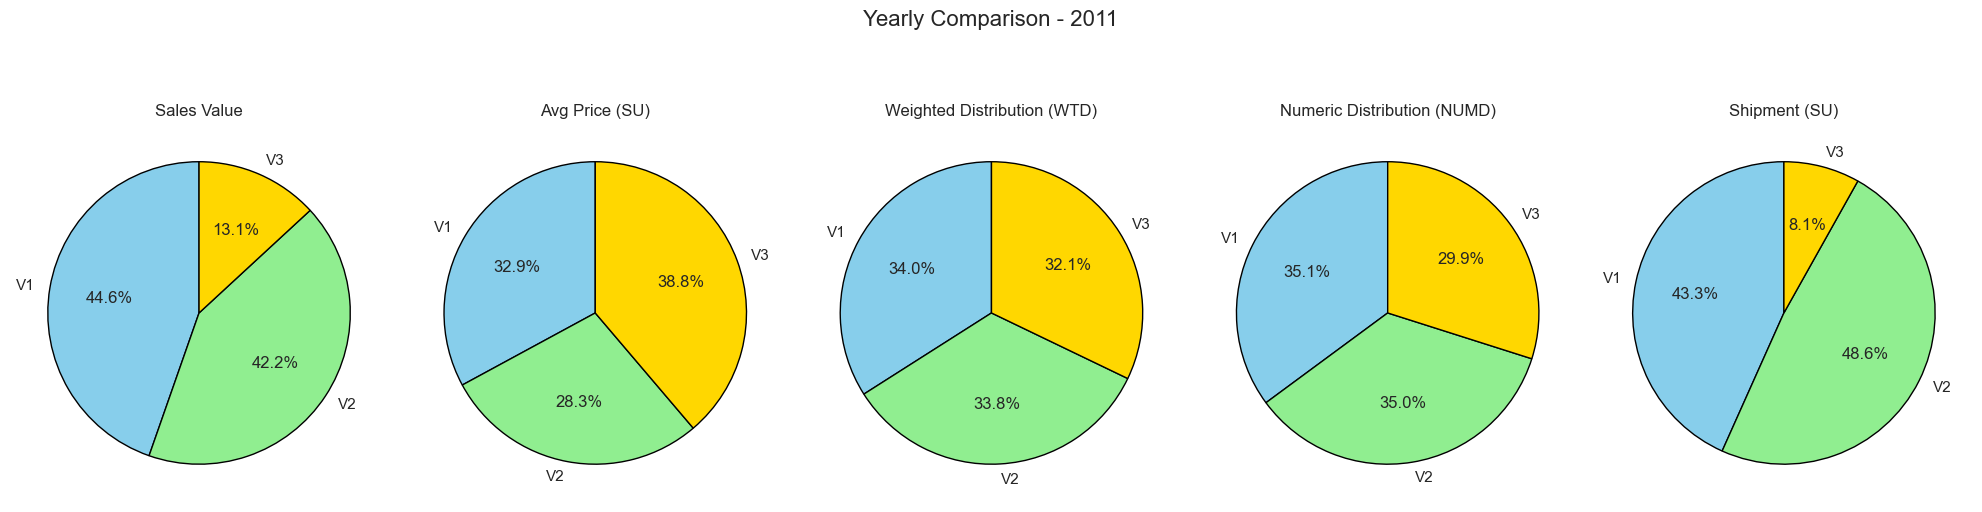

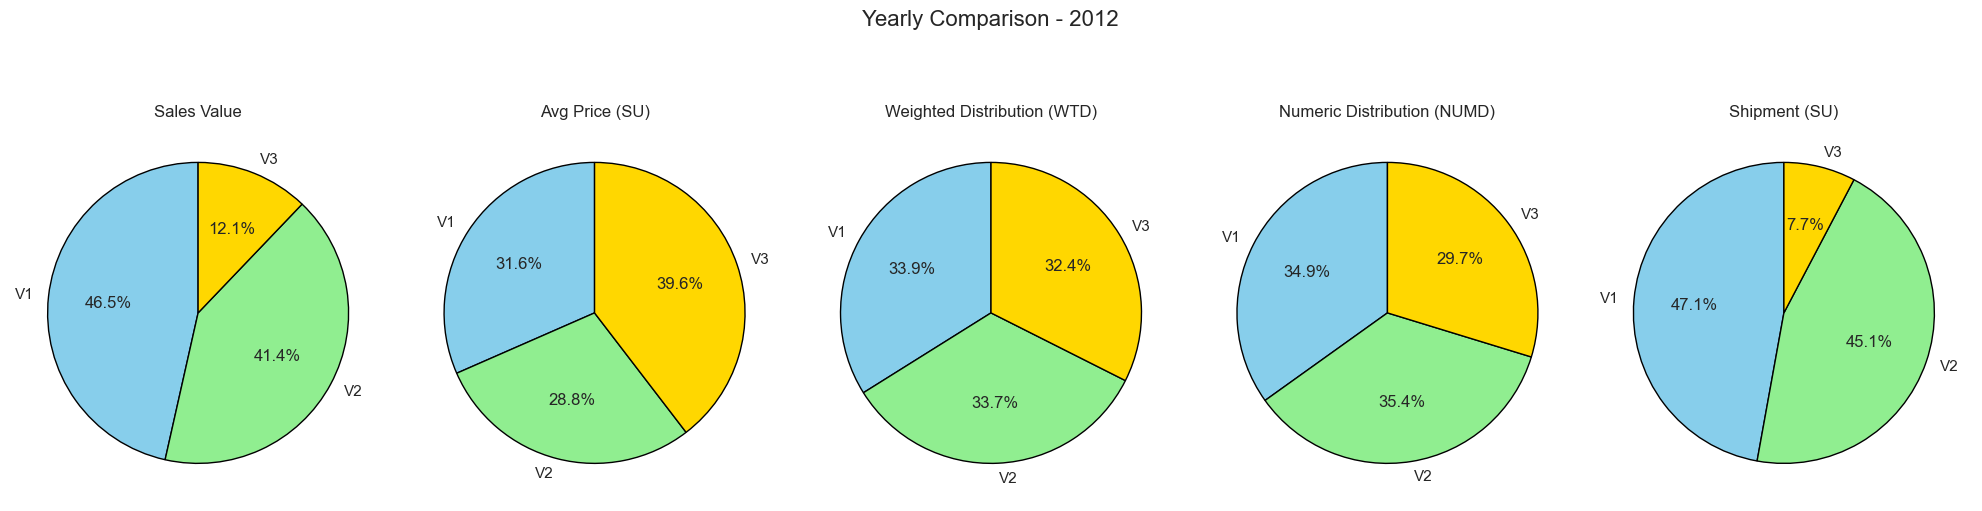

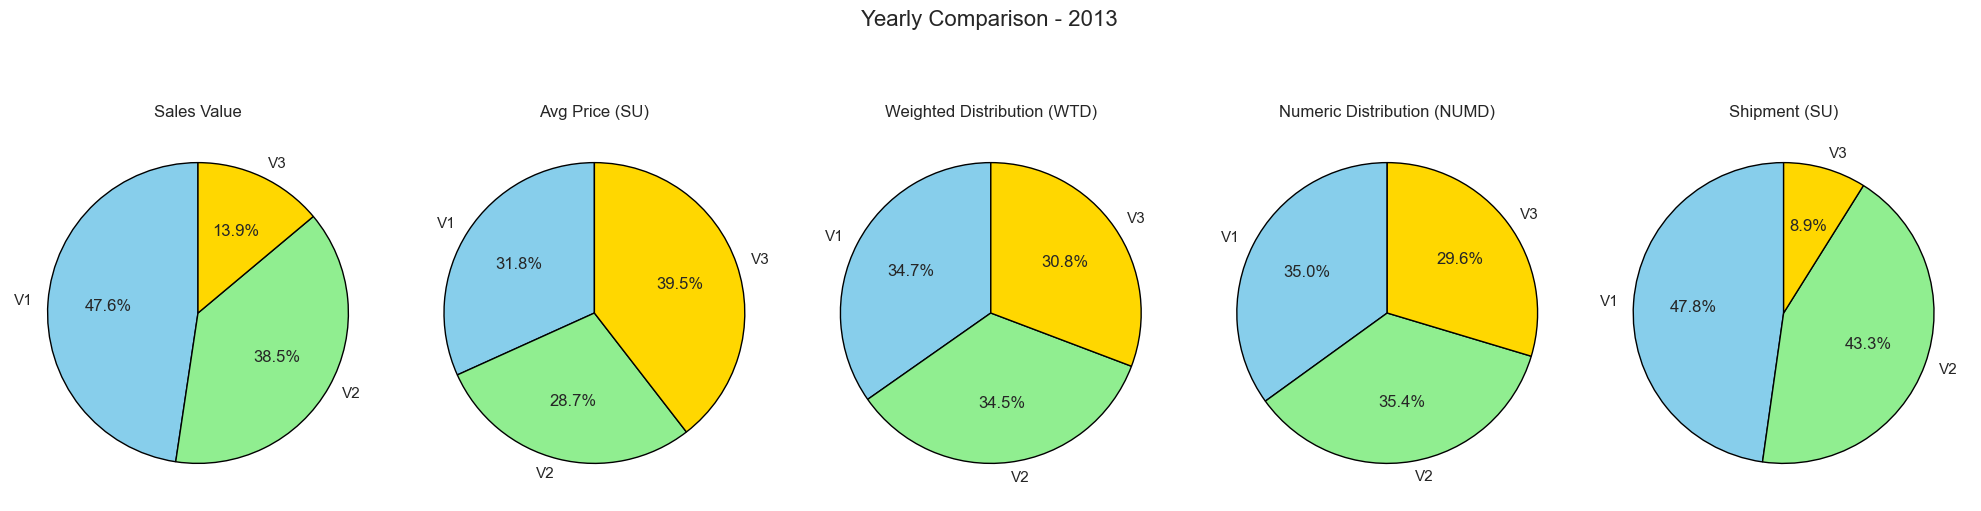

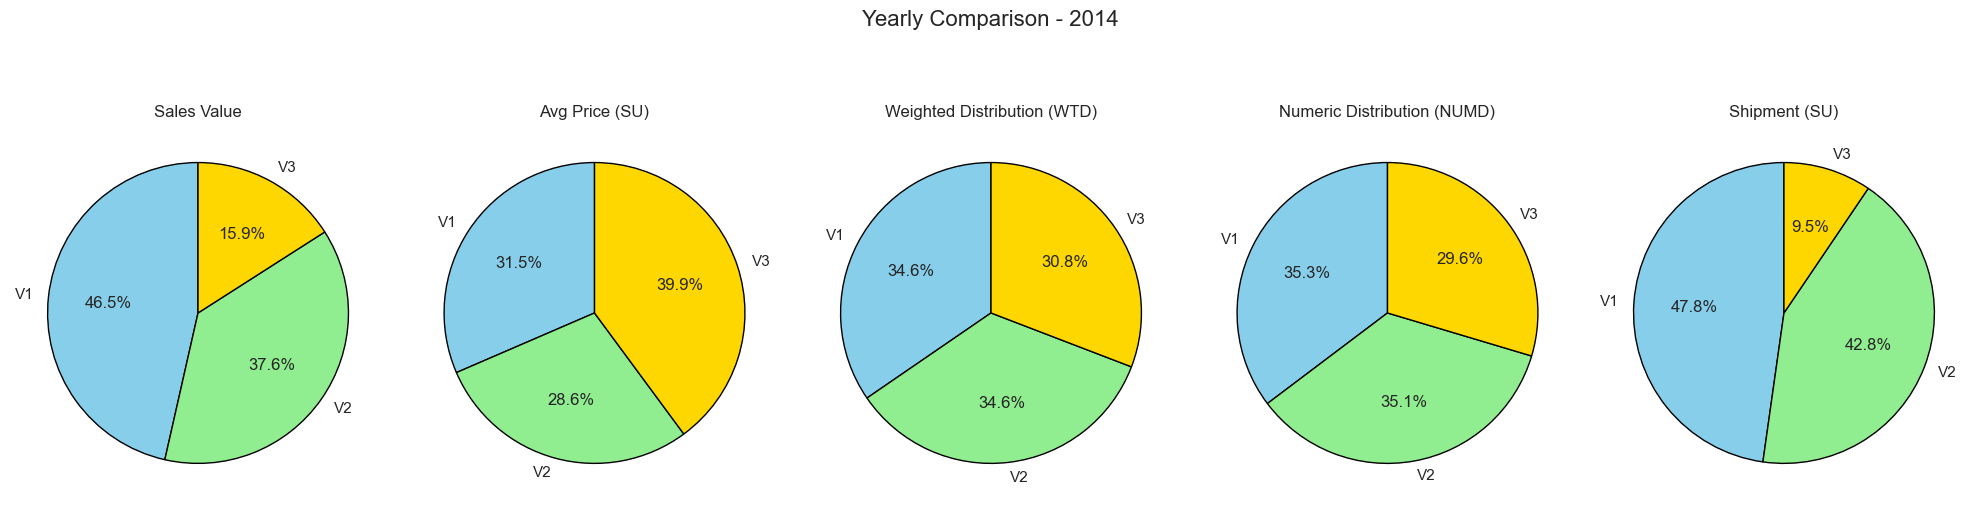

In [61]:
# Convert 'Period' to datetime format
final_merged_data['Period'] = pd.to_datetime(final_merged_data['Period'], errors='coerce')

# Extract the year and filter for 2011-2014
final_merged_data['Year'] = final_merged_data['Period'].dt.year
final_merged_data_filtered = final_merged_data[final_merged_data['Year'].isin([2011, 2012, 2013, 2014])]

# Define metrics and labels for each product line (excluding Brand)
metrics = {
    "Sales Value": ["Sales_Value_V1", "Sales_Value_V2", "Sales_Value_V3"],
    "Avg Price (SU)": ["Avg_Price_V1_SU", "Avg_Price_V2_SU", "Avg_Price_V3_SU"],
    "Weighted Distribution (WTD)": ["WTD_V1", "WTD_V2", "WTD_V3"],
    "Numeric Distribution (NUMD)": ["NUMD_V1", "NUMD_V2", "NUMD_V3"],
    "Shipment (SU)": ["Shipment_SU_V1", "Shipment_SU_V2", "Shipment_SU_V3"]
}
labels = ['V1', 'V2', 'V3']

# Generate yearly pie charts for 2011-2014
import matplotlib.pyplot as plt

for year in [2011, 2012, 2013, 2014]:
    yearly_data = final_merged_data_filtered[final_merged_data_filtered['Year'] == year]
    
    # Create a figure for each year
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))
    fig.suptitle(f"Yearly Comparison - {year}", fontsize=16, y=1.05)

    # Loop through metrics to create pie charts
    for i, (metric_name, cols) in enumerate(metrics.items()):
        # Calculate average values for the metrics
        metric_data = yearly_data[cols].mean()
        
        # Create pie chart
        axes[i].pie(metric_data, labels=labels, autopct='%1.1f%%', startangle=90,
                    colors=['skyblue', 'lightgreen', 'gold'], wedgeprops={'edgecolor': 'black'})
        axes[i].set_title(metric_name, fontsize=12)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


2011 and 2014 seem to have less data compared to 2012 and 2013.
- **2011**:  
  - V1 consistently had the highest share across all metrics.  
  - V2 and V3 showed comparatively lower contributions.

- **2012**:  
  - V1 maintained its dominance.  
  - V3 slightly improved its share in **Sales** and **Shipment** compared to 2011.

- **2013**:  
  - Distribution metrics (**WTD** and **NUMD**) started showing a more balanced share between V1 and V2.  
  - V1 still led in **Sales** and **Shipment**.

- **2014**:  
  - V2 caught up significantly in **Weighted Distribution (WTD)** and **Numeric Distribution (NUMD)** metrics, narrowing the gap with V1.  
  - V3 remained the smallest contributor across all metrics.

# Linear Regression Model

## Model 1 (Brand)

### Create Month Dummies

In [62]:
# Map month names to numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Replace month names with their corresponding numbers
final_merged_data['Month'] = final_merged_data['Month'].map(month_mapping)

# Create monthly dummies using the updated 'Month' column
monthly_dummies = pd.get_dummies(final_merged_data['Month'], prefix='month', prefix_sep='_')

# Convert dummies to integer type
monthly_dummies = monthly_dummies.astype(int)

# Merge the dummies back into the dataframe
final_merged_data = pd.concat([final_merged_data, monthly_dummies], axis=1)


### Dependent and Independent Variables

In [63]:
# Dependent
target = 'Sales_Value_Brand'

# Independent
selected_features = [
    'Avg_Price_Brand_SU',
    'Shipment_SU_Brand',
    'Brand_Social_Facebook_Likes_Digital',
    'month_3',
    'month_7',
    'month_12'
]
X = final_merged_data[selected_features]
y = final_merged_data[target]

### Train Test Split

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Linear Regression Model

In [65]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

### Evaluate the Model

In [66]:
# Predict on the test set
y_pred = lr.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Model Evaluation Metrics with Composite Features:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Model Evaluation Metrics with Composite Features:
Mean Absolute Percentage Error (MAPE): 3.05%
R² Score: 0.828
Adjusted R² Score: 0.313


### Actual vs Predicted Sales_Value_Brand

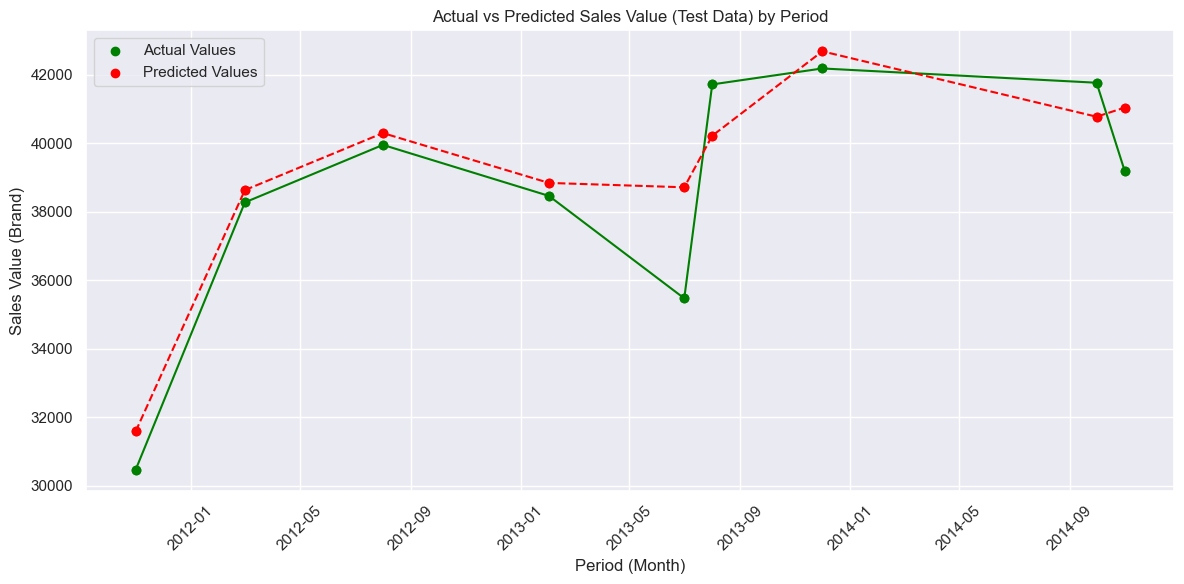

In [67]:
# Evaluate Actual vs Predicted Sales_Value_Brand on Test Data Only

# Create a DataFrame for test data with actual and predicted values
test_comparison_df = pd.DataFrame({
    'Period': final_merged_data.loc[X_test.index, 'Period'],  # Extract periods corresponding to the test set
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')  # Ensure the Period column is sorted

# Create scatter and line plots for actual and predicted sales by Period
plt.figure(figsize=(12, 6))

# Scatter and line plot for actual values
plt.scatter(test_comparison_df['Period'], test_comparison_df['Actual'], label='Actual Values', color='green')
plt.plot(test_comparison_df['Period'], test_comparison_df['Actual'], color='green', linestyle='-', marker='o')

# Scatter and line plot for predicted values
plt.scatter(test_comparison_df['Period'], test_comparison_df['Predicted'], label='Predicted Values', color='red')
plt.plot(test_comparison_df['Period'], test_comparison_df['Predicted'], color='red', linestyle='--', marker='o')

# Customize the plot
plt.xlabel('Period (Month)')
plt.ylabel('Sales Value (Brand)')
plt.title('Actual vs Predicted Sales Value (Test Data) by Period')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## Model 2 (V1)

### Create AdStock for TV GRP

In [68]:
# Adstock function
def calculate_adstock(series, decay):
    adstock = np.zeros(len(series))
    for t in range(len(series)):
        if t == 0:
            adstock[t] = series.iloc[t]
        else:
            adstock[t] = series.iloc[t] + decay * adstock[t-1]
    return adstock

# Apply adstock transformation to one variable
decay_factor = 0.7 
final_merged_data['Adstock_V1_TV_Total_GRP_AOR'] = calculate_adstock(final_merged_data['V1_TV_Total_GRP_AOR'], decay_factor)
# final_merged_data[['V1_TV_Total_GRP_AOR', 'Adstock_V1_TV_Total_GRP_AOR']].head()

### Dependent and Independent variables

In [69]:
# Define target variable
target = 'Sales_Value_V1'

# Define features including the new composite features
composite_features = [
    'V1_iMedia_Total_Clicks_Digital',
    'V1_iMedia_Total_Impressions_Digital',
    'Adstock_V1_TV_Total_GRP_AOR',
    'month_7',
    'month_8',
    'month_11',
]

# Prepare the data
X = final_merged_data[composite_features]
y = final_merged_data[target]


### Train Test Split

In [70]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the Linear Regression Model

In [71]:

# Train the Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

### Evaluate the Model

In [72]:

# Predict on the test set
y_pred = lr.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Model Evaluation Metrics with Composite Features:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Model Evaluation Metrics with Composite Features:
Mean Absolute Percentage Error (MAPE): 3.49%
R² Score: 0.849
Adjusted R² Score: 0.395


### Actual vs Predicted Sales_Value_V1

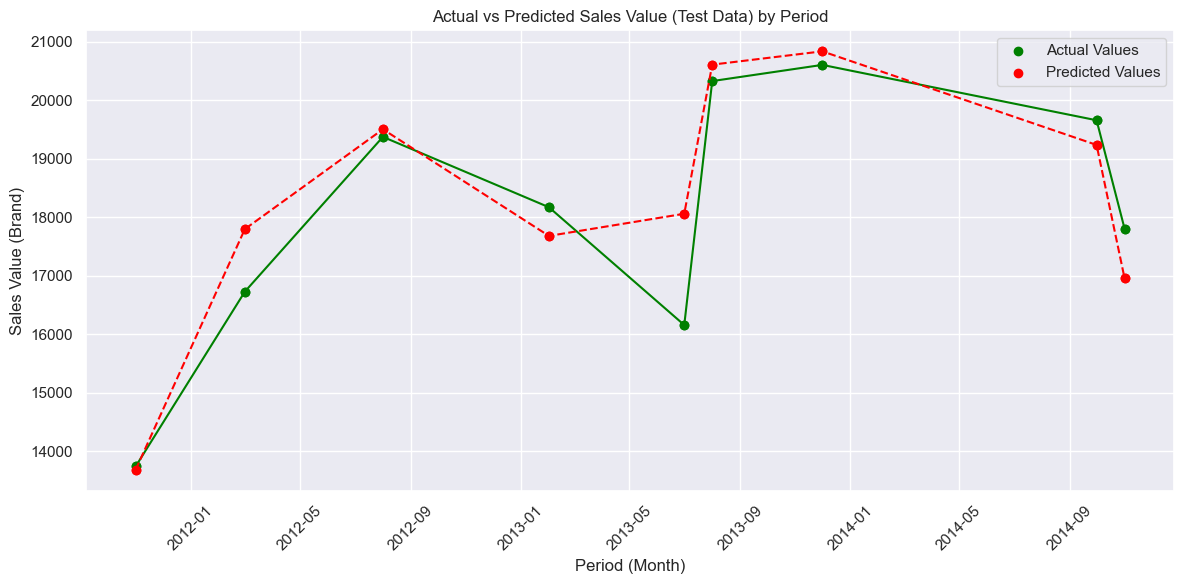

In [73]:
# Evaluate Actual vs Predicted Sales_Value_Brand on Test Data Only

# Create a DataFrame for test data with actual and predicted values
test_comparison_df = pd.DataFrame({
    'Period': final_merged_data.loc[X_test.index, 'Period'],  # Extract periods corresponding to the test set
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')  # Ensure the Period column is sorted

# Create scatter and line plots for actual and predicted sales by Period
plt.figure(figsize=(12, 6))

# Scatter and line plot for actual values
plt.scatter(test_comparison_df['Period'], test_comparison_df['Actual'], label='Actual Values', color='green')
plt.plot(test_comparison_df['Period'], test_comparison_df['Actual'], color='green', linestyle='-', marker='o')

# Scatter and line plot for predicted values
plt.scatter(test_comparison_df['Period'], test_comparison_df['Predicted'], label='Predicted Values', color='red')
plt.plot(test_comparison_df['Period'], test_comparison_df['Predicted'], color='red', linestyle='--', marker='o')

# Customize the plot
plt.xlabel('Period (Month)')
plt.ylabel('Sales Value (Brand)')
plt.title('Actual vs Predicted Sales Value (Test Data) by Period')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## Model 3 (V2)

### Dependent and Independent variables

In [74]:
# Define target variable
target = 'Sales_Value_V2'

# Define features including the new composite features
composite_features = [
    'Avg_Price_V2_SU',
    'V1_TV_Total_Spends_AOR',
    'NUMD_V1',
    'V1_iMedia_Total_Impressions_Digital',
    'Adstock_V1_TV_Total_GRP_AOR',
    'month_1',
    'month_3',
    'month_7',
    'month_5',
    'month_9'
]

# Prepare the data
X = final_merged_data[composite_features]
y = final_merged_data[target]

### Train Test Split

In [75]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Linear Regression Model

In [76]:
# Train the Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Evaluate the Model

In [77]:
# Predict on the test set
y_pred = lr.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Model Evaluation Metrics with Composite Features:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")

Model Evaluation Metrics with Composite Features:
Mean Absolute Percentage Error (MAPE): 2.43%
R² Score: 0.787
Adjusted R² Score: 1.851


### Actual vs Predicted Sales_Value_V2

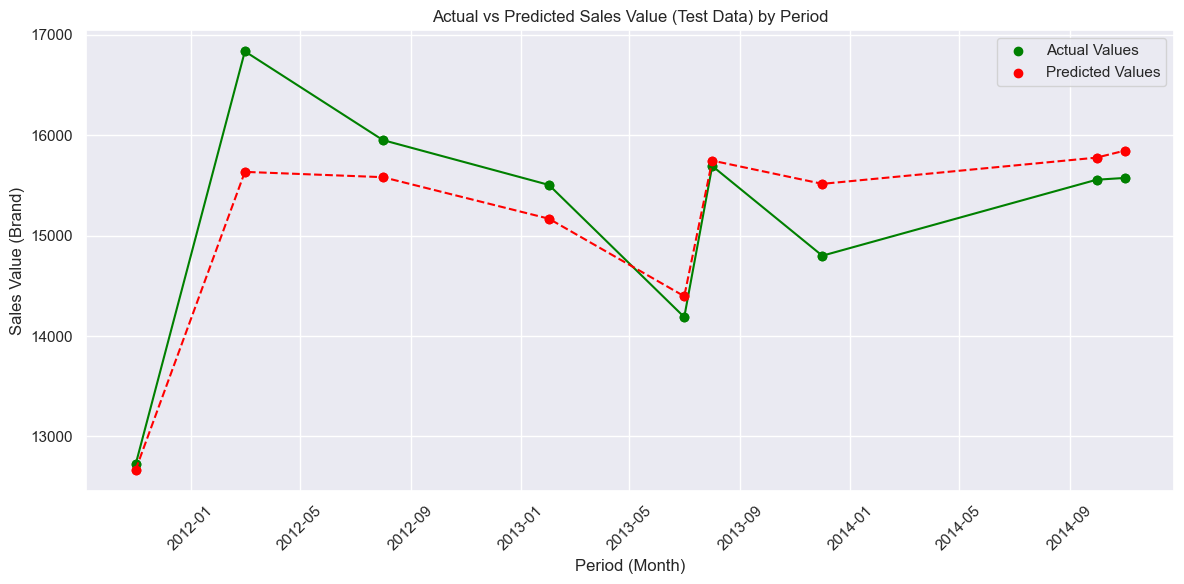

In [78]:
# Evaluate Actual vs Predicted Sales_Value_Brand on Test Data Only

# Create a DataFrame for test data with actual and predicted values
test_comparison_df = pd.DataFrame({
    'Period': final_merged_data.loc[X_test.index, 'Period'],  # Extract periods corresponding to the test set
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')  # Ensure the Period column is sorted

# Create scatter and line plots for actual and predicted sales by Period
plt.figure(figsize=(12, 6))

# Scatter and line plot for actual values
plt.scatter(test_comparison_df['Period'], test_comparison_df['Actual'], label='Actual Values', color='green')
plt.plot(test_comparison_df['Period'], test_comparison_df['Actual'], color='green', linestyle='-', marker='o')

# Scatter and line plot for predicted values
plt.scatter(test_comparison_df['Period'], test_comparison_df['Predicted'], label='Predicted Values', color='red')
plt.plot(test_comparison_df['Period'], test_comparison_df['Predicted'], color='red', linestyle='--', marker='o')

# Customize the plot
plt.xlabel('Period (Month)')
plt.ylabel('Sales Value (Brand)')
plt.title('Actual vs Predicted Sales Value (Test Data) by Period')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## Model 4 (V3)

### Dependent and Independent variables

In [79]:

target = 'Sales_Value_V3'

features = [
    'Adstock_V1_TV_Total_GRP_AOR',
    'Avg_Price_V3_SU',
    'V1_TV_ISP_Spends_AOR',
    'V1_TV_Total_Spends_AOR',
    'Shipment_SU_V3',
    'V1_iMedia_Total_Impressions_Digital',
    'V1_iMedia_Total_Spends_Digital_AOR',
    'month_6',
    'month_1',
    'month_8',
    'month_12'
]
# Prepare the data
X = final_merged_data[features]
y = final_merged_data[target]


### Train Test Split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Linear Regression Model

In [81]:
# Train the Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

### Evaluate the Model

In [82]:
# Predict on the test set
y_pred = lr.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Model Evaluation Metrics with Composite Features:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")

Model Evaluation Metrics with Composite Features:
Mean Absolute Percentage Error (MAPE): 4.59%
R² Score: 0.896
Adjusted R² Score: 1.276


### Actual vs Predicted Sales_Value_V3

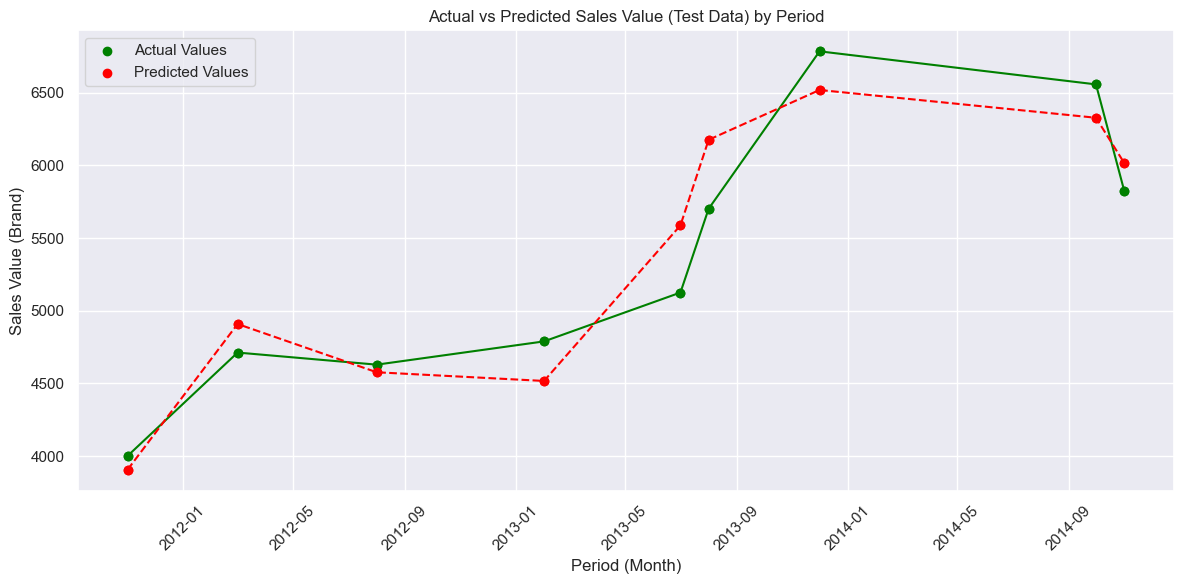

In [83]:
# Create a DataFrame for test data with actual and predicted values
test_comparison_df = pd.DataFrame({
    'Period': final_merged_data.loc[X_test.index, 'Period'],  # Extract periods corresponding to the test set
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')  # Ensure the Period column is sorted

# Create scatter and line plots for actual and predicted sales by Period
plt.figure(figsize=(12, 6))

# Scatter and line plot for actual values
plt.scatter(test_comparison_df['Period'], test_comparison_df['Actual'], label='Actual Values', color='green')
plt.plot(test_comparison_df['Period'], test_comparison_df['Actual'], color='green', linestyle='-', marker='o')

# Scatter and line plot for predicted values
plt.scatter(test_comparison_df['Period'], test_comparison_df['Predicted'], label='Predicted Values', color='red')
plt.plot(test_comparison_df['Period'], test_comparison_df['Predicted'], color='red', linestyle='--', marker='o')

# Customize the plot
plt.xlabel('Period (Month)')
plt.ylabel('Sales Value (Brand)')
plt.title('Actual vs Predicted Sales Value (Test Data) by Period')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Lasso Regression Model

## Model 1 (Brand)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Dependent and Independent Variables
target = 'Sales_Value_Brand'
selected_features = [
    'Avg_Price_Brand_SU',
    'Shipment_SU_Brand',
    'Brand_Social_Facebook_Likes_Digital',
    'month_3',
    'month_7',
    'month_12'
]
X = final_merged_data[selected_features]
y = final_merged_data[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso Regression model
lasso = Lasso(alpha=1.0)  # You can tune the `alpha` hyperparameter as needed

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Lasso Regression Model Evaluation Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Lasso Regression Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 3.04%
R² Score: 0.828
Adjusted R² Score: 0.312


## Model 2 (V1)

In [85]:
# Define target variable
target = 'Sales_Value_V1'

# Define features including the new composite features
composite_features = [
    'V1_iMedia_Total_Clicks_Digital',
    'V1_iMedia_Total_Impressions_Digital',
    'Adstock_V1_TV_Total_GRP_AOR',
    'month_7',
    'month_8',
    'month_11',
]

# Prepare the data
X = final_merged_data[composite_features]
y = final_merged_data[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso Regression model
lasso = Lasso(alpha=1.0)  # You can adjust `alpha` as needed to control regularization strength

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Lasso Regression Model Evaluation Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Lasso Regression Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 3.44%
R² Score: 0.849
Adjusted R² Score: 0.396


## Model 3 (V2)

In [86]:
# Define target variable
target = 'Sales_Value_V2'

# Define features including the new composite features
composite_features = [
    'Avg_Price_V2_SU',
    'V1_TV_Total_Spends_AOR',
    'NUMD_V1',
    'V1_iMedia_Total_Impressions_Digital',
    'Adstock_V1_TV_Total_GRP_AOR',
    'month_1',
    'month_3',
    'month_7',
    'month_5',
    'month_9'
]

# Prepare the data
X = final_merged_data[composite_features]
y = final_merged_data[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso Regression model
lasso = Lasso(alpha=1.0)  # You can adjust `alpha` as needed to control regularization strength

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Lasso Regression Model Evaluation Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")

Lasso Regression Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 2.44%
R² Score: 0.781
Adjusted R² Score: 1.876


## Model 4 (V3)

In [87]:
# Define target variable
target = 'Sales_Value_V3'

# Define features
features = [
    'Adstock_V1_TV_Total_GRP_AOR',
    'Avg_Price_V3_SU',
    'V1_TV_ISP_Spends_AOR',
    'V1_TV_Total_Spends_AOR',
    'Shipment_SU_V3',
    'V1_iMedia_Total_Impressions_Digital',
    'V1_iMedia_Total_Spends_Digital_AOR',
    'month_6',
    'month_1',
    'month_8',
    'month_12'
]

# Prepare the data
X = final_merged_data[features]
y = final_merged_data[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso Regression model
lasso = Lasso(alpha=1.0)  # You can adjust `alpha` as needed to control regularization strength

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Lasso Regression Model Evaluation Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Lasso Regression Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 4.69%
R² Score: 0.889
Adjusted R² Score: 1.296


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.309e+06, tolerance: 4.061e+03
  model = cd_fast.enet_coordinate_descent(


# Ridge Regression Model

## Model 1 (Brand)

In [88]:

# Dependent and Independent Variables
target = 'Sales_Value_Brand'
selected_features = [
    'Avg_Price_Brand_SU',
    'Shipment_SU_Brand',
    'Brand_Social_Facebook_Likes_Digital',
    'month_3',
    'month_7',
    'month_12'
]
X = final_merged_data[selected_features]
y = final_merged_data[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Ridge Regression Model
ridge = Ridge(alpha=1.0)  # You can adjust alpha as needed
ridge.fit(X_train, y_train)

# Evaluate the Model
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Model Evaluation Metrics for Sales_Value_Brand with Ridge Regression:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Model Evaluation Metrics for Sales_Value_Brand with Ridge Regression:
Mean Absolute Percentage Error (MAPE): 3.14%
R² Score: 0.779
Adjusted R² Score: 0.118


## Model 2 (V1)

In [89]:
# Dependent and Independent Variables
target = 'Sales_Value_V1'
composite_features = [
    'V1_iMedia_Total_Clicks_Digital',
    'V1_iMedia_Total_Impressions_Digital',
    'Adstock_V1_TV_Total_GRP_AOR',
    'month_7',
    'month_8',
    'month_11'
]
X = final_merged_data[composite_features]
y = final_merged_data[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Ridge Regression Model
ridge = Ridge(alpha=1.0)  # You can adjust alpha as needed
ridge.fit(X_train, y_train)

# Evaluate the Model
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Model Evaluation Metrics for Sales_Value_V1 with Ridge Regression:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Model Evaluation Metrics for Sales_Value_V1 with Ridge Regression:
Mean Absolute Percentage Error (MAPE): 3.87%
R² Score: 0.833
Adjusted R² Score: 0.331


## Model 3 (V2)

In [90]:
# Dependent and Independent Variables
target = 'Sales_Value_V2'
composite_features = [
    'Avg_Price_V2_SU',
    'V1_TV_Total_Spends_AOR',
    'NUMD_V1',
    'V1_iMedia_Total_Impressions_Digital',
    'Adstock_V1_TV_Total_GRP_AOR',
    'month_1',
    'month_3',
    'month_7',
    'month_5',
    'month_9'
]
X = final_merged_data[composite_features]
y = final_merged_data[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Ridge Regression Model
ridge = Ridge(alpha=1.0)  # You can adjust alpha as needed
ridge.fit(X_train, y_train)

# Evaluate the Model
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Model Evaluation Metrics for Sales_Value_V2 with Ridge Regression:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Model Evaluation Metrics for Sales_Value_V2 with Ridge Regression:
Mean Absolute Percentage Error (MAPE): 3.40%
R² Score: 0.616
Adjusted R² Score: 2.537


## Model 4 (V3)

In [91]:
# Dependent and Independent Variables
target = 'Sales_Value_V3'
features = [
    'Adstock_V1_TV_Total_GRP_AOR',
    'Avg_Price_V3_SU',
    'V1_TV_ISP_Spends_AOR',
    'V1_TV_Total_Spends_AOR',
    'Shipment_SU_V3',
    'V1_iMedia_Total_Impressions_Digital',
    'V1_iMedia_Total_Spends_Digital_AOR',
    'month_6',
    'month_1',
    'month_8',
    'month_12'
]
X = final_merged_data[features]
y = final_merged_data[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Ridge Regression Model
ridge = Ridge(alpha=1.0)  # You can adjust alpha as needed
ridge.fit(X_train, y_train)

# Evaluate the Model
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Model Evaluation Metrics for Sales_Value_V3 with Ridge Regression:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")

Model Evaluation Metrics for Sales_Value_V3 with Ridge Regression:
Mean Absolute Percentage Error (MAPE): 4.70%
R² Score: 0.882
Adjusted R² Score: 1.316


# Random Forest

## Model 1 (Brand)

In [92]:
# Dependent and Independent variables
target = 'Sales_Value_Brand'
selected_features = [
    'Avg_Price_Brand_SU',
    'Shipment_SU_Brand',
    'Brand_Social_Facebook_Likes_Digital',
    'month_3',
    'month_7',
    'month_12'
]
X = final_merged_data[selected_features]
y = final_merged_data[target]

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Model 1: Sales_Value_Brand (Random Forest)")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Model 1: Sales_Value_Brand (Random Forest)
Mean Absolute Percentage Error (MAPE): 3.91%
R² Score: 0.791
Adjusted R² Score: 0.164


## Model 2 (V1)

In [93]:
# Dependent and Independent variables
target = 'Sales_Value_V1'
composite_features = [
    'V1_iMedia_Total_Clicks_Digital',
    'V1_iMedia_Total_Impressions_Digital',
    'Adstock_V1_TV_Total_GRP_AOR',
    'month_7',
    'month_8',
    'month_11'
]
X = final_merged_data[composite_features]
y = final_merged_data[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Model 2: Sales_Value_V1 (Random Forest)")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Model 2: Sales_Value_V1 (Random Forest)
Mean Absolute Percentage Error (MAPE): 7.79%
R² Score: 0.410
Adjusted R² Score: -1.360


## Model 3 (V2)

In [94]:
# Dependent and Independent variables
target = 'Sales_Value_V2'
composite_features = [
    'Avg_Price_V2_SU',
    'V1_TV_Total_Spends_AOR',
    'NUMD_V1',
    'V1_iMedia_Total_Impressions_Digital',
    'Adstock_V1_TV_Total_GRP_AOR',
    'month_1',
    'month_3',
    'month_7',
    'month_5',
    'month_9'
]
X = final_merged_data[composite_features]
y = final_merged_data[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Model 3: Sales_Value_V2 (Random Forest)")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Model 3: Sales_Value_V2 (Random Forest)
Mean Absolute Percentage Error (MAPE): 5.52%
R² Score: 0.260
Adjusted R² Score: 3.959


## Model 4 (V3)

In [95]:
# Dependent and Independent variables
target = 'Sales_Value_V3'
features = [
    'Adstock_V1_TV_Total_GRP_AOR',
    'Avg_Price_V3_SU',
    'V1_TV_ISP_Spends_AOR',
    'V1_TV_Total_Spends_AOR',
    'Shipment_SU_V3',
    'V1_iMedia_Total_Impressions_Digital',
    'V1_iMedia_Total_Spends_Digital_AOR',
    'month_6',
    'month_1',
    'month_8',
    'month_12'
]
X = final_merged_data[features]
y = final_merged_data[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display the results
print("Model 4: Sales_Value_V3 (Random Forest)")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Model 4: Sales_Value_V3 (Random Forest)
Mean Absolute Percentage Error (MAPE): 7.01%
R² Score: 0.788
Adjusted R² Score: 1.566


# XGBoost

## Model 1 (Brand)

In [96]:
# Define target and features
target = 'Sales_Value_Brand'
selected_features = [
    'Avg_Price_Brand_SU',
    'Shipment_SU_Brand',
    'Brand_Social_Facebook_Likes_Digital',
    'month_3',
    'month_7',
    'month_12'
]
X = final_merged_data[selected_features]
y = final_merged_data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display results
print("Model 1: Sales_Value_Brand (XGBoost)")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Model 1: Sales_Value_Brand (XGBoost)
Mean Absolute Percentage Error (MAPE): 5.59%
R² Score: 0.553
Adjusted R² Score: -0.790


## Model 2 (V1)

In [97]:
# Define target and features
target = 'Sales_Value_V1'
composite_features = [
    'V1_iMedia_Total_Clicks_Digital',
    'V1_iMedia_Total_Impressions_Digital',
    'Adstock_V1_TV_Total_GRP_AOR',
    'month_7',
    'month_8',
    'month_11'
]
X = final_merged_data[composite_features]
y = final_merged_data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display results
print("Model 2: Sales_Value_V1 (XGBoost)")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Model 2: Sales_Value_V1 (XGBoost)
Mean Absolute Percentage Error (MAPE): 6.27%
R² Score: 0.605
Adjusted R² Score: -0.578


## Model 3 (V2)

In [98]:
# Define target and features
target = 'Sales_Value_V2'
composite_features = [
    'Avg_Price_V2_SU',
    'V1_TV_Total_Spends_AOR',
    'NUMD_V1',
    'V1_iMedia_Total_Impressions_Digital',
    'Adstock_V1_TV_Total_GRP_AOR',
    'month_1',
    'month_3',
    'month_7',
    'month_5',
    'month_9'
]
X = final_merged_data[composite_features]
y = final_merged_data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display results
print("Model 3: Sales_Value_V2 (XGBoost)")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Model 3: Sales_Value_V2 (XGBoost)
Mean Absolute Percentage Error (MAPE): 5.66%
R² Score: 0.219
Adjusted R² Score: 4.124


## Model 4 (V3)

In [99]:
# Define target and features
target = 'Sales_Value_V3'
features = [
    'Adstock_V1_TV_Total_GRP_AOR',
    'Avg_Price_V3_SU',
    'V1_TV_ISP_Spends_AOR',
    'V1_TV_Total_Spends_AOR',
    'Shipment_SU_V3',
    'V1_iMedia_Total_Impressions_Digital',
    'V1_iMedia_Total_Spends_Digital_AOR',
    'month_6',
    'month_1',
    'month_8',
    'month_12'
]
X = final_merged_data[features]
y = final_merged_data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Display results
print("Model 4: Sales_Value_V3 (XGBoost)")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Adjusted R² Score: {adj_r2:.3f}")


Model 4: Sales_Value_V3 (XGBoost)
Mean Absolute Percentage Error (MAPE): 7.15%
R² Score: 0.760
Adjusted R² Score: 1.641


# Comaprison of All Regression Model Results

In [100]:
# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    r2 = r2_score(y_test, y_pred)
    
    return mape, r2

# Function to prepare the data and run all models
def compare_models(target, features, alpha=1.0, random_state=42):
    X = final_merged_data[features]
    y = final_merged_data[target]
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Initialize models
    models = {
        "Linear Regression": LinearRegression(),
        "Lasso Regression": Lasso(alpha=alpha),
        "Ridge Regression": Ridge(alpha=alpha),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=random_state),
        "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=random_state)
    }
    
    results = []
    
    # Evaluate each model
    for model_name, model in models.items():
        mape, r2 = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)
        results.append({
            "Model": model_name,
            "MAPE (%)": mape,
            "R²": r2
        })
    
    # Create a DataFrame for easy comparison
    results_df = pd.DataFrame(results)
    return results_df

# Compare the models for each target variable

# Model 1: Sales_Value_Brand
target_1 = 'Sales_Value_Brand'
features_1 = [
    'Avg_Price_Brand_SU',
    'Shipment_SU_Brand',
    'Brand_Social_Facebook_Likes_Digital',
    'month_3',
    'month_7',
    'month_12'
]

# Model 2: Sales_Value_V1
target_2 = 'Sales_Value_V1'
features_2 = [
    'V1_iMedia_Total_Clicks_Digital',
    'V1_iMedia_Total_Impressions_Digital',
    'Adstock_V1_TV_Total_GRP_AOR',
    'month_7',
    'month_8',
    'month_11'
]

# Model 3: Sales_Value_V2
target_3 = 'Sales_Value_V2'
features_3 = [
    'Avg_Price_V2_SU',
    'V1_TV_Total_Spends_AOR',
    'NUMD_V1',
    'V1_iMedia_Total_Impressions_Digital',
    'Adstock_V1_TV_Total_GRP_AOR',
    'month_1',
    'month_3',
    'month_7',
    'month_5',
    'month_9'
]

# Model 4: Sales_Value_V3
target_4 = 'Sales_Value_V3'
features_4 = [
    'Adstock_V1_TV_Total_GRP_AOR',
    'Avg_Price_V3_SU',
    'V1_TV_ISP_Spends_AOR',
    'V1_TV_Total_Spends_AOR',
    'Shipment_SU_V3',
    'V1_iMedia_Total_Impressions_Digital',
    'V1_iMedia_Total_Spends_Digital_AOR',
    'month_6',
    'month_1',
    'month_8',
    'month_12'
]

# Results for all models
results_model_1 = compare_models(target_1, features_1)
results_model_2 = compare_models(target_2, features_2)
results_model_3 = compare_models(target_3, features_3)
results_model_4 = compare_models(target_4, features_4)

# Display the results
print("Comparison for Model 1: Sales_Value_Brand")
print(results_model_1)
print("\n")

print("Comparison for Model 2: Sales_Value_V1")
print(results_model_2)
print("\n")

print("Comparison for Model 3: Sales_Value_V2")
print(results_model_3)
print("\n")

print("Comparison for Model 4: Sales_Value_V3")
print(results_model_4)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.309e+06, tolerance: 4.061e+03
  model = cd_fast.enet_coordinate_descent(


Comparison for Model 1: Sales_Value_Brand
               Model  MAPE (%)        R²
0  Linear Regression  3.051212  0.828365
1   Lasso Regression  3.042153  0.827994
2   Ridge Regression  3.143589  0.779473
3      Random Forest  3.909419  0.791118
4            XGBoost  5.592123  0.552558


Comparison for Model 2: Sales_Value_V1
               Model  MAPE (%)        R²
0  Linear Regression  3.485458  0.848762
1   Lasso Regression  3.443992  0.849036
2   Ridge Regression  3.867771  0.832661
3      Random Forest  7.785423  0.409983
4            XGBoost  6.270027  0.605481


Comparison for Model 3: Sales_Value_V2
               Model  MAPE (%)        R²
0  Linear Regression  2.426585  0.787219
1   Lasso Regression  2.437672  0.781121
2   Ridge Regression  3.401412  0.615873
3      Random Forest  5.524700  0.260362
4            XGBoost  5.662371  0.219056


Comparison for Model 4: Sales_Value_V3
               Model  MAPE (%)        R²
0  Linear Regression  4.594647  0.896392
1   Lasso Regre

### Results Summary

#### Model 1: Sales_Value_Brand
- **Best Model**: Lasso Regression (MAPE: 3.04%, R²: 0.828)

#### Model 2: Sales_Value_V1
- **Best Model**: Lasso Regression (MAPE: 3.44%, R²: 0.849)

#### Model 3: Sales_Value_V2
- **Best Model**: Linear Regression (MAPE: 2.42%, R²: 0.787)

#### Model 4: Sales_Value_V3
- **Best Model**: Linear Regression (MAPE: 4.59%, R²: 0.896)

#### Tree-Based Models (Random Forest and XGBoost)
- **Observation**: Underperformed across all targets; need tuning or not well-suited for the dataset.


# Actual vs Predicted Sales Value Graph for Brand, V1, V2, V3 (Best Models)

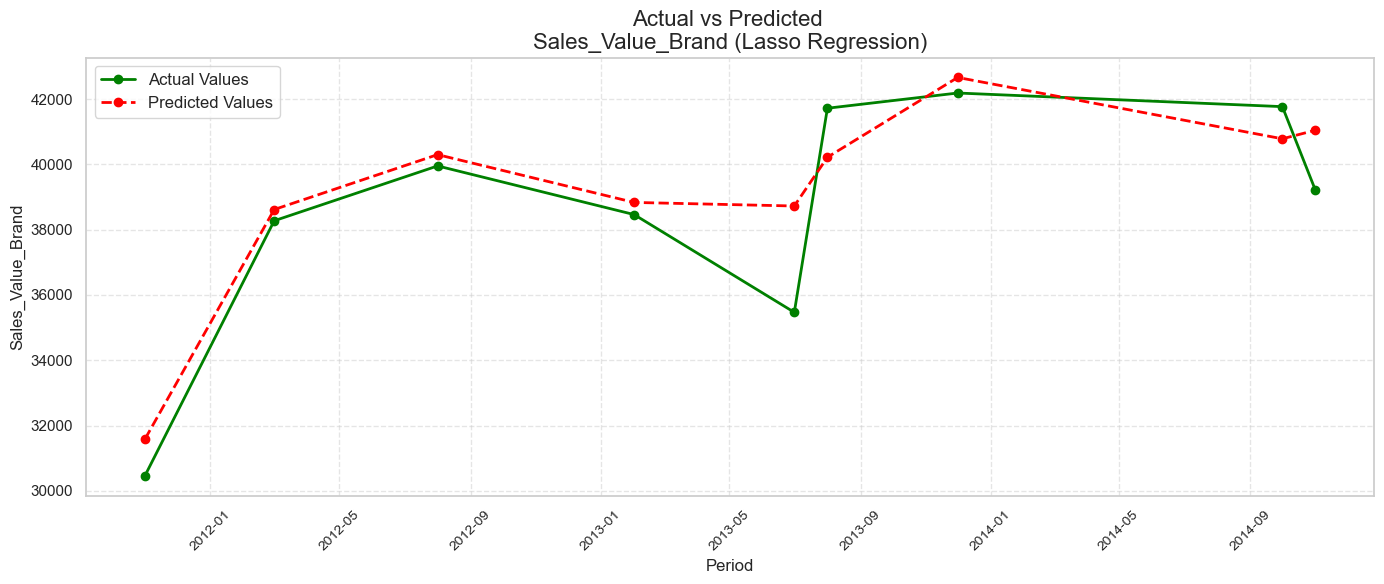

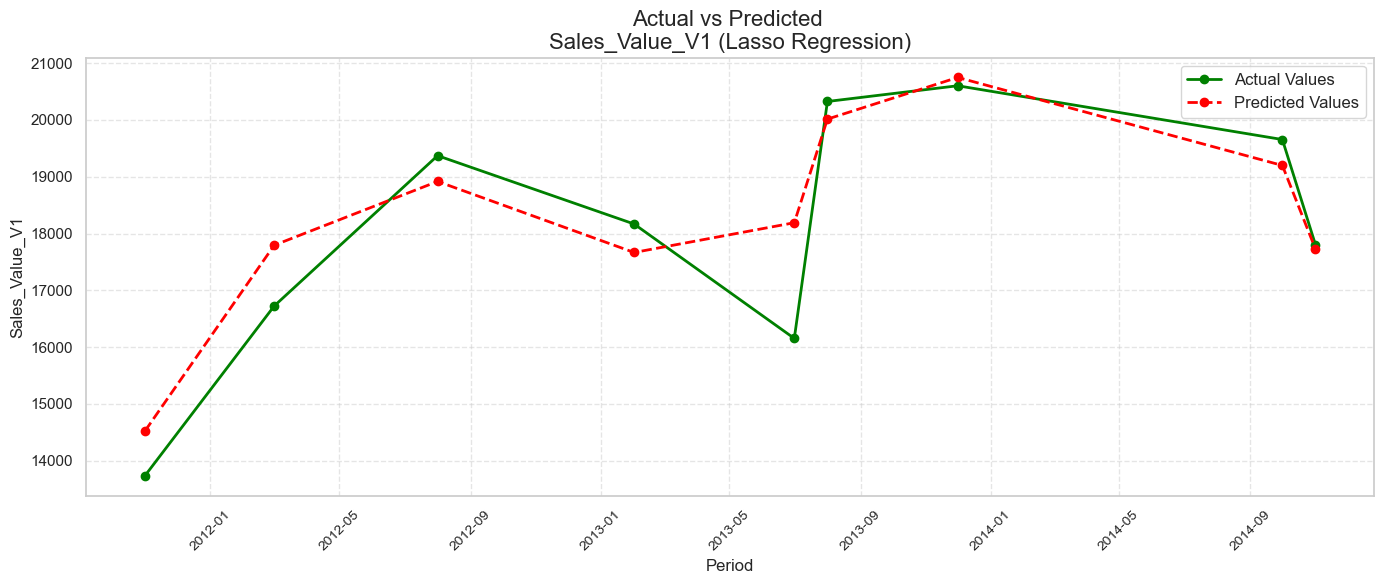

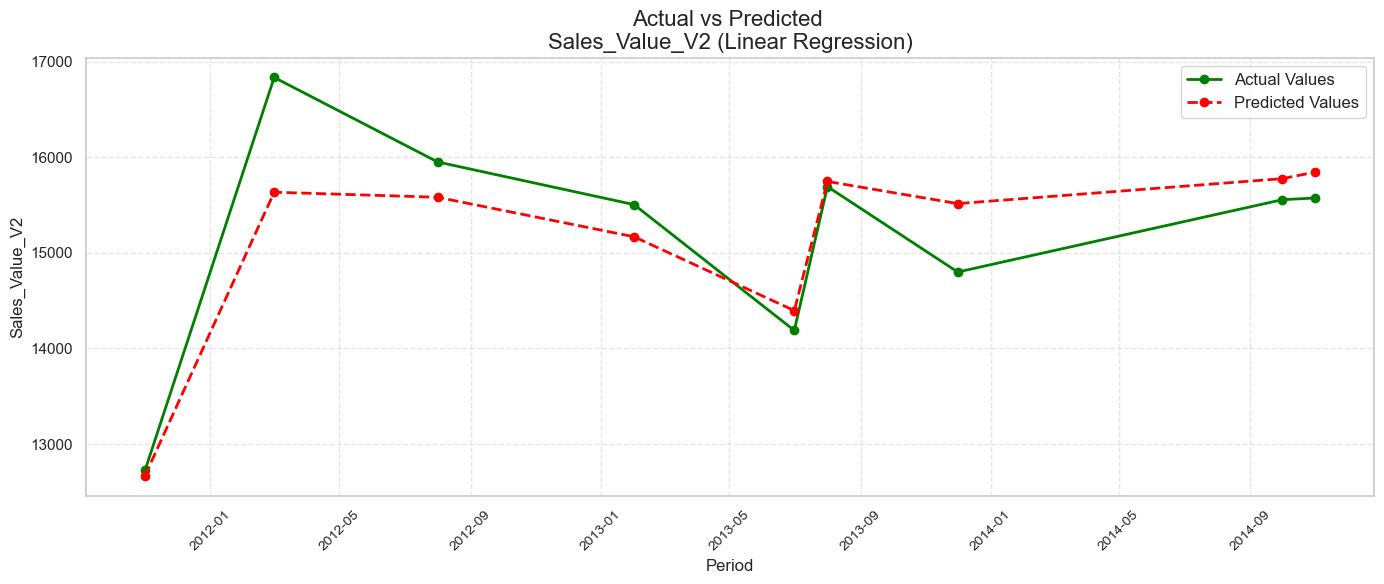

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.074e+06, tolerance: 4.061e+03
  model = cd_fast.enet_coordinate_descent(


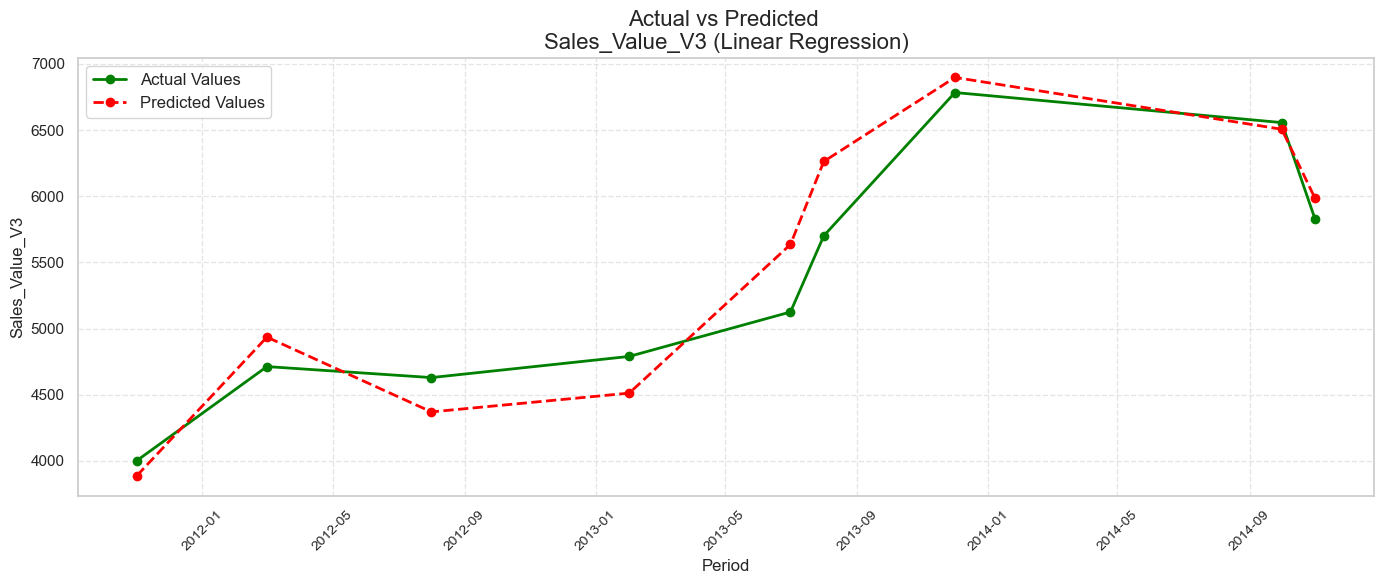

In [101]:
# Function to create a line chart with the regression model name in the title
def custom_line_chart(model, X_train, X_test, y_train, y_test, periods, target_name, model_name):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Combine periods, actual, and predicted values
    comparison_df = pd.DataFrame({
        'Period': periods[X_test.index],  # Period column from the original data
        'Actual': y_test,
        'Predicted': y_pred
    }).sort_values(by='Period')  # Ensure proper order of periods

    # Set the style to match the example
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 6))
    
    # Plot actual vs predicted
    plt.plot(comparison_df['Period'], comparison_df['Actual'], label='Actual Values', color='green', marker='o', linewidth=2)
    plt.plot(comparison_df['Period'], comparison_df['Predicted'], label='Predicted Values', color='red', linestyle='--', marker='o', linewidth=2)
    
    # Add titles and labels
    plt.title(f"Actual vs Predicted \n{target_name} ({model_name})", fontsize=16)
    plt.xlabel("Period", fontsize=12)
    plt.ylabel(f"{target_name}", fontsize=12)
    plt.legend(fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.show()

# Generating the plots for the best models
def plot_all_custom_charts():
    models = {
        "Sales_Value_Brand": (Lasso(alpha=1.0), "Lasso Regression"),  # Best model for Model 1
        "Sales_Value_V1": (Ridge(alpha=1.0), "Lasso Regression"),    # Best model for Model 2
        "Sales_Value_V2": (LinearRegression(), "Linear Regression"), # Best model for Model 3
        "Sales_Value_V3": (Lasso(alpha=1.0), "Linear Regression")     # Best model for Model 4
    }
    
    features = {
        "Sales_Value_Brand": [
            'Avg_Price_Brand_SU', 'Shipment_SU_Brand',
            'Brand_Social_Facebook_Likes_Digital', 'month_3', 'month_7', 'month_12'
        ],
        "Sales_Value_V1": [
            'V1_iMedia_Total_Clicks_Digital', 'V1_iMedia_Total_Impressions_Digital',
            'Adstock_V1_TV_Total_GRP_AOR', 'month_7', 'month_8', 'month_11'
        ],
        "Sales_Value_V2": [
            'Avg_Price_V2_SU', 'V1_TV_Total_Spends_AOR', 'NUMD_V1',
            'V1_iMedia_Total_Impressions_Digital', 'Adstock_V1_TV_Total_GRP_AOR',
            'month_1', 'month_3', 'month_7', 'month_5', 'month_9'
        ],
        "Sales_Value_V3": [
            'Adstock_V1_TV_Total_GRP_AOR', 'Avg_Price_V3_SU', 'Avg_Price_V1_SU',
            'V1_TV_ISP_Spends_AOR', 'V1_TV_Total_Spends_AOR', 'Shipment_SU_V3',
            'V1_iMedia_Total_Impressions_Digital', 'V1_iMedia_Total_Spends_Digital_AOR',
            'month_6', 'month_1', 'month_8', 'month_12'
        ]
    }
    
    for target, (model, model_name) in models.items():
        X = final_merged_data[features[target]]
        y = final_merged_data[target]
        periods = final_merged_data['Period']  # Ensure this column exists in your data
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Plot actual vs predicted line chart
        custom_line_chart(model, X_train, X_test, y_train, y_test, periods, target, model_name)

# Call the function to plot the charts
plot_all_custom_charts()


# Contribution Chart

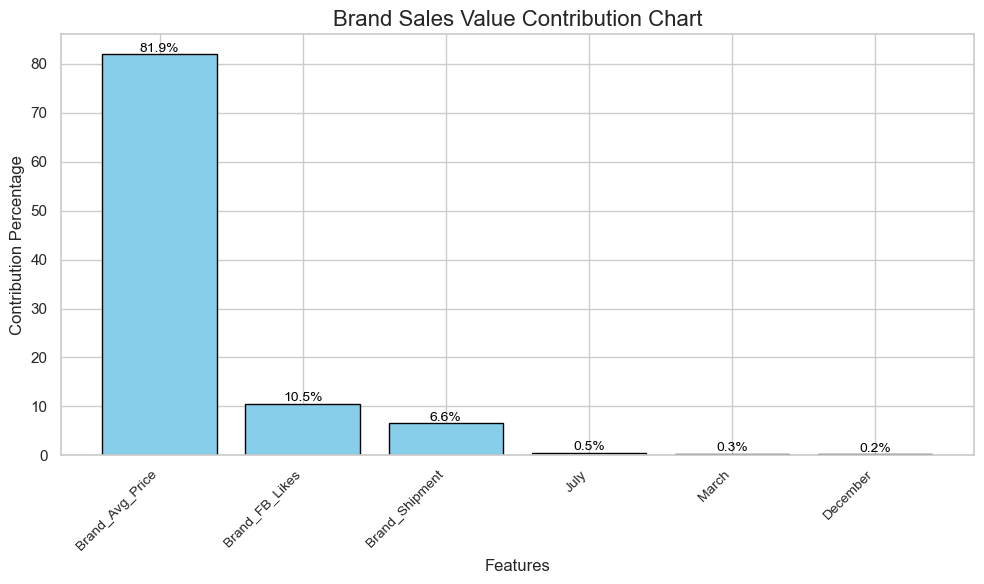


Feature Contributions for Brand Sales Value Contribution Chart:

Brand_Avg_Price: 81.94%
Brand_FB_Likes: 10.51%
Brand_Shipment: 6.60%
July: 0.50%
March: 0.28%
December: 0.17%

--------------------------------------------------



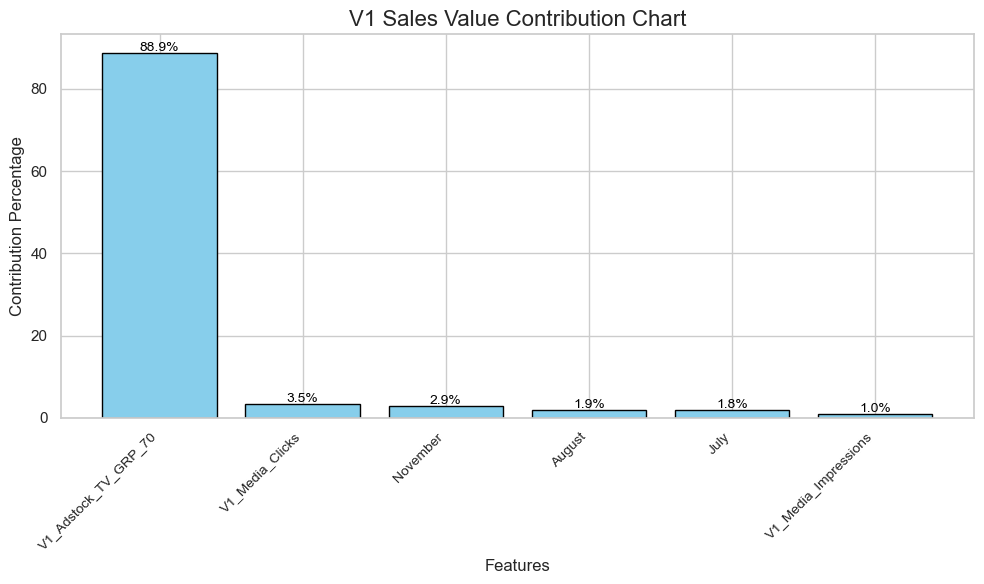


Feature Contributions for V1 Sales Value Contribution Chart:

V1_Adstock_TV_GRP_70: 88.86%
V1_Media_Clicks: 3.45%
November: 2.94%
August: 1.93%
July: 1.85%
V1_Media_Impressions: 0.97%

--------------------------------------------------



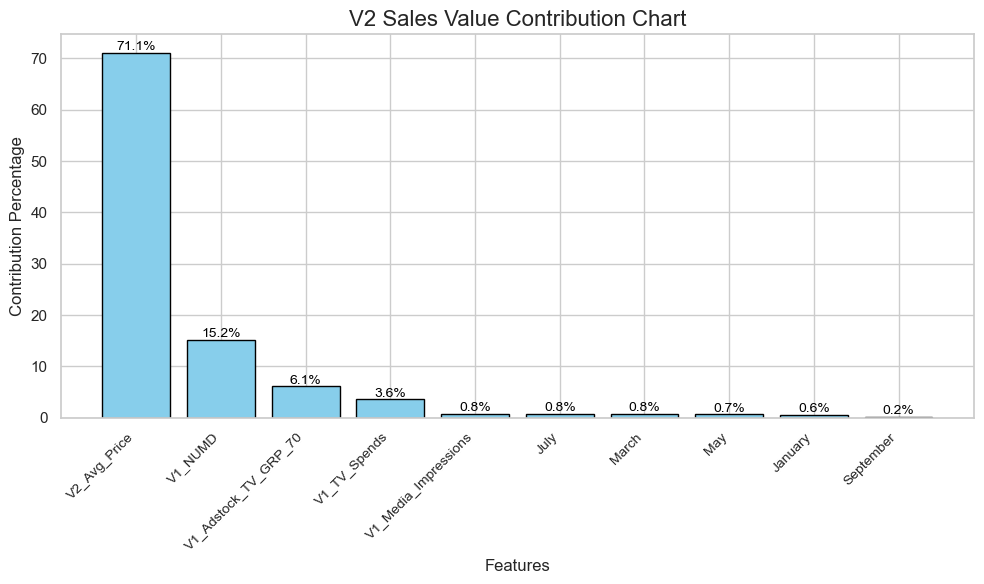


Feature Contributions for V2 Sales Value Contribution Chart:

V2_Avg_Price: 71.15%
V1_NUMD: 15.17%
V1_Adstock_TV_GRP_70: 6.14%
V1_TV_Spends: 3.60%
V1_Media_Impressions: 0.82%
July: 0.78%
March: 0.78%
May: 0.72%
January: 0.64%
September: 0.21%

--------------------------------------------------



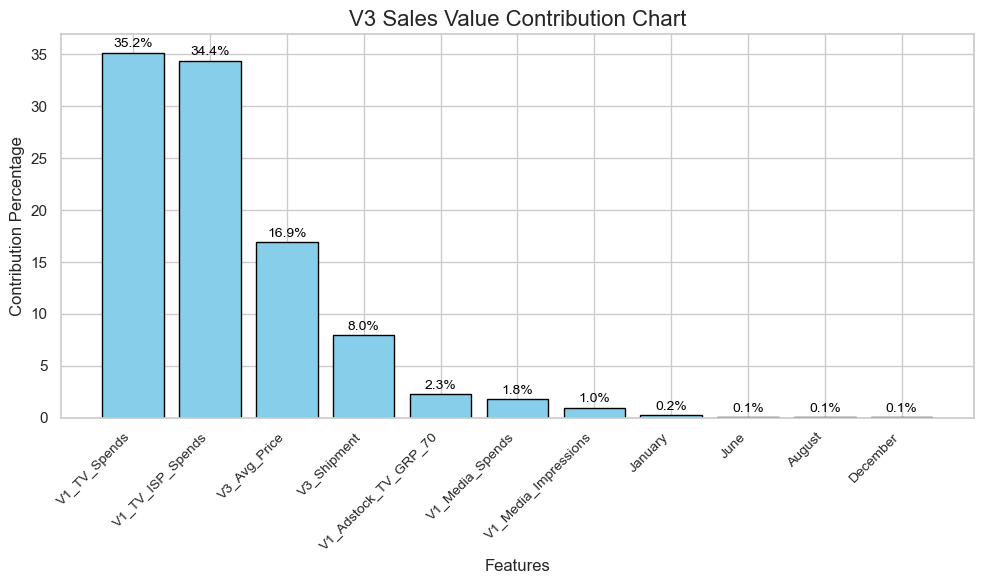


Feature Contributions for V3 Sales Value Contribution Chart:

V1_TV_Spends: 35.17%
V1_TV_ISP_Spends: 34.40%
V3_Avg_Price: 16.93%
V3_Shipment: 7.96%
V1_Adstock_TV_GRP_70: 2.28%
V1_Media_Spends: 1.79%
V1_Media_Impressions: 0.99%
January: 0.23%
June: 0.10%
August: 0.09%
December: 0.07%

--------------------------------------------------



In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate contribution percentages and plot descending histograms with simplified names
def plot_feature_contributions(model, features, feature_name_map, target_name, plot_title):
    # Train the model
    X = final_merged_data[features]
    y = final_merged_data[target_name]
    model.fit(X, y)
    
    # Get coefficients (absolute values) and calculate contributions
    coeffs = np.abs(model.coef_)  # Take absolute values of coefficients
    feature_averages = X.mean().values
    contributions = coeffs * feature_averages
    
    # Calculate percentage contributions
    total_contribution = np.sum(contributions)
    contribution_percentages = (contributions / total_contribution) * 100
    
    # Use simplified names for features and sort contributions in descending order
    simplified_names = [feature_name_map[feature] for feature in features]
    sorted_indices = np.argsort(contribution_percentages)[::-1]  # Sort indices by descending order
    sorted_names = np.array(simplified_names)[sorted_indices]
    sorted_percentages = contribution_percentages[sorted_indices]
    
    # Create a descending histogram
    plt.figure(figsize=(10, 6))
    bars = plt.bar(
        sorted_names, sorted_percentages, color='skyblue', edgecolor='black', align='center'
    )
    
    # Annotate percentages above the bars
    for bar, percentage in zip(bars, sorted_percentages):
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # Position at the center of the bar
            bar.get_height() + 0.5,             # Position slightly above the bar
            f"{percentage:.1f}%",              # Display percentage with one decimal
            ha='center', fontsize=10, color='black'
        )
    
    # Add title and labels
    plt.title(plot_title, fontsize=16)
    plt.xlabel("Features", fontsize=12)
    plt.ylabel("Contribution Percentage", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Print the numerical values for reference
    print(f"\nFeature Contributions for {plot_title}:\n")
    for name, percentage in zip(sorted_names, sorted_percentages):
        print(f"{name}: {percentage:.2f}%")
    print("\n" + "-"*50 + "\n")

# Generate descending histograms for all models
def plot_all_feature_contributions():
    models = {
        "Sales_Value_Brand": (Lasso(alpha=1.0), "Brand Sales Value Contribution Chart"),
        "Sales_Value_V1": (Lasso(alpha=1.0), "V1 Sales Value Contribution Chart"),
        "Sales_Value_V2": (LinearRegression(), "V2 Sales Value Contribution Chart"),
        "Sales_Value_V3": (LinearRegression(), "V3 Sales Value Contribution Chart")
    }
    
    features = {
        "Sales_Value_Brand": [
            'Avg_Price_Brand_SU', 'Shipment_SU_Brand',
            'Brand_Social_Facebook_Likes_Digital', 'month_3', 'month_7', 'month_12'
        ],
        "Sales_Value_V1": [
            'V1_iMedia_Total_Clicks_Digital', 'V1_iMedia_Total_Impressions_Digital',
            'Adstock_V1_TV_Total_GRP_AOR', 'month_7', 'month_8', 'month_11'
        ],
        "Sales_Value_V2": [
            'Avg_Price_V2_SU', 'V1_TV_Total_Spends_AOR', 'NUMD_V1',
            'V1_iMedia_Total_Impressions_Digital', 'Adstock_V1_TV_Total_GRP_AOR',
            'month_1', 'month_3', 'month_7', 'month_5', 'month_9'
        ],
        "Sales_Value_V3": [
            'Adstock_V1_TV_Total_GRP_AOR', 'Avg_Price_V3_SU',
            'V1_TV_ISP_Spends_AOR', 'V1_TV_Total_Spends_AOR', 'Shipment_SU_V3',
            'V1_iMedia_Total_Impressions_Digital', 'V1_iMedia_Total_Spends_Digital_AOR',
            'month_6', 'month_1', 'month_8', 'month_12'
        ]
    }
    
    feature_name_maps = {
        "Sales_Value_Brand": {
            'Avg_Price_Brand_SU': 'Brand_Avg_Price',
            'Shipment_SU_Brand': 'Brand_Shipment',
            'Brand_Social_Facebook_Likes_Digital': 'Brand_FB_Likes',
            'month_3': 'March', 'month_7': 'July', 'month_12': 'December'
        },
        "Sales_Value_V1": {
            'V1_iMedia_Total_Clicks_Digital': 'V1_Media_Clicks',
            'V1_iMedia_Total_Impressions_Digital': 'V1_Media_Impressions',
            'Adstock_V1_TV_Total_GRP_AOR': 'V1_Adstock_TV_GRP_70',
            'month_7': 'July', 'month_8': 'August', 'month_11': 'November'
        },
        "Sales_Value_V2": {
            'Avg_Price_V2_SU': 'V2_Avg_Price',
            'V1_TV_Total_Spends_AOR': 'V1_TV_Spends',
            'NUMD_V1': 'V1_NUMD',
            'V1_iMedia_Total_Impressions_Digital': 'V1_Media_Impressions',
            'Adstock_V1_TV_Total_GRP_AOR': 'V1_Adstock_TV_GRP_70',
            'month_1': 'January', 'month_3': 'March', 'month_7': 'July',
            'month_5': 'May', 'month_9': 'September'
        },
        "Sales_Value_V3": {
            'Adstock_V1_TV_Total_GRP_AOR': 'V1_Adstock_TV_GRP_70',
            'Avg_Price_V3_SU': 'V3_Avg_Price',
            'V1_TV_ISP_Spends_AOR': 'V1_TV_ISP_Spends',
            'V1_TV_Total_Spends_AOR': 'V1_TV_Spends',
            'Shipment_SU_V3': 'V3_Shipment',
            'V1_iMedia_Total_Impressions_Digital': 'V1_Media_Impressions',
            'V1_iMedia_Total_Spends_Digital_AOR': 'V1_Media_Spends',
            'month_6': 'June', 'month_1': 'January', 'month_8': 'August', 'month_12': 'December'
        }
    }
    
    for target, (model, plot_title) in models.items():
        plot_feature_contributions(model, features[target], feature_name_maps[target], target, plot_title)

# Call the function to plot descending histograms
plot_all_feature_contributions()
